In [67]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from submission import Controller
from cobar_miniproject.cobar_fly import CobarFly
from cobar_miniproject import levels
from flygym import SingleFlySimulation, Camera
from tqdm import trange




timestep = 1e-4
debug = True
level = 4
seed = 73

fly = CobarFly(
    debug=debug,
    enable_vision=True,
    render_raw_vision=False,
)

if level <= 1:
    arena = levels[level](fly=fly, seed=seed)
else:
    arena = levels[level](fly=fly, timestep=timestep, seed=seed)

cam_params = {"pos": (0, 0, 80)}
timestep = 1e-4

cam = Camera(
    attachment_point=arena.root_element.worldbody,
    camera_name="camera_top_zoomout",
    targeted_fly_names=[fly.name],
    camera_parameters=cam_params,
    play_speed=0.2,
)

sim = SingleFlySimulation(
    fly=fly,
    cameras=[cam],
    timestep=timestep,
    arena=arena,
)

controller = Controller(timestep=timestep)

# run cpg simulation
obs, info = sim.reset()
obs_hist = []
info_hist = []

max_steps = 10000

for i in trange(max_steps):
    # Get observations
    obs, reward, terminated, truncated, info = sim.step(controller.get_actions(obs))
    sim.render()
    if controller.done_level(obs):
        # finish the path integration level
        break

    #if not obs["vision_updated"]:
    #if "vision" in obs:
    #    del obs["vision"]
    #if "raw_vision" in obs:
    #    del obs["raw_vision"]
    obs_hist.append(obs)
    info_hist.append(info)


    if hasattr(controller, "quit") and controller.quit:
        print("Simulation terminated by user.")
        break
    if hasattr(arena, "quit") and arena.quit:
        print("Target reached. Simulation terminated.")
        break

print(f"Available keys in obs: {list(obs.keys())}")


# Save video
save_path = Path("outputs") / f"level{level}_seed{seed}.mp4"
save_path.parent.mkdir(parents=True, exist_ok=True)
cam.save_video(save_path, stabilization_time=0)

  0%|          | 10/10000 [00:00<01:44, 95.86it/s]

Time: 0.0001 s | True pos: [0.01634914 0.00730949] m | Est pos: [0. 0.] m
Time: 0.0002 s | True pos: [0.01644516 0.0073068 ] m | Est pos: [0. 0.] m
Time: 0.0003 s | True pos: [0.01654996 0.00730389] m | Est pos: [0. 0.] m
Time: 0.0004 s | True pos: [0.01681441 0.00729863] m | Est pos: [0. 0.] m
Time: 0.0005 s | True pos: [0.01722914 0.00728992] m | Est pos: [0. 0.] m
Time: 0.0006 s | True pos: [0.0177724  0.00727787] m | Est pos: [0. 0.] m
Time: 0.0007 s | True pos: [0.01841292 0.00726253] m | Est pos: [0. 0.] m
Time: 0.0008 s | True pos: [0.01909616 0.00724298] m | Est pos: [0. 0.] m
Time: 0.0009 s | True pos: [0.01979939 0.00721764] m | Est pos: [0. 0.] m
Time: 0.0010 s | True pos: [0.02051854 0.00718652] m | Est pos: [0. 0.] m
Time: 0.0011 s | True pos: [0.02124625 0.00715   ] m | Est pos: [0. 0.] m
Time: 0.0012 s | True pos: [0.02197284 0.00710844] m | Est pos: [0. 0.] m
Time: 0.0013 s | True pos: [0.02268886 0.00706204] m | Est pos: [0. 0.] m
Time: 0.0014 s | True pos: [0.02338645

  1%|          | 103/10000 [00:00<00:33, 292.00it/s]

Time: 0.0068 s | True pos: [0.03475363 0.00506616] m | Est pos: [0. 0.] m
Time: 0.0069 s | True pos: [0.03284448 0.00522465] m | Est pos: [0. 0.] m
Time: 0.0070 s | True pos: [0.03063214 0.00540273] m | Est pos: [0. 0.] m
Time: 0.0071 s | True pos: [0.02811123 0.00560135] m | Est pos: [0. 0.] m
Time: 0.0072 s | True pos: [0.0252789  0.00582168] m | Est pos: [0. 0.] m
Time: 0.0073 s | True pos: [0.0221369  0.00608663] m | Est pos: [0. 0.] m
Time: 0.0074 s | True pos: [0.01869055 0.00641447] m | Est pos: [0. 0.] m
Time: 0.0075 s | True pos: [0.01494582 0.00681635] m | Est pos: [0. 0.] m
Time: 0.0076 s | True pos: [0.01091028 0.00728893] m | Est pos: [0. 0.] m
Time: 0.0077 s | True pos: [0.00658821 0.00783061] m | Est pos: [0. 0.] m
Time: 0.0078 s | True pos: [0.00198469 0.00843878] m | Est pos: [0. 0.] m
Time: 0.0079 s | True pos: [-0.00289127  0.00909068] m | Est pos: [-0.00677691  0.00623398] m
Time: 0.0080 s | True pos: [-0.00803163  0.00973639] m | Est pos: [-0.00677691  0.00623398] 

  2%|▏         | 179/10000 [00:00<00:30, 317.09it/s]

Time: 0.0135 s | True pos: [-0.2610645   0.04969722] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0136 s | True pos: [-0.261884   0.0505769] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0137 s | True pos: [-0.26264408  0.05145562] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0138 s | True pos: [-0.263338    0.05232502] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0139 s | True pos: [-0.2639592   0.05318123] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0140 s | True pos: [-0.2645047   0.05402283] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0141 s | True pos: [-0.2649753   0.05484937] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0142 s | True pos: [-0.26537433  0.05566077] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0143 s | True pos: [-0.26570672  0.0564571 ] m | Est pos: [-0.13111526  0.02895413] m
Time: 0.0144 s | True pos: [-0.2659779   0.05723865] m | Est pos: [-0.13708969  0.02497117] m
Time: 0.0145 s | True pos: [-0.2661934   0.05805304] m | Est p

  3%|▎         | 254/10000 [00:00<00:31, 304.74it/s]

Time: 0.0202 s | True pos: [-0.2464925   0.10104384] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0203 s | True pos: [-0.24608545  0.1012915 ] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0204 s | True pos: [-0.24569564  0.10152592] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0205 s | True pos: [-0.24532641  0.10174924] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0206 s | True pos: [-0.24498045  0.1019638 ] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0207 s | True pos: [-0.24465974  0.10217188] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0208 s | True pos: [-0.24436556  0.10237565] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0209 s | True pos: [-0.24409804  0.10257681] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0210 s | True pos: [-0.24385792  0.1027784 ] m | Est pos: [-0.13608665  0.01158472] m
Time: 0.0211 s | True pos: [-0.2436441   0.10298333] m | Est pos: [-0.13708638  0.00247569] m
Time: 0.0212 s | True pos: [-0.24342442  0.10321286] m | Est

  3%|▎         | 321/10000 [00:01<00:32, 294.26it/s]

Time: 0.0269 s | True pos: [-0.19307938  0.15127118] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0270 s | True pos: [-0.19179802  0.15234154] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0271 s | True pos: [-0.19053894  0.15336348] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0272 s | True pos: [-0.18930319  0.1543341 ] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0273 s | True pos: [-0.188092    0.15525068] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0274 s | True pos: [-0.1869068   0.15611067] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0275 s | True pos: [-0.18574892  0.15691166] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0276 s | True pos: [-0.18461892  0.15765144] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0277 s | True pos: [-0.183516    0.15832803] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0278 s | True pos: [-0.1824393   0.15893967] m | Est pos: [-0.10321305  0.012437  ] m
Time: 0.0279 s | True pos: [-0.18138796  0.15948483] m | Est

  4%|▍         | 396/10000 [00:01<00:29, 320.41it/s]

Time: 0.0335 s | True pos: [-0.12408574  0.1315579 ] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0336 s | True pos: [-0.12239207  0.13138297] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0337 s | True pos: [-0.12066455  0.13125324] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0338 s | True pos: [-0.11890633  0.13116848] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0339 s | True pos: [-0.11712122  0.1311283 ] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0340 s | True pos: [-0.11531395  0.13113211] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0341 s | True pos: [-0.11349025  0.1311791 ] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0342 s | True pos: [-0.11165646  0.13126802] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0343 s | True pos: [-0.10981812  0.13139753] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0344 s | True pos: [-0.10797973  0.13156602] m | Est pos: [-0.09521613  0.00878961] m
Time: 0.0345 s | True pos: [-0.10614613  0.13177174] m | Est

  5%|▍         | 467/10000 [00:01<00:32, 291.87it/s]

Time: 0.0401 s | True pos: [-0.07950271  0.19189496] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0402 s | True pos: [-0.0792198   0.19318156] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0403 s | True pos: [-0.07894361  0.19444647] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0404 s | True pos: [-0.07867489  0.19568582] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0405 s | True pos: [-0.07841527  0.19689555] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0406 s | True pos: [-0.07816793  0.19807194] m | Est pos: [-0.03795264  0.01661449] m
Time: 0.0407 s | True pos: [-0.07792933  0.19921336] m | Est pos: [-0.04180776  0.01463907] m
Time: 0.0408 s | True pos: [-0.07770011  0.2003437 ] m | Est pos: [-0.01061255  0.02635432] m
Time: 0.0409 s | True pos: [-0.07745801  0.20145242] m | Est pos: [-0.01061255  0.02635432] m
Time: 0.0410 s | True pos: [-0.07720019  0.20252612] m | Est pos: [-0.01061255  0.02635432] m
Time: 0.0411 s | True pos: [-0.07696867  0.20351888] m | Est

  5%|▌         | 541/10000 [00:01<00:30, 314.99it/s]

Time: 0.0488 s | True pos: [-0.129481    0.17073591] m | Est pos: [-0.01056432  0.06751422] m
Time: 0.0489 s | True pos: [-0.12926346  0.17206076] m | Est pos: [-0.01056432  0.06751422] m
Time: 0.0490 s | True pos: [-0.12897412  0.17344934] m | Est pos: [-0.01056432  0.06751422] m
Time: 0.0491 s | True pos: [-0.12861644  0.17490016] m | Est pos: [-0.01056432  0.06751422] m
Time: 0.0492 s | True pos: [-0.12819356  0.17641187] m | Est pos: [-0.01186801  0.06303021] m
Time: 0.0493 s | True pos: [-0.12767702  0.17800145] m | Est pos: [-0.01186801  0.06303021] m
Time: 0.0494 s | True pos: [-0.12706792  0.1796724 ] m | Est pos: [-0.01186801  0.06303021] m
Time: 0.0495 s | True pos: [-0.1263707   0.18142058] m | Est pos: [-0.01186801  0.06303021] m
Time: 0.0496 s | True pos: [-0.12559022  0.18323988] m | Est pos: [-0.01493269  0.07266887] m
Time: 0.0497 s | True pos: [-0.12473153  0.18512513] m | Est pos: [-0.01493269  0.07266887] m
Time: 0.0498 s | True pos: [-0.12380369  0.18706998] m | Est

  6%|▌         | 587/10000 [00:01<00:26, 349.01it/s]

Time: 0.0561 s | True pos: [0.01385025 0.32268927] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0562 s | True pos: [0.01574875 0.32201427] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0563 s | True pos: [0.01762219 0.32121298] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0564 s | True pos: [0.01947097 0.32029274] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0565 s | True pos: [0.02129539 0.31926116] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0566 s | True pos: [0.02309563 0.31812626] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0567 s | True pos: [0.02487174 0.31689614] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0568 s | True pos: [0.02662363 0.31557915] m | Est pos: [0.03434372 0.12125762] m
Time: 0.0569 s | True pos: [0.02835109 0.31418365] m | Est pos: [0.07518121 0.11032709] m
Time: 0.0570 s | True pos: [0.0300538 0.3127181] m | Est pos: [0.07518121 0.11032709] m
Time: 0.0571 s | True pos: [0.03173146 0.31119063] m | Est pos: [0.07518121 0.11032709] m
Time: 0.0572

  7%|▋         | 662/10000 [00:02<00:28, 325.31it/s]

Time: 0.0622 s | True pos: [0.10696466 0.25568536] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0623 s | True pos: [0.10889185 0.25636202] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0624 s | True pos: [0.11082601 0.25715485] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0625 s | True pos: [0.11276382 0.25805894] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0626 s | True pos: [0.11470161 0.25907177] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0627 s | True pos: [0.11663429 0.26019278] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0628 s | True pos: [0.11855526 0.26142135] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0629 s | True pos: [0.12045695 0.262756  ] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0630 s | True pos: [0.12233126 0.2641931 ] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0631 s | True pos: [0.12417037 0.2657276 ] m | Est pos: [0.13456489 0.10013555] m
Time: 0.0632 s | True pos: [0.12596658 0.26735264] m | Est pos: [0.13456489 0.10013555] m
Time: 0.06

  7%|▋         | 730/10000 [00:02<00:30, 299.56it/s]

Time: 0.0678 s | True pos: [0.18472731 0.35900545] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0679 s | True pos: [0.18544297 0.35973364] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0680 s | True pos: [0.18614446 0.36037466] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0681 s | True pos: [0.1868296 0.3609295] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0682 s | True pos: [0.18749449 0.36139932] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0683 s | True pos: [0.18813947 0.3617955 ] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0684 s | True pos: [0.18876901 0.36213028] m | Est pos: [0.17871929 0.12531657] m
Time: 0.0685 s | True pos: [0.1893881  0.36241183] m | Est pos: [0.23010488 0.14715077] m
Time: 0.0686 s | True pos: [0.1900518  0.36258414] m | Est pos: [0.33030046 0.25496985] m
Time: 0.0687 s | True pos: [0.1907632  0.36262652] m | Est pos: [0.32385482 0.2475523 ] m
Time: 0.0688 s | True pos: [0.19151896 0.3625778 ] m | Est pos: [0.32385482 0.2475523 ] m
Time: 0.0689

  8%|▊         | 761/10000 [00:02<00:32, 285.42it/s]

Time: 0.0735 s | True pos: [0.2107788  0.31539053] m | Est pos: [0.32398836 0.25759989] m
Time: 0.0736 s | True pos: [0.2106574  0.31583786] m | Est pos: [0.32398836 0.25759989] m
Time: 0.0737 s | True pos: [0.21054237 0.31640843] m | Est pos: [0.317736   0.25707983] m
Time: 0.0738 s | True pos: [0.2104305  0.31710613] m | Est pos: [0.317736   0.25707983] m
Time: 0.0739 s | True pos: [0.21031982 0.3179337 ] m | Est pos: [0.317736   0.25707983] m
Time: 0.0740 s | True pos: [0.21020955 0.31889302] m | Est pos: [0.317736   0.25707983] m
Time: 0.0741 s | True pos: [0.21010092 0.31998777] m | Est pos: [0.317736   0.25707983] m
Time: 0.0742 s | True pos: [0.20999393 0.32121453] m | Est pos: [0.317736   0.25707983] m
Time: 0.0743 s | True pos: [0.2098898  0.32256982] m | Est pos: [0.317736   0.25707983] m
Time: 0.0744 s | True pos: [0.20979026 0.32405055] m | Est pos: [0.317736   0.25707983] m
Time: 0.0745 s | True pos: [0.20969747 0.3256536 ] m | Est pos: [0.317736   0.25707983] m
Time: 0.07

  8%|▊         | 842/10000 [00:02<00:30, 302.32it/s]

Time: 0.0801 s | True pos: [0.27237082 0.47503826] m | Est pos: [0.30889112 0.27408545] m
Time: 0.0802 s | True pos: [0.27497646 0.47717524] m | Est pos: [0.30889112 0.27408545] m
Time: 0.0803 s | True pos: [0.27760872 0.47923866] m | Est pos: [0.30889112 0.27408545] m
Time: 0.0804 s | True pos: [0.28026682 0.48122707] m | Est pos: [0.30889112 0.27408545] m
Time: 0.0805 s | True pos: [0.28295168 0.4831394 ] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0806 s | True pos: [0.28566775 0.48497653] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0807 s | True pos: [0.2884277 0.4867423] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0808 s | True pos: [0.29123414 0.4884376 ] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0809 s | True pos: [0.29408154 0.49006438] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0810 s | True pos: [0.29696402 0.4916204 ] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0811 s | True pos: [0.29987565 0.49310172] m | Est pos: [0.31238605 0.26923615] m
Time: 0.0812

  9%|▉         | 916/10000 [00:03<00:28, 315.59it/s]

Time: 0.0868 s | True pos: [0.42486385 0.4547704 ] m | Est pos: [0.40243158 0.35330644] m
Time: 0.0869 s | True pos: [0.42636606 0.45358276] m | Est pos: [0.40243158 0.35330644] m
Time: 0.0870 s | True pos: [0.42787614 0.45244494] m | Est pos: [0.41050582 0.34964561] m
Time: 0.0871 s | True pos: [0.42937568 0.45135418] m | Est pos: [0.41050582 0.34964561] m
Time: 0.0872 s | True pos: [0.43086666 0.45032206] m | Est pos: [0.41050582 0.34964561] m
Time: 0.0873 s | True pos: [0.43235332 0.4493528 ] m | Est pos: [0.41050582 0.34964561] m
Time: 0.0874 s | True pos: [0.43383855 0.4484492 ] m | Est pos: [0.41401355 0.34856922] m
Time: 0.0875 s | True pos: [0.43530855 0.44762638] m | Est pos: [0.53426344 0.37530738] m
Time: 0.0876 s | True pos: [0.43675902 0.44690916] m | Est pos: [0.53426344 0.37530738] m
Time: 0.0877 s | True pos: [0.43818977 0.44630623] m | Est pos: [0.53426344 0.37530738] m
Time: 0.0878 s | True pos: [0.43960184 0.4458172 ] m | Est pos: [0.53864766 0.37426712] m
Time: 0.08

 10%|▉         | 992/10000 [00:03<00:27, 327.31it/s]

Time: 0.0937 s | True pos: [0.5205933 0.5667343] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0938 s | True pos: [0.52173746 0.5682947 ] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0939 s | True pos: [0.5228061  0.56975967] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0940 s | True pos: [0.52379847 0.57112694] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0941 s | True pos: [0.52471143 0.5723877 ] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0942 s | True pos: [0.52554685 0.5735347 ] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0943 s | True pos: [0.5263039 0.5745584] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0944 s | True pos: [0.5269825  0.57545364] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0945 s | True pos: [0.5275841  0.57621974] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0946 s | True pos: [0.5281109  0.57685846] m | Est pos: [0.58635985 0.39719247] m
Time: 0.0947 s | True pos: [0.5285684  0.57737577] m | Est pos: [0.58382521 0.3917825 ] m
Time: 0.0948 s

 10%|█         | 1026/10000 [00:03<00:30, 298.80it/s]

Time: 0.1001 s | True pos: [0.56320983 0.54526186] m | Est pos: [0.64443291 0.41443992] m
Time: 0.1002 s | True pos: [0.56361794 0.54542524] m | Est pos: [0.61194883 0.39703565] m
Time: 0.1003 s | True pos: [0.5639715 0.5456679] m | Est pos: [0.61194883 0.39703565] m
Time: 0.1004 s | True pos: [0.5642795  0.54599535] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1005 s | True pos: [0.56454694 0.5464116 ] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1006 s | True pos: [0.5647805 0.5469148] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1007 s | True pos: [0.5649781 0.5474958] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1008 s | True pos: [0.56513226 0.54814446] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1009 s | True pos: [0.56523573 0.54885364] m | Est pos: [0.61108526 0.40142517] m
Time: 0.1010 s | True pos: [0.565284  0.5496183] m | Est pos: [0.60718665 0.4041496 ] m
Time: 0.1011 s | True pos: [0.56529754 0.5504438 ] m | Est pos: [0.60718665 0.4041496 ] m
Time: 0.1012 s | T

 11%|█         | 1100/10000 [00:03<00:30, 291.63it/s]

Time: 0.1068 s | True pos: [0.5948209 0.6731791] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1069 s | True pos: [0.5968288  0.67485374] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1070 s | True pos: [0.59887004 0.67641675] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1071 s | True pos: [0.6009337 0.6778626] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1072 s | True pos: [0.6030131 0.679187 ] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1073 s | True pos: [0.60510486 0.68038744] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1074 s | True pos: [0.6072072 0.6814632] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1075 s | True pos: [0.6093197  0.68241787] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1076 s | True pos: [0.6114445 0.6832546] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1077 s | True pos: [0.61358273 0.683976  ] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1078 s | True pos: [0.61573267 0.6845844 ] m | Est pos: [0.61676494 0.4155577 ] m
Time: 0.1079 s | Tru

 12%|█▏        | 1179/10000 [00:03<00:28, 313.53it/s]

Time: 0.1135 s | True pos: [0.723279  0.6295479] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1136 s | True pos: [0.7254006  0.62812203] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1137 s | True pos: [0.72756517 0.62671775] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1138 s | True pos: [0.72977436 0.6253399 ] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1139 s | True pos: [0.7320294  0.62399375] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1140 s | True pos: [0.73433036 0.6226849 ] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1141 s | True pos: [0.7366874  0.62140614] m | Est pos: [0.60763716 0.40839988] m
Time: 0.1142 s | True pos: [0.73909336 0.620142  ] m | Est pos: [0.71748502 0.41648454] m
Time: 0.1143 s | True pos: [0.74154985 0.6189022 ] m | Est pos: [0.71748502 0.41648454] m
Time: 0.1144 s | True pos: [0.74404705 0.6176987 ] m | Est pos: [0.71748502 0.41648454] m
Time: 0.1145 s | True pos: [0.7465757 0.6165445] m | Est pos: [0.71748502 0.41648454] m
Time: 0.1146 s

 13%|█▎        | 1255/10000 [00:04<00:27, 313.76it/s]

Time: 0.1201 s | True pos: [0.8860934 0.6586857] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1202 s | True pos: [0.88770056 0.65988123] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1203 s | True pos: [0.88926256 0.6610434 ] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1204 s | True pos: [0.89077806 0.6621627 ] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1205 s | True pos: [0.89224577 0.66322845] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1206 s | True pos: [0.89366496 0.6642357 ] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1207 s | True pos: [0.8950301 0.6651746] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1208 s | True pos: [0.89633626 0.6660346 ] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1209 s | True pos: [0.8975804  0.66680795] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1210 s | True pos: [0.89876086 0.66749054] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1211 s | True pos: [0.89987665 0.66808087] m | Est pos: [0.85708598 0.43960416] m
Time: 0.1212 s

 13%|█▎        | 1318/10000 [00:04<00:30, 287.08it/s]

Time: 0.1268 s | True pos: [0.96578526 0.6265083 ] m | Est pos: [0.86389306 0.42601387] m
Time: 0.1269 s | True pos: [0.9675784 0.6270378] m | Est pos: [0.86389306 0.42601387] m
Time: 0.1270 s | True pos: [0.9693872 0.6276724] m | Est pos: [0.85584769 0.42304989] m
Time: 0.1271 s | True pos: [0.9711354  0.62837857] m | Est pos: [0.85584769 0.42304989] m
Time: 0.1272 s | True pos: [0.9727913 0.6291352] m | Est pos: [0.9346629  0.43424341] m
Time: 0.1273 s | True pos: [0.9743385 0.6299338] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1274 s | True pos: [0.9757742 0.6307761] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1275 s | True pos: [0.9770998 0.631666 ] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1276 s | True pos: [0.9783224  0.63259476] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1277 s | True pos: [0.97945523 0.63355964] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1278 s | True pos: [0.9805217 0.63457  ] m | Est pos: [0.95224794 0.41032648] m
Time: 0.1279 s | True po

 14%|█▍        | 1375/10000 [00:04<00:34, 249.32it/s]

Time: 0.1335 s | True pos: [1.0252848 0.7634993] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1336 s | True pos: [1.0275854 0.7653158] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1337 s | True pos: [1.0299214  0.76701987] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1338 s | True pos: [1.0322844  0.76860255] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1339 s | True pos: [1.0346704  0.77005506] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1340 s | True pos: [1.0370783 0.7713707] m | Est pos: [0.94374313 0.4640936 ] m
Time: 0.1341 s | True pos: [1.0395178 0.7725474] m | Est pos: [0.93831837 0.45464137] m
Time: 0.1342 s | True pos: [1.042032  0.7735975] m | Est pos: [0.93831837 0.45464137] m
Time: 0.1343 s | True pos: [1.0446115 0.7745192] m | Est pos: [0.93831837 0.45464137] m
Time: 0.1344 s | True pos: [1.0472358 0.7753035] m | Est pos: [0.93831837 0.45464137] m
Time: 0.1345 s | True pos: [1.0498871 0.7759443] m | Est pos: [0.93831837 0.45464137] m
Time: 0.1346 s | True pos:

 14%|█▍        | 1401/10000 [00:04<00:38, 224.72it/s]

Time: 0.1393 s | True pos: [1.1350911  0.72391266] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1394 s | True pos: [1.1359873  0.72229725] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1395 s | True pos: [1.1368821  0.72065264] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1396 s | True pos: [1.1377779 0.7189778] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1397 s | True pos: [1.1386776 0.7172722] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1398 s | True pos: [1.1395835 0.7155357] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1399 s | True pos: [1.1404979  0.71376884] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1400 s | True pos: [1.1414229 0.7119729] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1401 s | True pos: [1.14236   0.7101497] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1402 s | True pos: [1.1433109 0.7083018] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1403 s | True pos: [1.1442766 0.7064322] m | Est pos: [0.9231874 0.4258553] m
Time: 0.1404 s | True pos: [1.1452587 0.704544

 15%|█▍        | 1467/10000 [00:05<00:34, 247.88it/s]

Time: 0.1434 s | True pos: [1.2146598 0.6652699] m | Est pos: [1.08001974 0.46880201] m
Time: 0.1435 s | True pos: [1.2192497 0.6654007] m | Est pos: [1.08001974 0.46880201] m
Time: 0.1436 s | True pos: [1.2239096  0.66562676] m | Est pos: [1.08001974 0.46880201] m
Time: 0.1437 s | True pos: [1.2286241 0.6659437] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1438 s | True pos: [1.2333916  0.66635025] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1439 s | True pos: [1.2382079 0.6668408] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1440 s | True pos: [1.2430629  0.66740686] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1441 s | True pos: [1.2479403  0.66803813] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1442 s | True pos: [1.25283   0.6687229] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1443 s | True pos: [1.2577215  0.66945076] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1444 s | True pos: [1.2626033  0.67021215] m | Est pos: [1.07942388 0.46076003] m
Time: 0.1445 s | Tru

 15%|█▌        | 1534/10000 [00:05<00:31, 265.88it/s]

Time: 0.1499 s | True pos: [1.4408636  0.64404947] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1500 s | True pos: [1.4430115  0.64129436] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1501 s | True pos: [1.4451163  0.63849574] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1502 s | True pos: [1.4471779 0.6356642] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1503 s | True pos: [1.4491949  0.63280743] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1504 s | True pos: [1.451174 0.629922] m | Est pos: [1.1229486  0.44888143] m
Time: 0.1505 s | True pos: [1.4531125 0.6270136] m | Est pos: [1.25837587 0.47627986] m
Time: 0.1506 s | True pos: [1.4550071  0.62409127] m | Est pos: [1.24827971 0.47448163] m
Time: 0.1507 s | True pos: [1.4568851  0.62112856] m | Est pos: [1.24827971 0.47448163] m
Time: 0.1508 s | True pos: [1.458741  0.6181318] m | Est pos: [1.24827971 0.47448163] m
Time: 0.1509 s | True pos: [1.4605719  0.61510843] m | Est pos: [1.25389213 0.46285805] m
Time: 0.1510 s | Tru

 16%|█▌        | 1580/10000 [00:05<00:27, 311.17it/s]

Time: 0.1548 s | True pos: [1.5145787  0.56588125] m | Est pos: [1.27035298 0.42400589] m
Time: 0.1549 s | True pos: [1.515929  0.5674217] m | Est pos: [1.27035298 0.42400589] m
Time: 0.1550 s | True pos: [1.5172694 0.5690677] m | Est pos: [1.27035298 0.42400589] m
Time: 0.1551 s | True pos: [1.5185919  0.57081413] m | Est pos: [1.27035298 0.42400589] m
Time: 0.1552 s | True pos: [1.5198066  0.57262063] m | Est pos: [1.27035298 0.42400589] m
Time: 0.1553 s | True pos: [1.5208716  0.57445884] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1554 s | True pos: [1.5218047 0.5763209] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1555 s | True pos: [1.5226119 0.5782082] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1556 s | True pos: [1.5232972  0.58012354] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1557 s | True pos: [1.5238656 0.58207  ] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1558 s | True pos: [1.5243429 0.584064 ] m | Est pos: [1.38114116 0.39874201] m
Time: 0.1559 s | True 

 17%|█▋        | 1654/10000 [00:05<00:26, 310.27it/s]

Time: 0.1602 s | True pos: [1.5572704  0.72447973] m | Est pos: [1.34827384 0.45337154] m
Time: 0.1603 s | True pos: [1.559758 0.727367] m | Est pos: [1.3414088  0.45531399] m
Time: 0.1604 s | True pos: [1.5623368 0.7301496] m | Est pos: [1.3414088  0.45531399] m
Time: 0.1605 s | True pos: [1.5650164  0.73282456] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1606 s | True pos: [1.5678147  0.73537654] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1607 s | True pos: [1.5707153  0.73780566] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1608 s | True pos: [1.5736817  0.74011153] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1609 s | True pos: [1.5766841  0.74228996] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1610 s | True pos: [1.5797017 0.7443354] m | Est pos: [1.34125886 0.46572087] m
Time: 0.1611 s | True pos: [1.5827216 0.7462421] m | Est pos: [1.33420905 0.46153984] m
Time: 0.1612 s | True pos: [1.5857879 0.7480133] m | Est pos: [1.33420905 0.46153984] m
Time: 0.1613 s | True 

 17%|█▋        | 1723/10000 [00:05<00:27, 300.83it/s]

Time: 0.1668 s | True pos: [1.698085   0.69124824] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1669 s | True pos: [1.6987064 0.689318 ] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1670 s | True pos: [1.6993228 0.6873694] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1671 s | True pos: [1.6999351  0.68540126] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1672 s | True pos: [1.7005435 0.6834128] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1673 s | True pos: [1.7011483  0.68140376] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1674 s | True pos: [1.7017496  0.67937475] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1675 s | True pos: [1.7023472  0.67732674] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1676 s | True pos: [1.7029413 0.675261 ] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1677 s | True pos: [1.7035316 0.6731795] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1678 s | True pos: [1.7041166  0.67108494] m | Est pos: [1.30815969 0.42521213] m
Time: 0.1679 s | Tru

 18%|█▊        | 1798/10000 [00:06<00:25, 327.47it/s]

Time: 0.1735 s | True pos: [1.8886188 0.6100267] m | Est pos: [1.50085698 0.44539418] m
Time: 0.1736 s | True pos: [1.8940063 0.6087919] m | Est pos: [1.50085698 0.44539418] m
Time: 0.1737 s | True pos: [1.8993481 0.6074388] m | Est pos: [1.50085698 0.44539418] m
Time: 0.1738 s | True pos: [1.904627   0.60598177] m | Est pos: [1.50085698 0.44539418] m
Time: 0.1739 s | True pos: [1.9098287 0.6044323] m | Est pos: [1.5009248  0.44743503] m
Time: 0.1740 s | True pos: [1.9149511 0.6027964] m | Est pos: [1.5009248  0.44743503] m
Time: 0.1741 s | True pos: [1.920003   0.60107887] m | Est pos: [1.5009248  0.44743503] m
Time: 0.1742 s | True pos: [1.9249896 0.5992833] m | Est pos: [1.49986959 0.45345428] m
Time: 0.1743 s | True pos: [1.9299413 0.5973618] m | Est pos: [1.49986959 0.45345428] m
Time: 0.1744 s | True pos: [1.9348574 0.5953072] m | Est pos: [1.4988838  0.45280654] m
Time: 0.1745 s | True pos: [1.9397284 0.593123 ] m | Est pos: [1.4988838  0.45280654] m
Time: 0.1746 s | True pos: [

 18%|█▊        | 1832/10000 [00:06<00:29, 281.38it/s]

Time: 0.1802 s | True pos: [2.060894   0.41881743] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1803 s | True pos: [2.0611317 0.4175077] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1804 s | True pos: [2.0614185  0.41633525] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1805 s | True pos: [2.0617607  0.41530618] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1806 s | True pos: [2.0621648  0.41442588] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1807 s | True pos: [2.062637   0.41369915] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1808 s | True pos: [2.0631828 0.4131303] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1809 s | True pos: [2.0638065  0.41272366] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1810 s | True pos: [2.0645115  0.41248336] m | Est pos: [1.64597775 0.44409687] m
Time: 0.1811 s | True pos: [2.0652993  0.41241357] m | Est pos: [1.6548604  0.45277857] m
Time: 0.1812 s | True pos: [2.0661936  0.41248664] m | Est pos: [1.6548604  0.45277857] m
Time: 0.1813 s

 19%|█▉        | 1934/10000 [00:06<00:27, 291.54it/s]

Time: 0.1868 s | True pos: [2.1504345 0.5509823] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1869 s | True pos: [2.1532452 0.5538971] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1870 s | True pos: [2.1561515 0.556715 ] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1871 s | True pos: [2.159159  0.5594416] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1872 s | True pos: [2.1622534  0.56208044] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1873 s | True pos: [2.165416  0.5646312] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1874 s | True pos: [2.1686308  0.56709063] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1875 s | True pos: [2.1718836  0.56945413] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1876 s | True pos: [2.1751623 0.5717167] m | Est pos: [1.83939779 0.38205941] m
Time: 0.1877 s | True pos: [2.1784582 0.5738737] m | Est pos: [1.83495655 0.38673472] m
Time: 0.1878 s | True pos: [2.181815   0.57591414] m | Est pos: [1.83495655 0.38673472] m
Time: 0.1879 s | True po

 20%|█▉        | 1982/10000 [00:06<00:23, 335.78it/s]

Time: 0.1935 s | True pos: [2.311995   0.52962065] m | Est pos: [1.81255093 0.40440317] m
Time: 0.1936 s | True pos: [2.3122883 0.5278838] m | Est pos: [1.81255093 0.40440317] m
Time: 0.1937 s | True pos: [2.3125296 0.5261715] m | Est pos: [1.81255093 0.40440317] m
Time: 0.1938 s | True pos: [2.3127203 0.5244804] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1939 s | True pos: [2.31286    0.52280825] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1940 s | True pos: [2.3129487 0.5211528] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1941 s | True pos: [2.3129878  0.51951075] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1942 s | True pos: [2.3129787 0.5178779] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1943 s | True pos: [2.3129246 0.5162496] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1944 s | True pos: [2.3128278  0.51462156] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1945 s | True pos: [2.312691   0.51298976] m | Est pos: [1.80500953 0.38007602] m
Time: 0.1946 s | True 

 21%|██        | 2067/10000 [00:07<00:25, 307.82it/s]

Time: 0.2002 s | True pos: [2.418324   0.40754464] m | Est pos: [1.99192034 0.40931877] m
Time: 0.2003 s | True pos: [2.4243922  0.40506822] m | Est pos: [1.99192034 0.40931877] m
Time: 0.2004 s | True pos: [2.4304645  0.40254846] m | Est pos: [1.99192034 0.40931877] m
Time: 0.2005 s | True pos: [2.4365268  0.39998898] m | Est pos: [1.99192034 0.40931877] m
Time: 0.2006 s | True pos: [2.442565   0.39739126] m | Est pos: [1.99192034 0.40931877] m
Time: 0.2007 s | True pos: [2.4485679  0.39475483] m | Est pos: [1.99471798 0.41235155] m
Time: 0.2008 s | True pos: [2.4545424  0.39202937] m | Est pos: [1.99471798 0.41235155] m
Time: 0.2009 s | True pos: [2.4604685 0.3892082] m | Est pos: [1.99471798 0.41235155] m
Time: 0.2010 s | True pos: [2.466335   0.38629133] m | Est pos: [1.99533191 0.41448071] m
Time: 0.2011 s | True pos: [2.4721344  0.38328212] m | Est pos: [1.99533191 0.41448071] m
Time: 0.2012 s | True pos: [2.477866  0.3801852] m | Est pos: [1.99533191 0.41448071] m
Time: 0.2013 s

 21%|██        | 2099/10000 [00:07<00:25, 308.30it/s]

Time: 0.2068 s | True pos: [2.6493974  0.16814406] m | Est pos: [2.10341833 0.39205503] m
Time: 0.2069 s | True pos: [2.6498144  0.16590104] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2070 s | True pos: [2.650174  0.1637933] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2071 s | True pos: [2.6504831  0.16181935] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2072 s | True pos: [2.6507494 0.1599776] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2073 s | True pos: [2.6509802  0.15826628] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2074 s | True pos: [2.6511834  0.15668352] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2075 s | True pos: [2.651373   0.15521099] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2076 s | True pos: [2.6515534 0.1538465] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2077 s | True pos: [2.651729   0.15259302] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2078 s | True pos: [2.6519046  0.15145507] m | Est pos: [2.0991168  0.37338799] m
Time: 0.2079 s |

 22%|██▏       | 2162/10000 [00:07<00:27, 281.95it/s]

Time: 0.2125 s | True pos: [2.706896   0.21815886] m | Est pos: [2.33931286 0.22418181] m
Time: 0.2126 s | True pos: [2.708655   0.22089945] m | Est pos: [2.33931286 0.22418181] m
Time: 0.2127 s | True pos: [2.7104897 0.2236663] m | Est pos: [2.331404   0.22977694] m
Time: 0.2128 s | True pos: [2.7123942  0.22646321] m | Est pos: [2.32449043 0.23602118] m
Time: 0.2129 s | True pos: [2.7143729  0.22927274] m | Est pos: [2.32449043 0.23602118] m
Time: 0.2130 s | True pos: [2.716432   0.23207486] m | Est pos: [2.32449043 0.23602118] m
Time: 0.2131 s | True pos: [2.7185793  0.23487024] m | Est pos: [2.32449043 0.23602118] m
Time: 0.2132 s | True pos: [2.7208164  0.23766547] m | Est pos: [2.32107074 0.24196969] m
Time: 0.2133 s | True pos: [2.7231398  0.24045542] m | Est pos: [2.32357962 0.24932773] m
Time: 0.2134 s | True pos: [2.7255478  0.24323432] m | Est pos: [2.32357962 0.24932773] m
Time: 0.2135 s | True pos: [2.728035   0.24599735] m | Est pos: [2.32357962 0.24932773] m
Time: 0.2136

 22%|██▏       | 2231/10000 [00:07<00:27, 287.01it/s]

Time: 0.2197 s | True pos: [2.909666   0.26728153] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2198 s | True pos: [2.9109516 0.2650682] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2199 s | True pos: [2.912144   0.26284558] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2200 s | True pos: [2.9132445  0.26061717] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2201 s | True pos: [2.9142535  0.25838777] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2202 s | True pos: [2.9151711  0.25616232] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2203 s | True pos: [2.9159987  0.25394568] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2204 s | True pos: [2.9167364  0.25174174] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2205 s | True pos: [2.9173865 0.2495536] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2206 s | True pos: [2.9179506  0.24738462] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2207 s | True pos: [2.91843    0.24523754] m | Est pos: [2.28817231 0.34336666] m
Time: 0.2208 s

 23%|██▎       | 2267/10000 [00:07<00:28, 271.85it/s]

Time: 0.2249 s | True pos: [2.9007914  0.15866351] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2250 s | True pos: [2.901028   0.15637442] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2251 s | True pos: [2.9015245  0.15403102] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2252 s | True pos: [2.9022782  0.15163754] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2253 s | True pos: [2.9032867 0.1491999] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2254 s | True pos: [2.9045432  0.14672598] m | Est pos: [2.47647726 0.31050224] m
Time: 0.2255 s | True pos: [2.9060385  0.14422359] m | Est pos: [2.47210659 0.30567421] m
Time: 0.2256 s | True pos: [2.9077752  0.14169605] m | Est pos: [2.47210659 0.30567421] m
Time: 0.2257 s | True pos: [2.9097517  0.13914752] m | Est pos: [2.47210659 0.30567421] m
Time: 0.2258 s | True pos: [2.911946   0.13665462] m | Est pos: [2.47210659 0.30567421] m
Time: 0.2259 s | True pos: [2.9143455  0.13425405] m | Est pos: [2.47569716 0.30636536] m
Time: 0.2260

 23%|██▎       | 2338/10000 [00:08<00:27, 277.87it/s]

Time: 0.2308 s | True pos: [ 3.1291406  -0.04115618] m | Est pos: [2.49703717 0.29596356] m
Time: 0.2309 s | True pos: [ 3.132267   -0.04563935] m | Est pos: [2.49703717 0.29596356] m
Time: 0.2310 s | True pos: [ 3.1352844  -0.05009263] m | Est pos: [2.49703717 0.29596356] m
Time: 0.2311 s | True pos: [ 3.138203   -0.05453083] m | Est pos: [2.49703717 0.29596356] m
Time: 0.2312 s | True pos: [ 3.1410205  -0.05895188] m | Est pos: [2.49703717 0.29596356] m
Time: 0.2313 s | True pos: [ 3.1437354  -0.06335212] m | Est pos: [2.49676512 0.29574453] m
Time: 0.2314 s | True pos: [ 3.1463616 -0.067784 ] m | Est pos: [2.49676512 0.29574453] m
Time: 0.2315 s | True pos: [ 3.1489031  -0.07226101] m | Est pos: [2.49676512 0.29574453] m
Time: 0.2316 s | True pos: [ 3.1513612  -0.07677573] m | Est pos: [2.49676512 0.29574453] m
Time: 0.2317 s | True pos: [ 3.1537423  -0.08128911] m | Est pos: [2.49676512 0.29574453] m
Time: 0.2318 s | True pos: [ 3.156042   -0.08578049] m | Est pos: [2.49676512 0.29

 24%|██▍       | 2410/10000 [00:08<00:28, 268.69it/s]

Time: 0.2371 s | True pos: [ 3.200197   -0.22063291] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2372 s | True pos: [ 3.201135   -0.21989594] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2373 s | True pos: [ 3.2021663  -0.21900195] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2374 s | True pos: [ 3.2032905 -0.2179509] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2375 s | True pos: [ 3.2045064  -0.21674414] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2376 s | True pos: [ 3.2058117  -0.21538384] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2377 s | True pos: [ 3.207204   -0.21387288] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2378 s | True pos: [ 3.2086792  -0.21221505] m | Est pos: [2.49038182 0.28747501] m
Time: 0.2379 s | True pos: [ 3.2102332  -0.21041508] m | Est pos: [2.48898021 0.24025843] m
Time: 0.2380 s | True pos: [ 3.2118602  -0.20847808] m | Est pos: [2.48898021 0.24025843] m
Time: 0.2381 s | True pos: [ 3.2135537  -0.20640913] m | Est pos: [2.48898021 0.24

 25%|██▍       | 2459/10000 [00:08<00:23, 318.55it/s]

Time: 0.2426 s | True pos: [ 3.3143506  -0.08995052] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2427 s | True pos: [ 3.3176558 -0.0887011] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2428 s | True pos: [ 3.321006   -0.08757722] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2429 s | True pos: [ 3.3244014  -0.08657058] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2430 s | True pos: [ 3.3278222  -0.08566596] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2431 s | True pos: [ 3.3312469  -0.08484706] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2432 s | True pos: [ 3.3346906  -0.08411913] m | Est pos: [2.6311334  0.10832046] m
Time: 0.2433 s | True pos: [ 3.3382466  -0.08350301] m | Est pos: [2.6315775  0.11288996] m
Time: 0.2434 s | True pos: [ 3.3419058  -0.08301095] m | Est pos: [2.6315775  0.11288996] m
Time: 0.2435 s | True pos: [ 3.345635   -0.08264174] m | Est pos: [2.6315775  0.11288996] m
Time: 0.2436 s | True pos: [ 3.3494067  -0.08238948] m | Est pos: [2.6315775  0.11

 25%|██▌       | 2525/10000 [00:08<00:24, 301.35it/s]

Time: 0.2485 s | True pos: [ 3.4564018  -0.16003044] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2486 s | True pos: [ 3.4564826 -0.1616939] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2487 s | True pos: [ 3.4564905 -0.1632937] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2488 s | True pos: [ 3.4564302  -0.16483343] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2489 s | True pos: [ 3.456306   -0.16631651] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2490 s | True pos: [ 3.4561217  -0.16774634] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2491 s | True pos: [ 3.45588    -0.16912663] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2492 s | True pos: [ 3.455583   -0.17046168] m | Est pos: [2.61013164 0.13255476] m
Time: 0.2493 s | True pos: [ 3.4552336  -0.17175648] m | Est pos: [2.59650305 0.10951227] m
Time: 0.2494 s | True pos: [ 3.4548335 -0.1730168] m | Est pos: [2.59650305 0.10951227] m
Time: 0.2495 s | True pos: [ 3.454382   -0.17424846] m | Est pos: [2.59650305 0.109512

 26%|██▌       | 2600/10000 [00:08<00:23, 319.23it/s]

Time: 0.2543 s | True pos: [ 3.458737   -0.27944875] m | Est pos: [2.80198314 0.08222586] m
Time: 0.2544 s | True pos: [ 3.4624133  -0.28333154] m | Est pos: [2.80198314 0.08222586] m
Time: 0.2545 s | True pos: [ 3.4662435  -0.28727978] m | Est pos: [2.80198314 0.08222586] m
Time: 0.2546 s | True pos: [ 3.4702098  -0.29128072] m | Est pos: [2.80198314 0.08222586] m
Time: 0.2547 s | True pos: [ 3.4742959  -0.29532334] m | Est pos: [2.80198314 0.08222586] m
Time: 0.2548 s | True pos: [ 3.4784846 -0.2993973] m | Est pos: [2.80250476 0.08279573] m
Time: 0.2549 s | True pos: [ 3.482769  -0.3035469] m | Est pos: [2.80250476 0.08279573] m
Time: 0.2550 s | True pos: [ 3.4871373  -0.30778053] m | Est pos: [2.80077156 0.08226465] m
Time: 0.2551 s | True pos: [ 3.4915776 -0.3120981] m | Est pos: [2.80077156 0.08226465] m
Time: 0.2552 s | True pos: [ 3.4960697 -0.3164773] m | Est pos: [2.80077156 0.08226465] m
Time: 0.2553 s | True pos: [ 3.5006008  -0.32090276] m | Est pos: [2.80077156 0.08226465

 26%|██▋       | 2633/10000 [00:09<00:24, 296.58it/s]

Time: 0.2602 s | True pos: [ 3.651397   -0.56813854] m | Est pos: [2.85655236 0.04827204] m
Time: 0.2603 s | True pos: [ 3.652484  -0.5725948] m | Est pos: [2.85655236 0.04827204] m
Time: 0.2604 s | True pos: [ 3.6535008 -0.5769329] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2605 s | True pos: [ 3.6544526 -0.5812216] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2606 s | True pos: [ 3.6553357 -0.5854579] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2607 s | True pos: [ 3.6561475 -0.5896298] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2608 s | True pos: [ 3.6568859 -0.5937234] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2609 s | True pos: [ 3.6575356  -0.59771806] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2610 s | True pos: [ 3.6580906 -0.601596 ] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2611 s | True pos: [ 3.6585507  -0.60534453] m | Est pos: [2.8556589  0.04852313] m
Time: 0.2612 s | True pos: [ 3.6589174  -0.60894996] m | Est pos: [2.85048297 0.03806819] m
Ti

 27%|██▋       | 2696/10000 [00:09<00:26, 271.34it/s]

Time: 0.2668 s | True pos: [ 3.6966991  -0.62369996] m | Est pos: [ 3.00921432 -0.22459153] m
Time: 0.2669 s | True pos: [ 3.6991313 -0.621383 ] m | Est pos: [ 3.00921432 -0.22459153] m
Time: 0.2670 s | True pos: [ 3.70162    -0.61904454] m | Est pos: [ 3.00921432 -0.22459153] m
Time: 0.2671 s | True pos: [ 3.704172  -0.6166873] m | Est pos: [ 3.00921432 -0.22459153] m
Time: 0.2672 s | True pos: [ 3.7067869 -0.6143111] m | Est pos: [ 3.00541041 -0.21841894] m
Time: 0.2673 s | True pos: [ 3.709459  -0.6119117] m | Est pos: [ 3.00541041 -0.21841894] m
Time: 0.2674 s | True pos: [ 3.7121725 -0.6094951] m | Est pos: [ 3.00281524 -0.21563373] m
Time: 0.2675 s | True pos: [ 3.7149048  -0.60707194] m | Est pos: [ 3.00281524 -0.21563373] m
Time: 0.2676 s | True pos: [ 3.7176304  -0.60465676] m | Est pos: [ 3.00281524 -0.21563373] m
Time: 0.2677 s | True pos: [ 3.720331  -0.6022587] m | Est pos: [ 3.00838915 -0.2095176 ] m
Time: 0.2678 s | True pos: [ 3.7230523  -0.59989965] m | Est pos: [ 3.00

 28%|██▊       | 2752/10000 [00:09<00:29, 241.81it/s]

Time: 0.2723 s | True pos: [ 3.8143744 -0.5410039] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2724 s | True pos: [ 3.8134198 -0.5411369] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2725 s | True pos: [ 3.8123746 -0.5414388] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2726 s | True pos: [ 3.8112469  -0.54190505] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2727 s | True pos: [ 3.8100448 -0.5425371] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2728 s | True pos: [ 3.8087776  -0.54333854] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2729 s | True pos: [ 3.8074546 -0.5443079] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2730 s | True pos: [ 3.8060892  -0.54543406] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2731 s | True pos: [ 3.8046906 -0.5467188] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2732 s | True pos: [ 3.8032527  -0.54817015] m | Est pos: [ 2.9635264  -0.11520592] m
Time: 0.2733 s | True pos: [ 3.801777   -0.54979014] m | Est pos: [ 2.96

 28%|██▊       | 2783/10000 [00:09<00:28, 254.16it/s]

Time: 0.2769 s | True pos: [ 3.764139  -0.6468166] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2770 s | True pos: [ 3.7636106 -0.6485949] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2771 s | True pos: [ 3.7630653 -0.6502941] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2772 s | True pos: [ 3.762503  -0.6519173] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2773 s | True pos: [ 3.7619224 -0.6534687] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2774 s | True pos: [ 3.76132   -0.6549547] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2775 s | True pos: [ 3.7606921  -0.65638214] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2776 s | True pos: [ 3.7600338 -0.6577581] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2777 s | True pos: [ 3.7593415  -0.65908945] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2778 s | True pos: [ 3.758612   -0.66038245] m | Est pos: [ 2.97436566 -0.09132257] m
Time: 0.2779 s | True pos: [ 3.757843  -0.6616428] m | Est pos: [ 2.974365

 29%|██▊       | 2858/10000 [00:09<00:24, 289.92it/s]

Time: 0.2811 s | True pos: [ 3.7042286 -0.7042934] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2812 s | True pos: [ 3.7010968  -0.70578253] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2813 s | True pos: [ 3.6978426  -0.70723915] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2814 s | True pos: [ 3.6944637  -0.70867246] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2815 s | True pos: [ 3.6909626 -0.710093 ] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2816 s | True pos: [ 3.6873457 -0.7115078] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2817 s | True pos: [ 3.6836245  -0.71291345] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2818 s | True pos: [ 3.6798108  -0.71431035] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2819 s | True pos: [ 3.6759164  -0.71569973] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2820 s | True pos: [ 3.6719537 -0.7170832] m | Est pos: [ 3.02924684 -0.15773832] m
Time: 0.2821 s | True pos: [ 3.6679335 -0.7184637] m | Est pos: [ 3.

 29%|██▉       | 2919/10000 [00:10<00:24, 288.01it/s]

Time: 0.2885 s | True pos: [ 3.6799989 -0.7740641] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2886 s | True pos: [ 3.6844    -0.7740177] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2887 s | True pos: [ 3.6887257  -0.77402776] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2888 s | True pos: [ 3.6929538  -0.77409184] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2889 s | True pos: [ 3.697074  -0.7742014] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2890 s | True pos: [ 3.7010775  -0.77434623] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2891 s | True pos: [ 3.7049592  -0.77451676] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2892 s | True pos: [ 3.708724  -0.7747008] m | Est pos: [ 2.99893678 -0.28075468] m
Time: 0.2893 s | True pos: [ 3.7123682 -0.7749004] m | Est pos: [ 2.9963627  -0.28326284] m
Time: 0.2894 s | True pos: [ 3.7159212 -0.775091 ] m | Est pos: [ 2.9963627  -0.28326284] m
Time: 0.2895 s | True pos: [ 3.7193892  -0.77526516] m | Est pos: [ 2.99

 30%|██▉       | 2996/10000 [00:10<00:21, 324.44it/s]

Time: 0.2935 s | True pos: [ 3.7884204 -0.776227 ] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2936 s | True pos: [ 3.7897065  -0.77518445] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2937 s | True pos: [ 3.7910242  -0.77406704] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2938 s | True pos: [ 3.7923722 -0.7728762] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2939 s | True pos: [ 3.793749  -0.7716131] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2940 s | True pos: [ 3.795152  -0.7702782] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2941 s | True pos: [ 3.7965744  -0.76887405] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2942 s | True pos: [ 3.79801   -0.7674004] m | Est pos: [ 3.02549693 -0.27557116] m
Time: 0.2943 s | True pos: [ 3.7994514  -0.76585764] m | Est pos: [ 3.08239255 -0.22508632] m
Time: 0.2944 s | True pos: [ 3.8008893 -0.7642472] m | Est pos: [ 3.10054155 -0.21857139] m
Time: 0.2945 s | True pos: [ 3.8023517 -0.7625583] m | Est pos: [ 3.1005

 31%|███       | 3063/10000 [00:10<00:22, 305.17it/s]

Time: 0.3002 s | True pos: [ 3.8147461  -0.66437155] m | Est pos: [ 3.12399823 -0.16674263] m
Time: 0.3003 s | True pos: [ 3.8127193 -0.6649339] m | Est pos: [ 3.12399823 -0.16674263] m
Time: 0.3004 s | True pos: [ 3.810589  -0.6656402] m | Est pos: [ 3.12399823 -0.16674263] m
Time: 0.3005 s | True pos: [ 3.8083642 -0.6664888] m | Est pos: [ 3.12399823 -0.16674263] m
Time: 0.3006 s | True pos: [ 3.80605   -0.6674773] m | Est pos: [ 3.12358928 -0.16543206] m
Time: 0.3007 s | True pos: [ 3.80363   -0.6686168] m | Est pos: [ 3.12358928 -0.16543206] m
Time: 0.3008 s | True pos: [ 3.801095   -0.66989785] m | Est pos: [ 3.12358928 -0.16543206] m
Time: 0.3009 s | True pos: [ 3.7984457 -0.6713122] m | Est pos: [ 3.12358928 -0.16543206] m
Time: 0.3010 s | True pos: [ 3.7956874 -0.6728538] m | Est pos: [ 3.12448419 -0.16155159] m
Time: 0.3011 s | True pos: [ 3.7928317 -0.6745265] m | Est pos: [ 3.12448419 -0.16155159] m
Time: 0.3012 s | True pos: [ 3.789883 -0.676322] m | Est pos: [ 3.12460831 -

 31%|███▏      | 3125/10000 [00:10<00:24, 281.49it/s]

Time: 0.3068 s | True pos: [ 3.7049582 -0.8229711] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3069 s | True pos: [ 3.709043   -0.82562155] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3070 s | True pos: [ 3.713171   -0.82815224] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3071 s | True pos: [ 3.7173285 -0.830552 ] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3072 s | True pos: [ 3.7215028 -0.8328132] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3073 s | True pos: [ 3.7256815  -0.83493114] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3074 s | True pos: [ 3.7298496  -0.83690333] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3075 s | True pos: [ 3.7339888 -0.8387317] m | Est pos: [ 3.03312695 -0.17792188] m
Time: 0.3076 s | True pos: [ 3.738078  -0.8404302] m | Est pos: [ 3.06407469 -0.19319906] m
Time: 0.3077 s | True pos: [ 3.742104  -0.8419953] m | Est pos: [ 3.06407469 -0.19319906] m
Time: 0.3078 s | True pos: [ 3.7460701 -0.8434316] m | Est pos: [ 3.0640

 32%|███▏      | 3200/10000 [00:11<00:22, 299.38it/s]

Time: 0.3135 s | True pos: [ 3.8047657  -0.94462043] m | Est pos: [ 3.13796331 -0.2558061 ] m
Time: 0.3136 s | True pos: [ 3.8015428 -0.9462867] m | Est pos: [ 3.13796331 -0.2558061 ] m
Time: 0.3137 s | True pos: [ 3.7982347 -0.9477727] m | Est pos: [ 3.1315332 -0.2557325] m
Time: 0.3138 s | True pos: [ 3.7948513  -0.94908154] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3139 s | True pos: [ 3.7914011 -0.9502446] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3140 s | True pos: [ 3.7878838 -0.9512639] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3141 s | True pos: [ 3.7843137  -0.95214057] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3142 s | True pos: [ 3.7807043 -0.9528755] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3143 s | True pos: [ 3.777064  -0.9534704] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3144 s | True pos: [ 3.7733982  -0.95392793] m | Est pos: [ 3.12925124 -0.25374249] m
Time: 0.3145 s | True pos: [ 3.7697105 -0.9542522] m | Est pos: [ 3.129251

 32%|███▏      | 3230/10000 [00:11<00:23, 287.88it/s]

Time: 0.3202 s | True pos: [ 3.5805278 -0.9038999] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3203 s | True pos: [ 3.5798476 -0.903098 ] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3204 s | True pos: [ 3.5794199 -0.9023774] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3205 s | True pos: [ 3.5792418 -0.9017438] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3206 s | True pos: [ 3.5793097  -0.90120256] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3207 s | True pos: [ 3.5796196  -0.90075725] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3208 s | True pos: [ 3.580168   -0.90040785] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3209 s | True pos: [ 3.5809512  -0.90015304] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3210 s | True pos: [ 3.5819654 -0.8999909] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3211 s | True pos: [ 3.5832093  -0.89991796] m | Est pos: [ 3.17397174 -0.32055666] m
Time: 0.3212 s | True pos: [ 3.5846772 -0.8999331] m | Est pos: [ 3.17

 33%|███▎      | 3297/10000 [00:11<00:23, 285.52it/s]

Time: 0.3268 s | True pos: [ 3.778927  -0.9230148] m | Est pos: [ 3.19643081 -0.22460527] m
Time: 0.3269 s | True pos: [ 3.7847416 -0.9228798] m | Est pos: [ 3.19643081 -0.22460527] m
Time: 0.3270 s | True pos: [ 3.79061   -0.9227133] m | Est pos: [ 3.19643081 -0.22460527] m
Time: 0.3271 s | True pos: [ 3.796525  -0.9225198] m | Est pos: [ 3.19643081 -0.22460527] m
Time: 0.3272 s | True pos: [ 3.8024762  -0.92230576] m | Est pos: [ 3.19643081 -0.22460527] m
Time: 0.3273 s | True pos: [ 3.8084536  -0.92207825] m | Est pos: [ 3.21413498 -0.19719915] m
Time: 0.3274 s | True pos: [ 3.8144386 -0.921852 ] m | Est pos: [ 3.21413498 -0.19719915] m
Time: 0.3275 s | True pos: [ 3.8204362 -0.9216416] m | Est pos: [ 3.21413498 -0.19719915] m
Time: 0.3276 s | True pos: [ 3.8264484 -0.9214532] m | Est pos: [ 3.21413498 -0.19719915] m
Time: 0.3277 s | True pos: [ 3.83247   -0.9212903] m | Est pos: [ 3.21413498 -0.19719915] m
Time: 0.3278 s | True pos: [ 3.8384855 -0.921149 ] m | Est pos: [ 3.21413498

 34%|███▎      | 3355/10000 [00:11<00:25, 265.19it/s]

Time: 0.3324 s | True pos: [ 3.9866621  -0.95380676] m | Est pos: [ 3.292036   -0.25029058] m
Time: 0.3325 s | True pos: [ 3.987174  -0.9551423] m | Est pos: [ 3.292036   -0.25029058] m
Time: 0.3326 s | True pos: [ 3.9876041  -0.95648146] m | Est pos: [ 3.292036   -0.25029058] m
Time: 0.3327 s | True pos: [ 3.9879487 -0.9578245] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3328 s | True pos: [ 3.9882035  -0.95917326] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3329 s | True pos: [ 3.9883652 -0.9605299] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3330 s | True pos: [ 3.9884295 -0.9618977] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3331 s | True pos: [ 3.9883928 -0.9632805] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3332 s | True pos: [ 3.988251   -0.96468234] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3333 s | True pos: [ 3.9880004  -0.96610737] m | Est pos: [ 3.28312808 -0.25175113] m
Time: 0.3334 s | True pos: [ 3.9876378  -0.96755964] m | Est pos: [ 3.

 34%|███▍      | 3431/10000 [00:11<00:23, 280.53it/s]

Time: 0.3393 s | True pos: [ 3.9656672 -1.1864196] m | Est pos: [ 3.42697729 -0.32886618] m
Time: 0.3394 s | True pos: [ 3.9682574 -1.1931643] m | Est pos: [ 3.42697729 -0.32886618] m
Time: 0.3395 s | True pos: [ 3.9708302 -1.1999495] m | Est pos: [ 3.42697729 -0.32886618] m
Time: 0.3396 s | True pos: [ 3.973383  -1.2067496] m | Est pos: [ 3.42697729 -0.32886618] m
Time: 0.3397 s | True pos: [ 3.9759123 -1.2135439] m | Est pos: [ 3.42746371 -0.32782592] m
Time: 0.3398 s | True pos: [ 3.9784071 -1.2203779] m | Est pos: [ 3.42746371 -0.32782592] m
Time: 0.3399 s | True pos: [ 3.980861 -1.227235] m | Est pos: [ 3.42746371 -0.32782592] m
Time: 0.3400 s | True pos: [ 3.9832702 -1.2340935] m | Est pos: [ 3.42783946 -0.32718243] m
Time: 0.3401 s | True pos: [ 3.9856267 -1.2409856] m | Est pos: [ 3.42783946 -0.32718243] m
Time: 0.3402 s | True pos: [ 3.987928  -1.2478937] m | Est pos: [ 3.42783946 -0.32718243] m
Time: 0.3403 s | True pos: [ 3.990178  -1.2547985] m | Est pos: [ 3.42783946 -0.32

 35%|███▍      | 3467/10000 [00:12<00:25, 258.37it/s]

Time: 0.3444 s | True pos: [ 4.034111  -1.4976796] m | Est pos: [ 3.43373891 -0.32738073] m
Time: 0.3445 s | True pos: [ 4.033967  -1.5014244] m | Est pos: [ 3.43373891 -0.32738073] m
Time: 0.3446 s | True pos: [ 4.0337534 -1.5049825] m | Est pos: [ 3.43167409 -0.32843319] m
Time: 0.3447 s | True pos: [ 4.0334625 -1.5083901] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3448 s | True pos: [ 4.0330973 -1.51165  ] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3449 s | True pos: [ 4.0326586 -1.5147458] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3450 s | True pos: [ 4.0321474 -1.5176651] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3451 s | True pos: [ 4.031567  -1.5203995] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3452 s | True pos: [ 4.0309253 -1.5229405] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3453 s | True pos: [ 4.0302396 -1.5252842] m | Est pos: [ 3.42679167 -0.33488948] m
Time: 0.3454 s | True pos: [ 4.029519  -1.5274271] m | Est pos: [ 3.42679167 -0.

 35%|███▌      | 3523/10000 [00:12<00:25, 253.46it/s]

Time: 0.3495 s | True pos: [ 4.0493646 -1.5295861] m | Est pos: [ 3.40553052 -0.36763431] m
Time: 0.3496 s | True pos: [ 4.052318 -1.52841 ] m | Est pos: [ 3.40553052 -0.36763431] m
Time: 0.3497 s | True pos: [ 4.0553308 -1.5271894] m | Est pos: [ 3.40553052 -0.36763431] m
Time: 0.3498 s | True pos: [ 4.058298 -1.525902] m | Est pos: [ 3.40553052 -0.36763431] m
Time: 0.3499 s | True pos: [ 4.061224  -1.5245366] m | Est pos: [ 3.42709839 -0.43438607] m
Time: 0.3500 s | True pos: [ 4.0641727 -1.523145 ] m | Est pos: [ 3.45660389 -0.61635359] m
Time: 0.3501 s | True pos: [ 4.067173  -1.5217447] m | Est pos: [ 3.45660389 -0.61635359] m
Time: 0.3502 s | True pos: [ 4.0702357 -1.5203531] m | Est pos: [ 3.45660389 -0.61635359] m
Time: 0.3503 s | True pos: [ 4.0733633 -1.518982 ] m | Est pos: [ 3.45660389 -0.61635359] m
Time: 0.3504 s | True pos: [ 4.0765505 -1.5176396] m | Est pos: [ 3.45660389 -0.61635359] m
Time: 0.3505 s | True pos: [ 4.0797877 -1.5163232] m | Est pos: [ 3.45660389 -0.6163

 36%|███▌      | 3587/10000 [00:12<00:23, 272.34it/s]

Time: 0.3535 s | True pos: [ 4.1831555 -1.4994364] m | Est pos: [ 3.44793606 -0.55632448] m
Time: 0.3536 s | True pos: [ 4.1867504 -1.5000262] m | Est pos: [ 3.44793606 -0.55632448] m
Time: 0.3537 s | True pos: [ 4.1903224 -1.5006696] m | Est pos: [ 3.44793606 -0.55632448] m
Time: 0.3538 s | True pos: [ 4.193886 -1.501377] m | Est pos: [ 3.44793606 -0.55632448] m
Time: 0.3539 s | True pos: [ 4.197447  -1.5021518] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3540 s | True pos: [ 4.200993  -1.5030081] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3541 s | True pos: [ 4.204532  -1.5039488] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3542 s | True pos: [ 4.208067  -1.5049691] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3543 s | True pos: [ 4.211585 -1.506046] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3544 s | True pos: [ 4.215094  -1.5071853] m | Est pos: [ 3.44685792 -0.5218185 ] m
Time: 0.3545 s | True pos: [ 4.218592  -1.5083791] m | Est pos: [ 3.44685792 -0.5218

 36%|███▋      | 3645/10000 [00:12<00:25, 245.26it/s]

Time: 0.3602 s | True pos: [ 4.27418  -1.611499] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3603 s | True pos: [ 4.2727475 -1.6122304] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3604 s | True pos: [ 4.2712994 -1.6129348] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3605 s | True pos: [ 4.269835  -1.6136184] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3606 s | True pos: [ 4.2683506 -1.6142862] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3607 s | True pos: [ 4.2668424 -1.6149439] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3608 s | True pos: [ 4.265331  -1.6156179] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3609 s | True pos: [ 4.2637973 -1.6163172] m | Est pos: [ 3.45154523 -0.49097017] m
Time: 0.3610 s | True pos: [ 4.2622313 -1.6170452] m | Est pos: [ 3.42089608 -0.51068747] m
Time: 0.3611 s | True pos: [ 4.260634  -1.6178089] m | Est pos: [ 3.42089608 -0.51068747] m
Time: 0.3612 s | True pos: [ 4.2590065 -1.6186287] m | Est pos: [ 3.42089608 -0.51

 37%|███▋      | 3671/10000 [00:12<00:29, 216.58it/s]

Time: 0.3662 s | True pos: [ 4.2270637 -1.7578559] m | Est pos: [ 3.57086853 -0.66901183] m
Time: 0.3663 s | True pos: [ 4.2295604 -1.7633384] m | Est pos: [ 3.57086853 -0.66901183] m
Time: 0.3664 s | True pos: [ 4.232131  -1.7687895] m | Est pos: [ 3.57086853 -0.66901183] m
Time: 0.3665 s | True pos: [ 4.234766  -1.7741952] m | Est pos: [ 3.57086853 -0.66901183] m
Time: 0.3666 s | True pos: [ 4.237453  -1.7795441] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3667 s | True pos: [ 4.240169  -1.7848648] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3668 s | True pos: [ 4.2429    -1.7901658] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3669 s | True pos: [ 4.245633  -1.7954499] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3670 s | True pos: [ 4.248351  -1.8007172] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3671 s | True pos: [ 4.251059  -1.8060272] m | Est pos: [ 3.57288655 -0.66678105] m
Time: 0.3672 s | True pos: [ 4.2537327 -1.8113469] m | Est pos: [ 3.57288655 -0.

 37%|███▋      | 3734/10000 [00:13<00:27, 225.27it/s]

Time: 0.3699 s | True pos: [ 4.2946086 -1.9491878] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3700 s | True pos: [ 4.2948904 -1.9540961] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3701 s | True pos: [ 4.2950797 -1.9589825] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3702 s | True pos: [ 4.295176  -1.9638408] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3703 s | True pos: [ 4.29519   -1.9686667] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3704 s | True pos: [ 4.295125  -1.9734533] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3705 s | True pos: [ 4.2949834 -1.9781955] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3706 s | True pos: [ 4.2947655 -1.9828937] m | Est pos: [ 3.58554211 -0.6637124 ] m
Time: 0.3707 s | True pos: [ 4.29447   -1.9875588] m | Est pos: [ 3.59266955 -0.66654687] m
Time: 0.3708 s | True pos: [ 4.294086  -1.9922498] m | Est pos: [ 3.59266955 -0.66654687] m
Time: 0.3709 s | True pos: [ 4.2936087 -1.996968 ] m | Est pos: [ 3.59266955 -0.

 38%|███▊      | 3772/10000 [00:13<00:23, 261.30it/s]

Time: 0.3735 s | True pos: [ 4.2582607 -2.1002386] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3736 s | True pos: [ 4.256581  -2.1030931] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3737 s | True pos: [ 4.254935 -2.105815] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3738 s | True pos: [ 4.253323  -2.1083963] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3739 s | True pos: [ 4.251751  -2.1108372] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3740 s | True pos: [ 4.2502275 -2.1131196] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3741 s | True pos: [ 4.2487736 -2.115232 ] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3742 s | True pos: [ 4.247409  -2.1171813] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3743 s | True pos: [ 4.246147 -2.118975] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3744 s | True pos: [ 4.2449994 -2.1206188] m | Est pos: [ 3.55572249 -0.77067395] m
Time: 0.3745 s | True pos: [ 4.243976 -2.122116] m | Est pos: [ 3.55572249 -0.770673

 38%|███▊      | 3826/10000 [00:13<00:26, 234.29it/s]

Time: 0.3801 s | True pos: [ 4.3424277 -1.994163 ] m | Est pos: [ 3.6518878  -1.03318714] m
Time: 0.3802 s | True pos: [ 4.3440695 -1.990354 ] m | Est pos: [ 3.6518878  -1.03318714] m
Time: 0.3803 s | True pos: [ 4.3456197 -1.9866186] m | Est pos: [ 3.65483414 -1.01643046] m
Time: 0.3804 s | True pos: [ 4.3471045 -1.9829962] m | Est pos: [ 3.65483414 -1.01643046] m
Time: 0.3805 s | True pos: [ 4.348531  -1.9795017] m | Est pos: [ 3.65753804 -1.0155782 ] m
Time: 0.3806 s | True pos: [ 4.3498907 -1.9761186] m | Est pos: [ 3.65753804 -1.0155782 ] m
Time: 0.3807 s | True pos: [ 4.351172  -1.9728419] m | Est pos: [ 3.65785653 -1.01196353] m
Time: 0.3808 s | True pos: [ 4.3523664 -1.9696639] m | Est pos: [ 3.65785653 -1.01196353] m
Time: 0.3809 s | True pos: [ 4.353469  -1.9665889] m | Est pos: [ 3.65785653 -1.01196353] m
Time: 0.3810 s | True pos: [ 4.354474 -1.963625] m | Est pos: [ 3.66013248 -1.01174798] m
Time: 0.3811 s | True pos: [ 4.3553653 -1.9607645] m | Est pos: [ 3.65992206 -1.00

 39%|███▉      | 3900/10000 [00:13<00:24, 250.38it/s]

Time: 0.3862 s | True pos: [ 4.27488   -1.9944426] m | Est pos: [ 3.61291284 -0.94921437] m
Time: 0.3863 s | True pos: [ 4.271909  -1.9967986] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3864 s | True pos: [ 4.2690005 -1.9991915] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3865 s | True pos: [ 4.266164  -2.0015905] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3866 s | True pos: [ 4.263415  -2.0039642] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3867 s | True pos: [ 4.260762 -2.006293] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3868 s | True pos: [ 4.2582126 -2.0085683] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3869 s | True pos: [ 4.2558055 -2.0107925] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3870 s | True pos: [ 4.2535353 -2.0129673] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3871 s | True pos: [ 4.2513943 -2.0150902] m | Est pos: [ 3.6122995  -0.94962692] m
Time: 0.3872 s | True pos: [ 4.2493773 -2.0171576] m | Est pos: [ 3.6122995  -0.94

 39%|███▉      | 3934/10000 [00:13<00:25, 242.46it/s]

Time: 0.3901 s | True pos: [ 4.2225714 -2.0706227] m | Est pos: [ 3.56873693 -0.91525708] m
Time: 0.3902 s | True pos: [ 4.2224355 -2.072328 ] m | Est pos: [ 3.56873693 -0.91525708] m
Time: 0.3903 s | True pos: [ 4.222337  -2.0739946] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3904 s | True pos: [ 4.222289  -2.0756311] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3905 s | True pos: [ 4.222291  -2.0772307] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3906 s | True pos: [ 4.222341 -2.078788] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3907 s | True pos: [ 4.2224393 -2.0803018] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3908 s | True pos: [ 4.222583 -2.081774] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3909 s | True pos: [ 4.2227697 -2.0832067] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3910 s | True pos: [ 4.223002  -2.0846012] m | Est pos: [ 3.57119479 -0.91552271] m
Time: 0.3911 s | True pos: [ 4.2232804 -2.0859578] m | Est pos: [ 3.57119479 -0.9155

 40%|███▉      | 3972/10000 [00:14<00:22, 270.77it/s]

Time: 0.3959 s | True pos: [ 4.3277044 -2.2209191] m | Est pos: [ 3.61737089 -0.93274465] m
Time: 0.3960 s | True pos: [ 4.329203  -2.2246099] m | Est pos: [ 3.61737089 -0.93274465] m
Time: 0.3961 s | True pos: [ 4.330538  -2.2283335] m | Est pos: [ 3.61737089 -0.93274465] m
Time: 0.3962 s | True pos: [ 4.3317113 -2.2320921] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3963 s | True pos: [ 4.3327217 -2.2360187] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3964 s | True pos: [ 4.3335733 -2.2401161] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3965 s | True pos: [ 4.3342757 -2.244367 ] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3966 s | True pos: [ 4.3348365 -2.2487538] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3967 s | True pos: [ 4.3352575 -2.2532556] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3968 s | True pos: [ 4.3355436 -2.2578528] m | Est pos: [ 3.61971144 -0.93073819] m
Time: 0.3969 s | True pos: [ 4.335703 -2.262529] m | Est pos: [ 3.61971144 -0.93

 40%|████      | 4033/10000 [00:14<00:22, 260.20it/s]

Time: 0.4002 s | True pos: [ 4.316236 -2.452907] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4003 s | True pos: [ 4.315636  -2.4585629] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4004 s | True pos: [ 4.3150163 -2.464099 ] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4005 s | True pos: [ 4.314368  -2.4695067] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4006 s | True pos: [ 4.3136835 -2.4747767] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4007 s | True pos: [ 4.3129573 -2.4799004] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4008 s | True pos: [ 4.312185 -2.484871] m | Est pos: [ 3.62227017 -0.93631902] m
Time: 0.4009 s | True pos: [ 4.3113613 -2.4896834] m | Est pos: [ 3.62290063 -0.94545064] m
Time: 0.4010 s | True pos: [ 4.3104734 -2.494399 ] m | Est pos: [ 3.62290063 -0.94545064] m
Time: 0.4011 s | True pos: [ 4.3095098 -2.4990418] m | Est pos: [ 3.62290063 -0.94545064] m
Time: 0.4012 s | True pos: [ 4.3084636 -2.503613 ] m | Est pos: [ 3.62290063 -0.9454

 41%|████      | 4100/10000 [00:14<00:22, 259.55it/s]

Time: 0.4068 s | True pos: [ 4.240505  -2.5615346] m | Est pos: [ 3.66111509 -1.47776678] m
Time: 0.4069 s | True pos: [ 4.239946  -2.5582814] m | Est pos: [ 3.65371537 -1.46758408] m
Time: 0.4070 s | True pos: [ 4.239407 -2.554923] m | Est pos: [ 3.65371537 -1.46758408] m
Time: 0.4071 s | True pos: [ 4.2388825 -2.5514748] m | Est pos: [ 3.65371537 -1.46758408] m
Time: 0.4072 s | True pos: [ 4.2383676 -2.5479403] m | Est pos: [ 3.65330857 -1.46421174] m
Time: 0.4073 s | True pos: [ 4.237861  -2.5443184] m | Est pos: [ 3.65330857 -1.46421174] m
Time: 0.4074 s | True pos: [ 4.2373624 -2.5406249] m | Est pos: [ 3.65318434 -1.46231454] m
Time: 0.4075 s | True pos: [ 4.2368817 -2.5368602] m | Est pos: [ 3.65318434 -1.46231454] m
Time: 0.4076 s | True pos: [ 4.236424 -2.533033] m | Est pos: [ 3.65318434 -1.46231454] m
Time: 0.4077 s | True pos: [ 4.2359867 -2.5291526] m | Est pos: [ 3.65318434 -1.46231454] m
Time: 0.4078 s | True pos: [ 4.2355666 -2.5252273] m | Est pos: [ 3.65318434 -1.4623

 42%|████▏     | 4153/10000 [00:14<00:26, 222.63it/s]

Time: 0.4123 s | True pos: [ 4.2416587 -2.444349 ] m | Est pos: [ 3.65760522 -1.41951612] m
Time: 0.4124 s | True pos: [ 4.242196  -2.4467669] m | Est pos: [ 3.65760522 -1.41951612] m
Time: 0.4125 s | True pos: [ 4.2427115 -2.4493542] m | Est pos: [ 3.65760522 -1.41951612] m
Time: 0.4126 s | True pos: [ 4.2432017 -2.4520998] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4127 s | True pos: [ 4.2437015 -2.4550204] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4128 s | True pos: [ 4.244223  -2.4581134] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4129 s | True pos: [ 4.244762 -2.461365] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4130 s | True pos: [ 4.2453113 -2.4647603] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4131 s | True pos: [ 4.245856  -2.4682791] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4132 s | True pos: [ 4.246385 -2.471903] m | Est pos: [ 3.64607073 -1.42259865] m
Time: 0.4133 s | True pos: [ 4.246895  -2.4756186] m | Est pos: [ 3.64607073 -1.4225

 42%|████▏     | 4187/10000 [00:14<00:23, 248.02it/s]

Time: 0.4154 s | True pos: [ 4.25836  -2.556542] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4155 s | True pos: [ 4.2591   -2.559722] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4156 s | True pos: [ 4.2598596 -2.5627902] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4157 s | True pos: [ 4.2606397 -2.5657432] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4158 s | True pos: [ 4.26144 -2.56858] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4159 s | True pos: [ 4.262261  -2.5713007] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4160 s | True pos: [ 4.263105 -2.573909] m | Est pos: [ 3.61051809 -1.42177152] m
Time: 0.4161 s | True pos: [ 4.2639728 -2.5764096] m | Est pos: [ 3.6397779  -1.38275334] m
Time: 0.4162 s | True pos: [ 4.2648673 -2.578808 ] m | Est pos: [ 3.6397779  -1.38275334] m
Time: 0.4163 s | True pos: [ 4.265791  -2.5811121] m | Est pos: [ 3.66100407 -1.41058592] m
Time: 0.4164 s | True pos: [ 4.266745  -2.5833287] m | Est pos: [ 3.66100407 -1.41058592] 

 43%|████▎     | 4260/10000 [00:15<00:21, 269.63it/s]

Time: 0.4202 s | True pos: [ 4.313814  -2.6466496] m | Est pos: [ 3.71149569 -1.4955039 ] m
Time: 0.4203 s | True pos: [ 4.3154683 -2.6484287] m | Est pos: [ 3.71149569 -1.4955039 ] m
Time: 0.4204 s | True pos: [ 4.3172    -2.6502106] m | Est pos: [ 3.71149569 -1.4955039 ] m
Time: 0.4205 s | True pos: [ 4.3189845 -2.6520197] m | Est pos: [ 3.71149569 -1.4955039 ] m
Time: 0.4206 s | True pos: [ 4.320845  -2.6538322] m | Est pos: [ 3.71622565 -1.49786563] m
Time: 0.4207 s | True pos: [ 4.3227806 -2.6556108] m | Est pos: [ 3.71622565 -1.49786563] m
Time: 0.4208 s | True pos: [ 4.324789  -2.6573446] m | Est pos: [ 3.71622565 -1.49786563] m
Time: 0.4209 s | True pos: [ 4.3268676 -2.6590319] m | Est pos: [ 3.72264933 -1.4929853 ] m
Time: 0.4210 s | True pos: [ 4.3290043 -2.660726 ] m | Est pos: [ 3.72264933 -1.4929853 ] m
Time: 0.4211 s | True pos: [ 4.331189  -2.6624334] m | Est pos: [ 3.72537788 -1.49455234] m
Time: 0.4212 s | True pos: [ 4.333377 -2.664198] m | Est pos: [ 3.72537788 -1.49

 43%|████▎     | 4322/10000 [00:15<00:21, 260.42it/s]

Time: 0.4268 s | True pos: [ 4.386327  -2.7883728] m | Est pos: [ 3.75119578 -1.52902145] m
Time: 0.4269 s | True pos: [ 4.386079  -2.7920809] m | Est pos: [ 3.75119578 -1.52902145] m
Time: 0.4270 s | True pos: [ 4.385796  -2.7958436] m | Est pos: [ 3.75119578 -1.52902145] m
Time: 0.4271 s | True pos: [ 4.38548   -2.7996445] m | Est pos: [ 3.7458444  -1.53629109] m
Time: 0.4272 s | True pos: [ 4.385141  -2.8034716] m | Est pos: [ 3.7458444  -1.53629109] m
Time: 0.4273 s | True pos: [ 4.38478  -2.807313] m | Est pos: [ 3.7458444  -1.53629109] m
Time: 0.4274 s | True pos: [ 4.3843956 -2.811159 ] m | Est pos: [ 3.70963534 -1.54802077] m
Time: 0.4275 s | True pos: [ 4.3839836 -2.8149667] m | Est pos: [ 3.70963534 -1.54802077] m
Time: 0.4276 s | True pos: [ 4.3835735 -2.8187141] m | Est pos: [ 3.70963534 -1.54802077] m
Time: 0.4277 s | True pos: [ 4.3831635 -2.8224168] m | Est pos: [ 3.70963534 -1.54802077] m
Time: 0.4278 s | True pos: [ 4.38274   -2.8260713] m | Est pos: [ 3.70963534 -1.54

 44%|████▍     | 4387/10000 [00:15<00:21, 263.54it/s]

Time: 0.4335 s | True pos: [ 4.4113574 -2.8492854] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4336 s | True pos: [ 4.414408  -2.8465786] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4337 s | True pos: [ 4.4174833 -2.8437772] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4338 s | True pos: [ 4.420581  -2.8409066] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4339 s | True pos: [ 4.423691 -2.837976] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4340 s | True pos: [ 4.4268017 -2.8349903] m | Est pos: [ 3.74896823 -1.70827017] m
Time: 0.4341 s | True pos: [ 4.4299054 -2.8319538] m | Est pos: [ 3.7477876  -1.70193836] m
Time: 0.4342 s | True pos: [ 4.4329953 -2.8288715] m | Est pos: [ 3.7477876  -1.70193836] m
Time: 0.4343 s | True pos: [ 4.4360657 -2.8257515] m | Est pos: [ 3.7477876  -1.70193836] m
Time: 0.4344 s | True pos: [ 4.4391103 -2.8226025] m | Est pos: [ 3.85206429 -1.71018521] m
Time: 0.4345 s | True pos: [ 4.4421363 -2.8194346] m | Est pos: [ 3.85206429 -1.71

 44%|████▍     | 4415/10000 [00:15<00:23, 239.35it/s]

Time: 0.4401 s | True pos: [ 4.5276756 -2.7974048] m | Est pos: [ 3.82004442 -1.64823362] m
Time: 0.4402 s | True pos: [ 4.527556 -2.80032 ] m | Est pos: [ 3.82004442 -1.64823362] m
Time: 0.4403 s | True pos: [ 4.5273924 -2.8032923] m | Est pos: [ 3.79877281 -1.65497839] m
Time: 0.4404 s | True pos: [ 4.5272493 -2.8063421] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4405 s | True pos: [ 4.5271363 -2.809489 ] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4406 s | True pos: [ 4.527041 -2.812716] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4407 s | True pos: [ 4.5269556 -2.8159955] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4408 s | True pos: [ 4.526853  -2.8193114] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4409 s | True pos: [ 4.5267262 -2.8226416] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4410 s | True pos: [ 4.526575  -2.8259664] m | Est pos: [ 3.8078314  -1.64971734] m
Time: 0.4411 s | True pos: [ 4.5264    -2.8292694] m | Est pos: [ 3.8078314  -1.6497

 45%|████▍     | 4472/10000 [00:16<00:22, 242.46it/s]

Time: 0.4446 s | True pos: [ 4.5273085 -2.8901236] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4447 s | True pos: [ 4.5275984 -2.8906927] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4448 s | True pos: [ 4.527855  -2.8912692] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4449 s | True pos: [ 4.5280743 -2.891858 ] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4450 s | True pos: [ 4.528254  -2.8924632] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4451 s | True pos: [ 4.528393 -2.89309 ] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4452 s | True pos: [ 4.528489  -2.8937418] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4453 s | True pos: [ 4.5285435 -2.894421 ] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4454 s | True pos: [ 4.528554  -2.8951292] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4455 s | True pos: [ 4.52852   -2.8958662] m | Est pos: [ 3.83837387 -1.65068273] m
Time: 0.4456 s | True pos: [ 4.528444  -2.8966312] m | Est pos: [ 3.83837387 -1.65

 45%|████▌     | 4534/10000 [00:16<00:22, 246.48it/s]

Time: 0.4501 s | True pos: [ 4.562136  -2.9137833] m | Est pos: [ 3.88159317 -1.67765388] m
Time: 0.4502 s | True pos: [ 4.5646777 -2.9136727] m | Est pos: [ 3.88159317 -1.67765388] m
Time: 0.4503 s | True pos: [ 4.567247 -2.913602] m | Est pos: [ 3.88159317 -1.67765388] m
Time: 0.4504 s | True pos: [ 4.5698395 -2.9135988] m | Est pos: [ 3.88159317 -1.67765388] m
Time: 0.4505 s | True pos: [ 4.5724525 -2.913678 ] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4506 s | True pos: [ 4.5750713 -2.9137883] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4507 s | True pos: [ 4.5776834 -2.9139018] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4508 s | True pos: [ 4.5802894 -2.9139986] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4509 s | True pos: [ 4.5828853 -2.9140987] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4510 s | True pos: [ 4.585451  -2.9143054] m | Est pos: [ 3.88563727 -1.68926635] m
Time: 0.4511 s | True pos: [ 4.587986 -2.914654] m | Est pos: [ 3.88563727 -1.6892

 46%|████▌     | 4577/10000 [00:16<00:18, 290.65it/s]

Time: 0.4562 s | True pos: [ 4.658974  -3.0565944] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4563 s | True pos: [ 4.6578965 -3.059772 ] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4564 s | True pos: [ 4.656704  -3.0627778] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4565 s | True pos: [ 4.655402  -3.0656126] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4566 s | True pos: [ 4.6539993 -3.0682726] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4567 s | True pos: [ 4.652501 -3.070753] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4568 s | True pos: [ 4.6509156 -3.0730522] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4569 s | True pos: [ 4.649253 -3.075172] m | Est pos: [ 3.89784961 -1.72134848] m
Time: 0.4570 s | True pos: [ 4.6475244 -3.0771167] m | Est pos: [ 3.89407647 -1.72356988] m
Time: 0.4571 s | True pos: [ 4.6457424 -3.0789223] m | Est pos: [ 3.88440186 -1.74127237] m
Time: 0.4572 s | True pos: [ 4.643921  -3.0806115] m | Est pos: [ 3.88440186 -1.7412

 46%|████▋     | 4640/10000 [00:16<00:20, 267.54it/s]

Time: 0.4609 s | True pos: [ 4.6242976 -3.070081 ] m | Est pos: [ 3.9347085  -1.74464354] m
Time: 0.4610 s | True pos: [ 4.626046  -3.0679905] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4611 s | True pos: [ 4.6278114 -3.065664 ] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4612 s | True pos: [ 4.6296096 -3.063114 ] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4613 s | True pos: [ 4.6314273 -3.060362 ] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4614 s | True pos: [ 4.6332536 -3.0574465] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4615 s | True pos: [ 4.6350875 -3.0543985] m | Est pos: [ 3.99344643 -1.86207034] m
Time: 0.4616 s | True pos: [ 4.6369305 -3.0512435] m | Est pos: [ 3.98906443 -1.85740361] m
Time: 0.4617 s | True pos: [ 4.638785 -3.048009] m | Est pos: [ 3.98906443 -1.85740361] m
Time: 0.4618 s | True pos: [ 4.640635  -3.0447123] m | Est pos: [ 3.99757029 -1.85782778] m
Time: 0.4619 s | True pos: [ 4.6424775 -3.0413785] m | Est pos: [ 3.99757029 -1.85

 47%|████▋     | 4700/10000 [00:17<00:21, 247.52it/s]

Time: 0.4668 s | True pos: [ 4.6825786 -2.960576 ] m | Est pos: [ 3.95889303 -1.81975353] m
Time: 0.4669 s | True pos: [ 4.682723  -2.9617598] m | Est pos: [ 3.95889303 -1.81975353] m
Time: 0.4670 s | True pos: [ 4.682841 -2.963082] m | Est pos: [ 3.93884294 -1.82351503] m
Time: 0.4671 s | True pos: [ 4.6829863 -2.9645681] m | Est pos: [ 3.93884294 -1.82351503] m
Time: 0.4672 s | True pos: [ 4.6831527 -2.966226 ] m | Est pos: [ 3.93884294 -1.82351503] m
Time: 0.4673 s | True pos: [ 4.683324  -2.9680629] m | Est pos: [ 3.93884294 -1.82351503] m
Time: 0.4674 s | True pos: [ 4.6834865 -2.9700727] m | Est pos: [ 3.94427458 -1.81587678] m
Time: 0.4675 s | True pos: [ 4.683627 -2.972262] m | Est pos: [ 3.94427458 -1.81587678] m
Time: 0.4676 s | True pos: [ 4.683748 -2.974617] m | Est pos: [ 3.94427458 -1.81587678] m
Time: 0.4677 s | True pos: [ 4.6838493 -2.9771166] m | Est pos: [ 3.94427458 -1.81587678] m
Time: 0.4678 s | True pos: [ 4.683932  -2.9797409] m | Est pos: [ 3.94427458 -1.815876

 48%|████▊     | 4773/10000 [00:17<00:19, 271.77it/s]

Time: 0.4729 s | True pos: [ 4.6921196 -3.070095 ] m | Est pos: [ 3.95230176 -1.80558683] m
Time: 0.4730 s | True pos: [ 4.691721  -3.0704775] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4731 s | True pos: [ 4.691297  -3.0709083] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4732 s | True pos: [ 4.690862 -3.071399] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4733 s | True pos: [ 4.69042   -3.0719554] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4734 s | True pos: [ 4.689971  -3.0725765] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4735 s | True pos: [ 4.689513  -3.0732603] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4736 s | True pos: [ 4.6890445 -3.074004 ] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4737 s | True pos: [ 4.688564  -3.0748048] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4738 s | True pos: [ 4.68807   -3.0756598] m | Est pos: [ 3.93233305 -1.8234549 ] m
Time: 0.4739 s | True pos: [ 4.687563  -3.0765653] m | Est pos: [ 3.93233305 -1.82

 48%|████▊     | 4802/10000 [00:17<00:20, 248.49it/s]

Time: 0.4789 s | True pos: [ 4.742636 -3.081948] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4790 s | True pos: [ 4.745153  -3.0821068] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4791 s | True pos: [ 4.747674 -3.082391] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4792 s | True pos: [ 4.7501993 -3.0828018] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4793 s | True pos: [ 4.75273   -3.0833392] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4794 s | True pos: [ 4.755267 -3.084004] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4795 s | True pos: [ 4.757813  -3.0847964] m | Est pos: [ 3.98626764 -1.87177378] m
Time: 0.4796 s | True pos: [ 4.760368  -3.0857182] m | Est pos: [ 3.98863526 -1.86768958] m
Time: 0.4797 s | True pos: [ 4.762933  -3.0867865] m | Est pos: [ 3.98863526 -1.86768958] m
Time: 0.4798 s | True pos: [ 4.76551   -3.0880075] m | Est pos: [ 3.98863526 -1.86768958] m
Time: 0.4799 s | True pos: [ 4.768097 -3.089381] m | Est pos: [ 3.98863526 -1.86768958

 49%|████▉     | 4877/10000 [00:17<00:18, 274.52it/s]

Time: 0.4835 s | True pos: [ 4.8420706 -3.209232 ] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4836 s | True pos: [ 4.8424134 -3.212257 ] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4837 s | True pos: [ 4.8426185 -3.2151623] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4838 s | True pos: [ 4.8426876 -3.2179408] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4839 s | True pos: [ 4.842618  -3.2205992] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4840 s | True pos: [ 4.842413  -3.2231357] m | Est pos: [ 4.02518315 -1.91335241] m
Time: 0.4841 s | True pos: [ 4.842079  -3.2255352] m | Est pos: [ 4.03184796 -1.91441818] m
Time: 0.4842 s | True pos: [ 4.841627  -3.2278297] m | Est pos: [ 4.03184796 -1.91441818] m
Time: 0.4843 s | True pos: [ 4.8410597 -3.2300436] m | Est pos: [ 4.03184796 -1.91441818] m
Time: 0.4844 s | True pos: [ 4.840377  -3.2321858] m | Est pos: [ 4.03184796 -1.91441818] m
Time: 0.4845 s | True pos: [ 4.8395796 -3.2342513] m | Est pos: [ 4.03184796 -1.

 49%|████▉     | 4936/10000 [00:17<00:18, 273.88it/s]

Time: 0.4892 s | True pos: [ 4.8085794 -3.1996188] m | Est pos: [ 4.16261578 -2.00169926] m
Time: 0.4893 s | True pos: [ 4.80924 -3.19534] m | Est pos: [ 4.15805361 -1.99909683] m
Time: 0.4894 s | True pos: [ 4.8098884 -3.1909478] m | Est pos: [ 4.15805361 -1.99909683] m
Time: 0.4895 s | True pos: [ 4.8105288 -3.1864667] m | Est pos: [ 4.15926795 -1.99418598] m
Time: 0.4896 s | True pos: [ 4.811142  -3.1818979] m | Est pos: [ 4.15926795 -1.99418598] m
Time: 0.4897 s | True pos: [ 4.811705  -3.1772635] m | Est pos: [ 4.1683933  -1.99060576] m
Time: 0.4898 s | True pos: [ 4.8122177 -3.1725945] m | Est pos: [ 4.1683933  -1.99060576] m
Time: 0.4899 s | True pos: [ 4.812683 -3.167911] m | Est pos: [ 4.1683933  -1.99060576] m
Time: 0.4900 s | True pos: [ 4.8131127 -3.1632388] m | Est pos: [ 4.1683933  -1.99060576] m
Time: 0.4901 s | True pos: [ 4.8135085 -3.158615 ] m | Est pos: [ 4.17254812 -1.98853795] m
Time: 0.4902 s | True pos: [ 4.813858  -3.1540492] m | Est pos: [ 4.17254812 -1.988537

 50%|████▉     | 4980/10000 [00:17<00:16, 312.32it/s]

Time: 0.4950 s | True pos: [ 4.7737703 -3.051256 ] m | Est pos: [ 4.16333452 -1.93182807] m
Time: 0.4951 s | True pos: [ 4.7719264 -3.0523567] m | Est pos: [ 4.16333452 -1.93182807] m
Time: 0.4952 s | True pos: [ 4.7700787 -3.0536392] m | Est pos: [ 4.16333452 -1.93182807] m
Time: 0.4953 s | True pos: [ 4.7682295 -3.0550997] m | Est pos: [ 4.16333452 -1.93182807] m
Time: 0.4954 s | True pos: [ 4.766381  -3.0567338] m | Est pos: [ 4.16333452 -1.93182807] m
Time: 0.4955 s | True pos: [ 4.764525 -3.058531] m | Est pos: [ 4.16128909 -1.92762787] m
Time: 0.4956 s | True pos: [ 4.762642  -3.0605006] m | Est pos: [ 4.12905707 -1.9389434 ] m
Time: 0.4957 s | True pos: [ 4.760789  -3.0626557] m | Est pos: [ 4.12905707 -1.9389434 ] m
Time: 0.4958 s | True pos: [ 4.7589726 -3.0650003] m | Est pos: [ 4.12905707 -1.9389434 ] m
Time: 0.4959 s | True pos: [ 4.7572002 -3.0675297] m | Est pos: [ 4.12905707 -1.9389434 ] m
Time: 0.4960 s | True pos: [ 4.755476  -3.0702248] m | Est pos: [ 4.12905707 -1.93

 51%|█████     | 5052/10000 [00:18<00:17, 276.12it/s]

Time: 0.5002 s | True pos: [ 4.717166  -3.1659732] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5003 s | True pos: [ 4.7168465 -3.1666467] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5004 s | True pos: [ 4.71654   -3.1673071] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5005 s | True pos: [ 4.7162414 -3.1679597] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5006 s | True pos: [ 4.715949  -3.1686087] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5007 s | True pos: [ 4.715665  -3.1692576] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5008 s | True pos: [ 4.715392  -3.1699114] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5009 s | True pos: [ 4.7151346 -3.1705737] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5010 s | True pos: [ 4.7148967 -3.1712475] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5011 s | True pos: [ 4.714684  -3.1719365] m | Est pos: [ 4.0792763  -1.94967542] m
Time: 0.5012 s | True pos: [ 4.7145   -3.172642] m | Est pos: [ 4.0792763  -1.94

 51%|█████     | 5113/10000 [00:18<00:18, 263.16it/s]

Time: 0.5068 s | True pos: [ 4.8605547 -3.163993 ] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5069 s | True pos: [ 4.8643365 -3.1659467] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5070 s | True pos: [ 4.8680444 -3.1680906] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5071 s | True pos: [ 4.87168   -3.1703959] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5072 s | True pos: [ 4.8752246 -3.1728413] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5073 s | True pos: [ 4.878685 -3.175424] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5074 s | True pos: [ 4.882064  -3.1781383] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5075 s | True pos: [ 4.8853626 -3.1809762] m | Est pos: [ 4.04188473 -1.90791449] m
Time: 0.5076 s | True pos: [ 4.8885813 -3.18393  ] m | Est pos: [ 4.03768435 -1.90422694] m
Time: 0.5077 s | True pos: [ 4.8917236 -3.1870391] m | Est pos: [ 4.03768435 -1.90422694] m
Time: 0.5078 s | True pos: [ 4.8947887 -3.1903114] m | Est pos: [ 4.03768435 -1.90

 51%|█████▏    | 5141/10000 [00:18<00:19, 243.52it/s]

Time: 0.5128 s | True pos: [ 4.921336  -3.4203992] m | Est pos: [ 4.03325062 -1.91403209] m
Time: 0.5129 s | True pos: [ 4.9196744 -3.423675 ] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5130 s | True pos: [ 4.918011  -3.4268258] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5131 s | True pos: [ 4.9163632 -3.4298558] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5132 s | True pos: [ 4.9147444 -3.432763 ] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5133 s | True pos: [ 4.9131646 -3.4355428] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5134 s | True pos: [ 4.911633 -3.438189] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5135 s | True pos: [ 4.9101477 -3.440684 ] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5136 s | True pos: [ 4.9087095 -3.443017 ] m | Est pos: [ 4.02633369 -1.93273279] m
Time: 0.5137 s | True pos: [ 4.907231  -3.4452164] m | Est pos: [ 4.10222307 -2.04051707] m
Time: 0.5138 s | True pos: [ 4.90587   -3.4472027] m | Est pos: [ 4.10222307 -2.04

 52%|█████▏    | 5200/10000 [00:18<00:19, 252.40it/s]

Time: 0.5171 s | True pos: [ 4.940151 -3.384796] m | Est pos: [ 4.15646823 -2.16141667] m
Time: 0.5172 s | True pos: [ 4.9424143 -3.3792458] m | Est pos: [ 4.15646823 -2.16141667] m
Time: 0.5173 s | True pos: [ 4.944633 -3.373567] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5174 s | True pos: [ 4.946832  -3.3677921] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5175 s | True pos: [ 4.949022  -3.3619316] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5176 s | True pos: [ 4.9512115 -3.3560197] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5177 s | True pos: [ 4.9534264 -3.3500986] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5178 s | True pos: [ 4.955654  -3.3441951] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5179 s | True pos: [ 4.9578767 -3.3383281] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5180 s | True pos: [ 4.9600773 -3.3325138] m | Est pos: [ 4.1679463  -2.15618471] m
Time: 0.5181 s | True pos: [ 4.9622426 -3.3267663] m | Est pos: [ 4.1679463  -2.1561

 53%|█████▎    | 5265/10000 [00:19<00:17, 270.50it/s]

Time: 0.5207 s | True pos: [ 5.0054336 -3.209644 ] m | Est pos: [ 4.17166636 -2.1064198 ] m
Time: 0.5208 s | True pos: [ 5.0068645 -3.206693 ] m | Est pos: [ 4.17166636 -2.1064198 ] m
Time: 0.5209 s | True pos: [ 5.0082765 -3.203879 ] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5210 s | True pos: [ 5.009715 -3.200955] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5211 s | True pos: [ 5.011179  -3.1978748] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5212 s | True pos: [ 5.0126486 -3.1946976] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5213 s | True pos: [ 5.014102  -3.1914697] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5214 s | True pos: [ 5.015528 -3.188223] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5215 s | True pos: [ 5.0169234 -3.1849844] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5216 s | True pos: [ 5.0182877 -3.1817791] m | Est pos: [ 4.20031059 -2.07561828] m
Time: 0.5217 s | True pos: [ 5.0196314 -3.1786392] m | Est pos: [ 4.18779041 -2.0698

 53%|█████▎    | 5332/10000 [00:19<00:16, 285.07it/s]

Time: 0.5268 s | True pos: [ 5.0721264 -3.2371235] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5269 s | True pos: [ 5.073038  -3.2385375] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5270 s | True pos: [ 5.07397   -3.2398667] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5271 s | True pos: [ 5.074911 -3.241112] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5272 s | True pos: [ 5.075851 -3.242278] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5273 s | True pos: [ 5.0767736 -3.243373 ] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5274 s | True pos: [ 5.077669  -3.2444048] m | Est pos: [ 4.13807682 -2.06148495] m
Time: 0.5275 s | True pos: [ 5.0785313 -3.2453833] m | Est pos: [ 4.1635724  -2.06503702] m
Time: 0.5276 s | True pos: [ 5.079358  -3.2463202] m | Est pos: [ 4.15571048 -2.06158622] m
Time: 0.5277 s | True pos: [ 5.080145  -3.2472258] m | Est pos: [ 4.15571048 -2.06158622] m
Time: 0.5278 s | True pos: [ 5.0808864 -3.2481098] m | Est pos: [ 4.15571048 -2.0615

 54%|█████▍    | 5400/10000 [00:19<00:16, 279.45it/s]

Time: 0.5335 s | True pos: [ 5.1238074 -3.2655349] m | Est pos: [ 4.19362409 -2.04076395] m
Time: 0.5336 s | True pos: [ 5.1262336 -3.2640572] m | Est pos: [ 4.19362409 -2.04076395] m
Time: 0.5337 s | True pos: [ 5.1286426 -3.2626061] m | Est pos: [ 4.19362409 -2.04076395] m
Time: 0.5338 s | True pos: [ 5.131042 -3.261212] m | Est pos: [ 4.19362409 -2.04076395] m
Time: 0.5339 s | True pos: [ 5.1334395 -3.2598991] m | Est pos: [ 4.19851888 -2.04710991] m
Time: 0.5340 s | True pos: [ 5.1358213 -3.2586439] m | Est pos: [ 4.19851888 -2.04710991] m
Time: 0.5341 s | True pos: [ 5.1381807 -3.2574384] m | Est pos: [ 4.19851888 -2.04710991] m
Time: 0.5342 s | True pos: [ 5.140527 -3.256304] m | Est pos: [ 4.19851888 -2.04710991] m
Time: 0.5343 s | True pos: [ 5.1428742 -3.2552664] m | Est pos: [ 4.200542   -2.04281654] m
Time: 0.5344 s | True pos: [ 5.1452365 -3.2543676] m | Est pos: [ 4.200542   -2.04281654] m
Time: 0.5345 s | True pos: [ 5.1476245 -3.2536285] m | Est pos: [ 4.20652257 -2.0507

 55%|█████▍    | 5463/10000 [00:19<00:16, 276.70it/s]

Time: 0.5402 s | True pos: [ 5.235968 -3.377027] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5403 s | True pos: [ 5.234444  -3.3792086] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5404 s | True pos: [ 5.232821  -3.3812587] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5405 s | True pos: [ 5.231114 -3.383181] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5406 s | True pos: [ 5.2293367 -3.3849802] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5407 s | True pos: [ 5.227503  -3.3866599] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5408 s | True pos: [ 5.225623  -3.3882248] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5409 s | True pos: [ 5.22371   -3.3896804] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5410 s | True pos: [ 5.2217765 -3.3910313] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5411 s | True pos: [ 5.219817  -3.3922765] m | Est pos: [ 4.22014474 -2.07879266] m
Time: 0.5412 s | True pos: [ 5.2178392 -3.3934186] m | Est pos: [ 4.22014474 -2.0787

 55%|█████▌    | 5527/10000 [00:20<00:16, 274.31it/s]

Time: 0.5468 s | True pos: [ 5.20398   -3.3007183] m | Est pos: [ 4.36029204 -2.1438718 ] m
Time: 0.5469 s | True pos: [ 5.204537 -3.298445] m | Est pos: [ 4.36029204 -2.1438718 ] m
Time: 0.5470 s | True pos: [ 5.2050667 -3.2962244] m | Est pos: [ 4.36029204 -2.1438718 ] m
Time: 0.5471 s | True pos: [ 5.2055616 -3.2940474] m | Est pos: [ 4.35286148 -2.13986939] m
Time: 0.5472 s | True pos: [ 5.206031  -3.2919207] m | Est pos: [ 4.35286148 -2.13986939] m
Time: 0.5473 s | True pos: [ 5.2064786 -3.28985  ] m | Est pos: [ 4.35286148 -2.13986939] m
Time: 0.5474 s | True pos: [ 5.206909  -3.2878401] m | Est pos: [ 4.35286148 -2.13986939] m
Time: 0.5475 s | True pos: [ 5.207325  -3.2858934] m | Est pos: [ 4.35411179 -2.12573637] m
Time: 0.5476 s | True pos: [ 5.20777 -3.28403] m | Est pos: [ 4.35411179 -2.12573637] m
Time: 0.5477 s | True pos: [ 5.2082367 -3.2822423] m | Est pos: [ 4.35411179 -2.12573637] m
Time: 0.5478 s | True pos: [ 5.208714  -3.2805269] m | Est pos: [ 4.35411179 -2.125736

 56%|█████▌    | 5556/10000 [00:20<00:17, 247.26it/s]

Time: 0.5535 s | True pos: [ 5.260005  -3.2997844] m | Est pos: [ 4.30339303 -2.08058151] m
Time: 0.5536 s | True pos: [ 5.261272  -3.3020422] m | Est pos: [ 4.30339303 -2.08058151] m
Time: 0.5537 s | True pos: [ 5.2624936 -3.3041642] m | Est pos: [ 4.30339303 -2.08058151] m
Time: 0.5538 s | True pos: [ 5.2636685 -3.3061473] m | Est pos: [ 4.30339303 -2.08058151] m
Time: 0.5539 s | True pos: [ 5.264795  -3.3079903] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5540 s | True pos: [ 5.2659225 -3.3096948] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5541 s | True pos: [ 5.2670603 -3.3112676] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5542 s | True pos: [ 5.2682076 -3.312715 ] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5543 s | True pos: [ 5.269356  -3.3140404] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5544 s | True pos: [ 5.2704973 -3.315245 ] m | Est pos: [ 4.28597857 -2.10172414] m
Time: 0.5545 s | True pos: [ 5.271622 -3.316331] m | Est pos: [ 4.28597857 -2.10

 56%|█████▌    | 5611/10000 [00:20<00:19, 223.97it/s]

Time: 0.5586 s | True pos: [ 5.285557 -3.345479] m | Est pos: [ 4.26346568 -2.14075895] m
Time: 0.5587 s | True pos: [ 5.2862206 -3.3454914] m | Est pos: [ 4.26346568 -2.14075895] m
Time: 0.5588 s | True pos: [ 5.2869596 -3.3453104] m | Est pos: [ 4.26346568 -2.14075895] m
Time: 0.5589 s | True pos: [ 5.287778  -3.3449402] m | Est pos: [ 4.26346568 -2.14075895] m
Time: 0.5590 s | True pos: [ 5.288678  -3.3443847] m | Est pos: [ 4.26346568 -2.14075895] m
Time: 0.5591 s | True pos: [ 5.289663 -3.343648] m | Est pos: [ 4.26293847 -2.14070647] m
Time: 0.5592 s | True pos: [ 5.2907333 -3.3427267] m | Est pos: [ 4.26293847 -2.14070647] m
Time: 0.5593 s | True pos: [ 5.2918916 -3.3416243] m | Est pos: [ 4.26293847 -2.14070647] m
Time: 0.5594 s | True pos: [ 5.293137  -3.3403468] m | Est pos: [ 4.26293847 -2.14070647] m
Time: 0.5595 s | True pos: [ 5.294466  -3.3389032] m | Est pos: [ 4.26293847 -2.14070647] m
Time: 0.5596 s | True pos: [ 5.295872 -3.337306] m | Est pos: [ 4.26293847 -2.140706

 57%|█████▋    | 5696/10000 [00:20<00:15, 273.75it/s]

Time: 0.5648 s | True pos: [ 5.3948035 -3.2765806] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5649 s | True pos: [ 5.3971214 -3.278603 ] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5650 s | True pos: [ 5.39941   -3.2807558] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5651 s | True pos: [ 5.4016666 -3.2830312] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5652 s | True pos: [ 5.4038873 -3.2854207] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5653 s | True pos: [ 5.4060655 -3.2879128] m | Est pos: [ 4.32879086 -2.1696128 ] m
Time: 0.5654 s | True pos: [ 5.408193  -3.2904978] m | Est pos: [ 4.32781995 -2.16567884] m
Time: 0.5655 s | True pos: [ 5.410271  -3.2932038] m | Est pos: [ 4.32781995 -2.16567884] m
Time: 0.5656 s | True pos: [ 5.412292  -3.2960317] m | Est pos: [ 4.32781995 -2.16567884] m
Time: 0.5657 s | True pos: [ 5.414238  -3.2989697] m | Est pos: [ 4.32781995 -2.16567884] m
Time: 0.5658 s | True pos: [ 5.4160953 -3.3020003] m | Est pos: [ 4.32781995 -2.

 57%|█████▋    | 5725/10000 [00:20<00:15, 273.07it/s]

Time: 0.5697 s | True pos: [ 5.3961935 -3.3957818] m | Est pos: [ 4.32306366 -2.19346487] m
Time: 0.5698 s | True pos: [ 5.3948584 -3.396582 ] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5699 s | True pos: [ 5.393607  -3.3972661] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5700 s | True pos: [ 5.3924456 -3.3978477] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5701 s | True pos: [ 5.391367  -3.3983293] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5702 s | True pos: [ 5.3903685 -3.3987036] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5703 s | True pos: [ 5.389449  -3.3989544] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5704 s | True pos: [ 5.3886147 -3.3990815] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5705 s | True pos: [ 5.3878784 -3.3990786] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5706 s | True pos: [ 5.3872437 -3.3989534] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.5707 s | True pos: [ 5.3867145 -3.398711 ] m | Est pos: [ 4.3310882 -2.1995582] m
Time: 0.

 58%|█████▊    | 5800/10000 [00:21<00:13, 307.48it/s]

Time: 0.5749 s | True pos: [ 5.3622713 -3.2990005] m | Est pos: [ 4.45711687 -2.21710172] m
Time: 0.5750 s | True pos: [ 5.3621793 -3.2969513] m | Est pos: [ 4.45711687 -2.21710172] m
Time: 0.5751 s | True pos: [ 5.3620973 -3.2949517] m | Est pos: [ 4.45711687 -2.21710172] m
Time: 0.5752 s | True pos: [ 5.362024  -3.2930088] m | Est pos: [ 4.45711687 -2.21710172] m
Time: 0.5753 s | True pos: [ 5.3619547 -3.2911112] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5754 s | True pos: [ 5.361831  -3.2889805] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5755 s | True pos: [ 5.36166   -3.2866259] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5756 s | True pos: [ 5.3614545 -3.284101 ] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5757 s | True pos: [ 5.361224  -3.2814496] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5758 s | True pos: [ 5.3609757 -3.2787046] m | Est pos: [ 4.48137737 -2.18617423] m
Time: 0.5759 s | True pos: [ 5.360717 -3.275891] m | Est pos: [ 4.47529411 -2.18

 58%|█████▊    | 5832/10000 [00:21<00:14, 292.67it/s]

Time: 0.5817 s | True pos: [ 5.426866  -3.3148615] m | Est pos: [ 4.42940844 -2.19776836] m
Time: 0.5818 s | True pos: [ 5.42843   -3.3162239] m | Est pos: [ 4.42940844 -2.19776836] m
Time: 0.5819 s | True pos: [ 5.4299307 -3.3174493] m | Est pos: [ 4.42940844 -2.19776836] m
Time: 0.5820 s | True pos: [ 5.431367  -3.3185413] m | Est pos: [ 4.42940844 -2.19776836] m
Time: 0.5821 s | True pos: [ 5.432739  -3.3195043] m | Est pos: [ 4.42940844 -2.19776836] m
Time: 0.5822 s | True pos: [ 5.434045 -3.320343] m | Est pos: [ 4.44382961 -2.19631893] m
Time: 0.5823 s | True pos: [ 5.4352846 -3.3210633] m | Est pos: [ 4.44382961 -2.19631893] m
Time: 0.5824 s | True pos: [ 5.4364576 -3.3216717] m | Est pos: [ 4.42942348 -2.21309318] m
Time: 0.5825 s | True pos: [ 5.4376087 -3.3221745] m | Est pos: [ 4.42942348 -2.21309318] m
Time: 0.5826 s | True pos: [ 5.4387527 -3.3225853] m | Est pos: [ 4.42942348 -2.21309318] m
Time: 0.5827 s | True pos: [ 5.4398913 -3.3229175] m | Est pos: [ 4.42942348 -2.21

 59%|█████▉    | 5896/10000 [00:21<00:15, 269.87it/s]

Time: 0.5868 s | True pos: [ 5.4642963 -3.3397114] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5869 s | True pos: [ 5.465194  -3.3388925] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5870 s | True pos: [ 5.466135  -3.3378932] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5871 s | True pos: [ 5.467119  -3.3367195] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5872 s | True pos: [ 5.468146 -3.335377] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5873 s | True pos: [ 5.469215  -3.3338726] m | Est pos: [ 4.38535255 -2.25185834] m
Time: 0.5874 s | True pos: [ 5.4703245 -3.3322146] m | Est pos: [ 4.38594873 -2.24982394] m
Time: 0.5875 s | True pos: [ 5.4714746 -3.3304055] m | Est pos: [ 4.38594873 -2.24982394] m
Time: 0.5876 s | True pos: [ 5.472668  -3.3284543] m | Est pos: [ 4.38594873 -2.24982394] m
Time: 0.5877 s | True pos: [ 5.4739084 -3.3263736] m | Est pos: [ 4.38594873 -2.24982394] m
Time: 0.5878 s | True pos: [ 5.4751973 -3.3241785] m | Est pos: [ 4.38594873 -2.24

 60%|█████▉    | 5973/10000 [00:21<00:13, 293.72it/s]

Time: 0.5935 s | True pos: [ 5.566565 -3.281382] m | Est pos: [ 4.45149614 -2.28713065] m
Time: 0.5936 s | True pos: [ 5.5688252 -3.2842426] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5937 s | True pos: [ 5.5710063 -3.2872107] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5938 s | True pos: [ 5.573088  -3.2902658] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5939 s | True pos: [ 5.5750566 -3.2933834] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5940 s | True pos: [ 5.5769124 -3.2965508] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5941 s | True pos: [ 5.578642  -3.2997477] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5942 s | True pos: [ 5.5802364 -3.3029575] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5943 s | True pos: [ 5.5816903 -3.3061712] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5944 s | True pos: [ 5.5830126 -3.3093925] m | Est pos: [ 4.45421155 -2.29141294] m
Time: 0.5945 s | True pos: [ 5.5842104 -3.3126292] m | Est pos: [ 4.44934412 -2.29

 61%|██████    | 6052/10000 [00:22<00:12, 309.51it/s]

Time: 0.6002 s | True pos: [ 5.5422    -3.3562367] m | Est pos: [ 4.57408141 -2.34345061] m
Time: 0.6003 s | True pos: [ 5.5413284 -3.3530405] m | Est pos: [ 4.56815084 -2.34404956] m
Time: 0.6004 s | True pos: [ 5.5404243 -3.3497283] m | Est pos: [ 4.56815084 -2.34404956] m
Time: 0.6005 s | True pos: [ 5.5395007 -3.3463287] m | Est pos: [ 4.56815084 -2.34404956] m
Time: 0.6006 s | True pos: [ 5.538557 -3.342878] m | Est pos: [ 4.56815084 -2.34404956] m
Time: 0.6007 s | True pos: [ 5.5376043 -3.339412 ] m | Est pos: [ 4.56815084 -2.34404956] m
Time: 0.6008 s | True pos: [ 5.536716  -3.3359623] m | Est pos: [ 4.57005575 -2.34080073] m
Time: 0.6009 s | True pos: [ 5.5358915 -3.3325396] m | Est pos: [ 4.57005575 -2.34080073] m
Time: 0.6010 s | True pos: [ 5.5351267 -3.3291552] m | Est pos: [ 4.57005575 -2.34080073] m
Time: 0.6011 s | True pos: [ 5.534421 -3.32583 ] m | Est pos: [ 4.57005575 -2.34080073] m
Time: 0.6012 s | True pos: [ 5.53377  -3.322587] m | Est pos: [ 4.57005575 -2.340800

 61%|██████    | 6115/10000 [00:22<00:14, 276.88it/s]

Time: 0.6068 s | True pos: [ 5.5545397 -3.2366967] m | Est pos: [ 4.54023947 -2.30068675] m
Time: 0.6069 s | True pos: [ 5.5560913 -3.2378745] m | Est pos: [ 4.54558178 -2.28927017] m
Time: 0.6070 s | True pos: [ 5.5576916 -3.239208 ] m | Est pos: [ 4.54558178 -2.28927017] m
Time: 0.6071 s | True pos: [ 5.5593514 -3.2406988] m | Est pos: [ 4.54558178 -2.28927017] m
Time: 0.6072 s | True pos: [ 5.5610676 -3.242338 ] m | Est pos: [ 4.54558178 -2.28927017] m
Time: 0.6073 s | True pos: [ 5.562828 -3.244107] m | Est pos: [ 4.5302196  -2.31339211] m
Time: 0.6074 s | True pos: [ 5.564694  -3.2459836] m | Est pos: [ 4.5302196  -2.31339211] m
Time: 0.6075 s | True pos: [ 5.5666556 -3.2479618] m | Est pos: [ 4.5302196  -2.31339211] m
Time: 0.6076 s | True pos: [ 5.5686994 -3.2500377] m | Est pos: [ 4.53275638 -2.31027497] m
Time: 0.6077 s | True pos: [ 5.570808  -3.2521977] m | Est pos: [ 4.53275638 -2.31027497] m
Time: 0.6078 s | True pos: [ 5.572961  -3.2544239] m | Est pos: [ 4.53275638 -2.31

 61%|██████▏   | 6144/10000 [00:22<00:16, 236.15it/s]

Time: 0.6123 s | True pos: [ 5.628008 -3.303066] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6124 s | True pos: [ 5.6281476 -3.3037624] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6125 s | True pos: [ 5.62828   -3.3045163] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6126 s | True pos: [ 5.628408  -3.3053257] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6127 s | True pos: [ 5.6285343 -3.3061883] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6128 s | True pos: [ 5.628661 -3.307102] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6129 s | True pos: [ 5.6287932 -3.3080637] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6130 s | True pos: [ 5.628934  -3.3090713] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6131 s | True pos: [ 5.629089 -3.310122] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6132 s | True pos: [ 5.629264  -3.3112116] m | Est pos: [ 4.50037715 -2.36145112] m
Time: 0.6133 s | True pos: [ 5.629464  -3.3123345] m | Est pos: [ 4.50037715 -2.361451

 62%|██████▏   | 6188/10000 [00:22<00:13, 283.17it/s]

Time: 0.6171 s | True pos: [ 5.665216 -3.261321] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6172 s | True pos: [ 5.6662545 -3.2585196] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6173 s | True pos: [ 5.6672854 -3.2557905] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6174 s | True pos: [ 5.6682997 -3.2531335] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6175 s | True pos: [ 5.6692934 -3.2505476] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6176 s | True pos: [ 5.6702895 -3.2480586] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6177 s | True pos: [ 5.6713142 -3.2456932] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6178 s | True pos: [ 5.6723895 -3.2434704] m | Est pos: [ 4.51637451 -2.41186641] m
Time: 0.6179 s | True pos: [ 5.673527  -3.2414005] m | Est pos: [ 4.52433346 -2.41832367] m
Time: 0.6180 s | True pos: [ 5.6746993 -3.2394452] m | Est pos: [ 4.52433346 -2.41832367] m
Time: 0.6181 s | True pos: [ 5.6758957 -3.2375894] m | Est pos: [ 4.52433346 -2.41

 62%|██████▎   | 6250/10000 [00:22<00:14, 266.54it/s]

Time: 0.6220 s | True pos: [ 5.759954 -3.276087] m | Est pos: [ 4.53748832 -2.4208982 ] m
Time: 0.6221 s | True pos: [ 5.7617745 -3.2793918] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6222 s | True pos: [ 5.763497 -3.28281 ] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6223 s | True pos: [ 5.765083  -3.2862632] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6224 s | True pos: [ 5.766493  -3.2897122] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6225 s | True pos: [ 5.767707  -3.2931364] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6226 s | True pos: [ 5.768716 -3.296522] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6227 s | True pos: [ 5.769518 -3.299857] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6228 s | True pos: [ 5.7701154 -3.3031297] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6229 s | True pos: [ 5.770511  -3.3063295] m | Est pos: [ 4.55110737 -2.44067309] m
Time: 0.6230 s | True pos: [ 5.7707086 -3.3094475] m | Est pos: [ 4.55110737 -2.44067309

 63%|██████▎   | 6306/10000 [00:23<00:15, 242.86it/s]

Time: 0.6268 s | True pos: [ 5.738453 -3.364665] m | Est pos: [ 4.53968371 -2.46719926] m
Time: 0.6269 s | True pos: [ 5.738691  -3.3637788] m | Est pos: [ 4.55932176 -2.44759006] m
Time: 0.6270 s | True pos: [ 5.7388053 -3.3626971] m | Est pos: [ 4.55932176 -2.44759006] m
Time: 0.6271 s | True pos: [ 5.738744  -3.3614109] m | Est pos: [ 4.55932176 -2.44759006] m
Time: 0.6272 s | True pos: [ 5.7385125 -3.359924 ] m | Est pos: [ 4.55932176 -2.44759006] m
Time: 0.6273 s | True pos: [ 5.738148  -3.3582592] m | Est pos: [ 4.55932176 -2.44759006] m
Time: 0.6274 s | True pos: [ 5.737702  -3.3564587] m | Est pos: [ 4.55580069 -2.44714731] m
Time: 0.6275 s | True pos: [ 5.7371693 -3.3544762] m | Est pos: [ 4.55580069 -2.44714731] m
Time: 0.6276 s | True pos: [ 5.736547  -3.3522897] m | Est pos: [ 4.64248769 -2.50527441] m
Time: 0.6277 s | True pos: [ 5.73585   -3.3498924] m | Est pos: [ 4.64248769 -2.50527441] m
Time: 0.6278 s | True pos: [ 5.7350855 -3.3472972] m | Est pos: [ 4.64248769 -2.50

 64%|██████▍   | 6376/10000 [00:23<00:12, 292.26it/s]

Time: 0.6335 s | True pos: [ 5.7225223 -3.219791 ] m | Est pos: [ 4.64865703 -2.44460568] m
Time: 0.6336 s | True pos: [ 5.7234783 -3.2193131] m | Est pos: [ 4.64865703 -2.44460568] m
Time: 0.6337 s | True pos: [ 5.724512  -3.2190366] m | Est pos: [ 4.64679659 -2.43249843] m
Time: 0.6338 s | True pos: [ 5.725633  -3.2189717] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6339 s | True pos: [ 5.726905  -3.2191176] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6340 s | True pos: [ 5.7283235 -3.219478 ] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6341 s | True pos: [ 5.7298613 -3.2200506] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6342 s | True pos: [ 5.731492  -3.2208254] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6343 s | True pos: [ 5.733199  -3.2217913] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6344 s | True pos: [ 5.7349715 -3.222935 ] m | Est pos: [ 4.63334282 -2.44212087] m
Time: 0.6345 s | True pos: [ 5.7368007 -3.2242434] m | Est pos: [ 4.63334282 -2.

 64%|██████▍   | 6440/10000 [00:23<00:13, 265.16it/s]

Time: 0.6402 s | True pos: [ 5.81312   -3.2751043] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6403 s | True pos: [ 5.813245 -3.275536] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6404 s | True pos: [ 5.8134017 -3.2760708] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6405 s | True pos: [ 5.8135934 -3.2767048] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6406 s | True pos: [ 5.813821  -3.2774334] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6407 s | True pos: [ 5.814086 -3.278252] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6408 s | True pos: [ 5.814391  -3.2791555] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6409 s | True pos: [ 5.814739  -3.2801385] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6410 s | True pos: [ 5.8151326 -3.2811942] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6411 s | True pos: [ 5.815574  -3.2823136] m | Est pos: [ 4.60571455 -2.5191553 ] m
Time: 0.6412 s | True pos: [ 5.8160663 -3.2834861] m | Est pos: [ 4.60571455 -2.5191

 65%|██████▌   | 6503/10000 [00:23<00:12, 273.73it/s]

Time: 0.6468 s | True pos: [ 5.8831267 -3.2037816] m | Est pos: [ 4.67822051 -2.53289342] m
Time: 0.6469 s | True pos: [ 5.88512   -3.2037463] m | Est pos: [ 4.67571742 -2.52835238] m
Time: 0.6470 s | True pos: [ 5.8871756 -3.203858 ] m | Est pos: [ 4.67571742 -2.52835238] m
Time: 0.6471 s | True pos: [ 5.8893127 -3.2041287] m | Est pos: [ 4.67571742 -2.52835238] m
Time: 0.6472 s | True pos: [ 5.891537 -3.204566] m | Est pos: [ 4.67571742 -2.52835238] m
Time: 0.6473 s | True pos: [ 5.8938446 -3.20517  ] m | Est pos: [ 4.67571742 -2.52835238] m
Time: 0.6474 s | True pos: [ 5.8962255 -3.2059345] m | Est pos: [ 4.68378926 -2.5347213 ] m
Time: 0.6475 s | True pos: [ 5.8986397 -3.2068198] m | Est pos: [ 4.68202101 -2.53322015] m
Time: 0.6476 s | True pos: [ 5.9011016 -3.2078326] m | Est pos: [ 4.68202101 -2.53322015] m
Time: 0.6477 s | True pos: [ 5.9036193 -3.2089853] m | Est pos: [ 4.68202101 -2.53322015] m
Time: 0.6478 s | True pos: [ 5.9061904 -3.210283 ] m | Est pos: [ 4.68202101 -2.53

 66%|██████▌   | 6582/10000 [00:23<00:10, 326.05it/s]

Time: 0.6535 s | True pos: [ 5.940615  -3.3396373] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6536 s | True pos: [ 5.9400873 -3.340173 ] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6537 s | True pos: [ 5.9396434 -3.3405852] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6538 s | True pos: [ 5.9392853 -3.3408773] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6539 s | True pos: [ 5.9390154 -3.341053 ] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6540 s | True pos: [ 5.9388347 -3.3411171] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6541 s | True pos: [ 5.9387455 -3.3410738] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6542 s | True pos: [ 5.938749  -3.3409274] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6543 s | True pos: [ 5.938846  -3.3406823] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6544 s | True pos: [ 5.9390326 -3.3403277] m | Est pos: [ 4.68442751 -2.57396451] m
Time: 0.6545 s | True pos: [ 5.939296  -3.3398466] m | Est pos: [ 4.68442751 -2.

 67%|██████▋   | 6659/10000 [00:24<00:10, 309.64it/s]

Time: 0.6602 s | True pos: [ 5.9244905 -3.225212 ] m | Est pos: [ 4.78672167 -2.6232864 ] m
Time: 0.6603 s | True pos: [ 5.9242406 -3.223187 ] m | Est pos: [ 4.78672167 -2.6232864 ] m
Time: 0.6604 s | True pos: [ 5.923965 -3.221117] m | Est pos: [ 4.78672167 -2.6232864 ] m
Time: 0.6605 s | True pos: [ 5.923672  -3.2190223] m | Est pos: [ 4.78672167 -2.6232864 ] m
Time: 0.6606 s | True pos: [ 5.923372  -3.2169235] m | Est pos: [ 4.78672167 -2.6232864 ] m
Time: 0.6607 s | True pos: [ 5.923064  -3.2148104] m | Est pos: [ 4.77377679 -2.6259285 ] m
Time: 0.6608 s | True pos: [ 5.9228077 -3.2127311] m | Est pos: [ 4.77377679 -2.6259285 ] m
Time: 0.6609 s | True pos: [ 5.922616  -3.2107308] m | Est pos: [ 4.77377679 -2.6259285 ] m
Time: 0.6610 s | True pos: [ 5.922493  -3.2088513] m | Est pos: [ 4.77377679 -2.6259285 ] m
Time: 0.6611 s | True pos: [ 5.922439  -3.2071166] m | Est pos: [ 4.77377679 -2.6259285 ] m
Time: 0.6612 s | True pos: [ 5.922453 -3.20554 ] m | Est pos: [ 4.77377679 -2.6259

 67%|██████▋   | 6723/10000 [00:24<00:11, 283.61it/s]

Time: 0.6668 s | True pos: [ 5.9889107 -3.2598743] m | Est pos: [ 4.73860246 -2.63444494] m
Time: 0.6669 s | True pos: [ 5.989327 -3.260272] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6670 s | True pos: [ 5.9897413 -3.260691 ] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6671 s | True pos: [ 5.9901533 -3.26114  ] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6672 s | True pos: [ 5.99056 -3.26163] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6673 s | True pos: [ 5.990961  -3.2621698] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6674 s | True pos: [ 5.991359  -3.2627673] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6675 s | True pos: [ 5.991757  -3.2634287] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6676 s | True pos: [ 5.9921575 -3.2641575] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6677 s | True pos: [ 5.9925647 -3.2649553] m | Est pos: [ 4.73749787 -2.63399386] m
Time: 0.6678 s | True pos: [ 5.99298   -3.2658212] m | Est pos: [ 4.73749787 -2.633993

 68%|██████▊   | 6753/10000 [00:24<00:11, 276.65it/s]

Time: 0.6724 s | True pos: [ 6.026012 -3.227338] m | Est pos: [ 4.75614472 -2.68722013] m
Time: 0.6725 s | True pos: [ 6.026852  -3.2238958] m | Est pos: [ 4.75614472 -2.68722013] m
Time: 0.6726 s | True pos: [ 6.0276875 -3.2205122] m | Est pos: [ 4.75614472 -2.68722013] m
Time: 0.6727 s | True pos: [ 6.0285425 -3.217219 ] m | Est pos: [ 4.75614472 -2.68722013] m
Time: 0.6728 s | True pos: [ 6.0294347 -3.2140384] m | Est pos: [ 4.7590311  -2.68292505] m
Time: 0.6729 s | True pos: [ 6.0303707 -3.2109823] m | Est pos: [ 4.76820132 -2.68795019] m
Time: 0.6730 s | True pos: [ 6.0313196 -3.208024 ] m | Est pos: [ 4.76820132 -2.68795019] m
Time: 0.6731 s | True pos: [ 6.0322676 -3.2051535] m | Est pos: [ 4.76820132 -2.68795019] m
Time: 0.6732 s | True pos: [ 6.033213 -3.202368] m | Est pos: [ 4.76820132 -2.68795019] m
Time: 0.6733 s | True pos: [ 6.034159  -3.1996677] m | Est pos: [ 4.76820132 -2.68795019] m
Time: 0.6734 s | True pos: [ 6.0351334 -3.1970801] m | Est pos: [ 4.76820132 -2.6879

 68%|██████▊   | 6826/10000 [00:24<00:12, 258.42it/s]

Time: 0.6793 s | True pos: [ 6.146845  -3.2633905] m | Est pos: [ 4.76590531 -2.7011294 ] m
Time: 0.6794 s | True pos: [ 6.146347  -3.2666736] m | Est pos: [ 4.76590531 -2.7011294 ] m
Time: 0.6795 s | True pos: [ 6.14575  -3.269866] m | Est pos: [ 4.76590531 -2.7011294 ] m
Time: 0.6796 s | True pos: [ 6.1450405 -3.272967 ] m | Est pos: [ 4.76590531 -2.7011294 ] m
Time: 0.6797 s | True pos: [ 6.1442175 -3.2759783] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6798 s | True pos: [ 6.1433053 -3.2788918] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6799 s | True pos: [ 6.1423287 -3.2817087] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6800 s | True pos: [ 6.141282 -3.284421] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6801 s | True pos: [ 6.1401696 -3.287022 ] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6802 s | True pos: [ 6.139006  -3.2895052] m | Est pos: [ 4.77037047 -2.72711279] m
Time: 0.6803 s | True pos: [ 6.1378098 -3.2918637] m | Est pos: [ 4.77037047 -2.7271

 69%|██████▊   | 6867/10000 [00:25<00:11, 270.99it/s]

Time: 0.6827 s | True pos: [ 6.127671  -3.3035657] m | Est pos: [ 4.75759472 -2.80456736] m
Time: 0.6828 s | True pos: [ 6.128352  -3.3022063] m | Est pos: [ 4.75759472 -2.80456736] m
Time: 0.6829 s | True pos: [ 6.12912   -3.3007212] m | Est pos: [ 4.75759472 -2.80456736] m
Time: 0.6830 s | True pos: [ 6.1299686 -3.2991107] m | Est pos: [ 4.75759472 -2.80456736] m
Time: 0.6831 s | True pos: [ 6.1307564 -3.2973146] m | Est pos: [ 4.80066652 -2.75973986] m
Time: 0.6832 s | True pos: [ 6.131415  -3.2953234] m | Est pos: [ 4.89011453 -2.79902287] m
Time: 0.6833 s | True pos: [ 6.1319423 -3.2931135] m | Est pos: [ 4.89011453 -2.79902287] m
Time: 0.6834 s | True pos: [ 6.132346  -3.2906795] m | Est pos: [ 4.89011453 -2.79902287] m
Time: 0.6835 s | True pos: [ 6.132629  -3.2880487] m | Est pos: [ 4.89011453 -2.79902287] m
Time: 0.6836 s | True pos: [ 6.132806  -3.2852585] m | Est pos: [ 4.89011453 -2.79902287] m
Time: 0.6837 s | True pos: [ 6.1328955 -3.2823355] m | Est pos: [ 4.89011453 -2.

 69%|██████▉   | 6934/10000 [00:25<00:11, 257.34it/s]

Time: 0.6899 s | True pos: [ 6.1819406 -3.2001212] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6900 s | True pos: [ 6.1843853 -3.2017684] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6901 s | True pos: [ 6.1868877 -3.2035017] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6902 s | True pos: [ 6.189431  -3.2053118] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6903 s | True pos: [ 6.192002 -3.207189] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6904 s | True pos: [ 6.194592  -3.2091255] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6905 s | True pos: [ 6.197194  -3.2111142] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6906 s | True pos: [ 6.1998034 -3.2131486] m | Est pos: [ 4.83133365 -2.77559981] m
Time: 0.6907 s | True pos: [ 6.2024164 -3.2152224] m | Est pos: [ 4.83765293 -2.76474091] m
Time: 0.6908 s | True pos: [ 6.2050424 -3.2173378] m | Est pos: [ 4.83765293 -2.76474091] m
Time: 0.6909 s | True pos: [ 6.2076902 -3.2194881] m | Est pos: [ 4.83765293 -2.76

 70%|██████▉   | 6964/10000 [00:25<00:11, 266.87it/s]

Time: 0.6935 s | True pos: [ 6.262882  -3.2533247] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6936 s | True pos: [ 6.2637653 -3.253455 ] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6937 s | True pos: [ 6.2645426 -3.2535322] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6938 s | True pos: [ 6.265216  -3.2535644] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6939 s | True pos: [ 6.2657866 -3.25356  ] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6940 s | True pos: [ 6.2662573 -3.253529 ] m | Est pos: [ 4.8508928  -2.77518858] m
Time: 0.6941 s | True pos: [ 6.266584 -3.253364] m | Est pos: [ 4.89988852 -2.76797828] m
Time: 0.6942 s | True pos: [ 6.2668524 -3.2533147] m | Est pos: [ 4.89988852 -2.76797828] m
Time: 0.6943 s | True pos: [ 6.2670965 -3.2534544] m | Est pos: [ 4.89988852 -2.76797828] m
Time: 0.6944 s | True pos: [ 6.267328  -3.2538028] m | Est pos: [ 4.89988852 -2.76797828] m
Time: 0.6945 s | True pos: [ 6.2675405 -3.2543159] m | Est pos: [ 4.89988852 -2.76

 70%|███████   | 7044/10000 [00:25<00:10, 294.51it/s]

Time: 0.7002 s | True pos: [ 6.302533 -3.378449] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7003 s | True pos: [ 6.3061647 -3.381582 ] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7004 s | True pos: [ 6.3099318 -3.3847265] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7005 s | True pos: [ 6.3138275 -3.3878803] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7006 s | True pos: [ 6.317853  -3.3910398] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7007 s | True pos: [ 6.3220067 -3.3942063] m | Est pos: [ 4.88636227 -2.77172827] m
Time: 0.7008 s | True pos: [ 6.3262815 -3.3973804] m | Est pos: [ 4.88037576 -2.77231958] m
Time: 0.7009 s | True pos: [ 6.3306894 -3.4005954] m | Est pos: [ 4.88037576 -2.77231958] m
Time: 0.7010 s | True pos: [ 6.335223  -3.4038613] m | Est pos: [ 4.88037576 -2.77231958] m
Time: 0.7011 s | True pos: [ 6.339868  -3.4071803] m | Est pos: [ 4.88037576 -2.77231958] m
Time: 0.7012 s | True pos: [ 6.34461  -3.410553] m | Est pos: [ 4.88037576 -2.7723

 71%|███████   | 7076/10000 [00:25<00:10, 280.15it/s]

Time: 0.7068 s | True pos: [ 6.612585  -3.6045787] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7069 s | True pos: [ 6.614202  -3.6070163] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7070 s | True pos: [ 6.6156454 -3.6093557] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7071 s | True pos: [ 6.616924  -3.6115956] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7072 s | True pos: [ 6.618047 -3.613736] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7073 s | True pos: [ 6.6190267 -3.6157756] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7074 s | True pos: [ 6.6198726 -3.6177137] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7075 s | True pos: [ 6.6205926 -3.6195462] m | Est pos: [ 4.949574   -2.78608305] m
Time: 0.7076 s | True pos: [ 6.6211963 -3.621271 ] m | Est pos: [ 4.95645632 -2.8129974 ] m
Time: 0.7077 s | True pos: [ 6.621694 -3.622885] m | Est pos: [ 4.95645632 -2.8129974 ] m
Time: 0.7078 s | True pos: [ 6.622099  -3.6243854] m | Est pos: [ 4.95645632 -2.8129

 71%|███████▏  | 7134/10000 [00:26<00:15, 186.71it/s]

Time: 0.7098 s | True pos: [ 6.6294327 -3.6284876] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7099 s | True pos: [ 6.630422  -3.6273546] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7100 s | True pos: [ 6.631477 -3.626082] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7101 s | True pos: [ 6.632592 -3.624672] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7102 s | True pos: [ 6.633762 -3.623128] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7103 s | True pos: [ 6.63498  -3.621455] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7104 s | True pos: [ 6.6362405 -3.619658 ] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7105 s | True pos: [ 6.6375346 -3.6177425] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7106 s | True pos: [ 6.63885   -3.6157124] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7107 s | True pos: [ 6.6401715 -3.6135697] m | Est pos: [ 4.98381821 -2.85775428] m
Time: 0.7108 s | True pos: [ 6.64148   -3.6113155] m | Est pos: [ 4.98381821 -2.85775428

 72%|███████▏  | 7182/10000 [00:26<00:11, 245.06it/s]

Time: 0.7135 s | True pos: [ 6.686806 -3.533316] m | Est pos: [ 5.03250848 -2.92867897] m
Time: 0.7136 s | True pos: [ 6.688995  -3.5303948] m | Est pos: [ 5.03250848 -2.92867897] m
Time: 0.7137 s | True pos: [ 6.6912284 -3.5275164] m | Est pos: [ 5.03250848 -2.92867897] m
Time: 0.7138 s | True pos: [ 6.693528 -3.524677] m | Est pos: [ 5.03250848 -2.92867897] m
Time: 0.7139 s | True pos: [ 6.6959   -3.521878] m | Est pos: [ 5.03250848 -2.92867897] m
Time: 0.7140 s | True pos: [ 6.698339 -3.519121] m | Est pos: [ 5.02791286 -2.92344342] m
Time: 0.7141 s | True pos: [ 6.700837  -3.5164068] m | Est pos: [ 5.02791286 -2.92344342] m
Time: 0.7142 s | True pos: [ 6.703391  -3.5137386] m | Est pos: [ 5.02791286 -2.92344342] m
Time: 0.7143 s | True pos: [ 6.7059984 -3.511118 ] m | Est pos: [ 5.02791286 -2.92344342] m
Time: 0.7144 s | True pos: [ 6.7086544 -3.5085454] m | Est pos: [ 5.02791286 -2.92344342] m
Time: 0.7145 s | True pos: [ 6.711359 -3.50602 ] m | Est pos: [ 5.02791286 -2.92344342] 

 72%|███████▏  | 7243/10000 [00:26<00:11, 249.11it/s]

Time: 0.7202 s | True pos: [ 6.8617587 -3.5006917] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7203 s | True pos: [ 6.8625164 -3.5028806] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7204 s | True pos: [ 6.863186  -3.5050683] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7205 s | True pos: [ 6.863767  -3.5072517] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7206 s | True pos: [ 6.864261  -3.5094292] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7207 s | True pos: [ 6.8646703 -3.5115988] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7208 s | True pos: [ 6.864997  -3.5137599] m | Est pos: [ 5.00158649 -2.83292838] m
Time: 0.7209 s | True pos: [ 6.865244  -3.5159116] m | Est pos: [ 4.99642515 -2.86362998] m
Time: 0.7210 s | True pos: [ 6.8654394 -3.518055 ] m | Est pos: [ 4.99642515 -2.86362998] m
Time: 0.7211 s | True pos: [ 6.8656096 -3.5201952] m | Est pos: [ 4.99642515 -2.86362998] m
Time: 0.7212 s | True pos: [ 6.8657637 -3.5223362] m | Est pos: [ 4.99642515 -2.

 73%|███████▎  | 7300/10000 [00:26<00:10, 245.82it/s]

Time: 0.7268 s | True pos: [ 6.925054 -3.662534] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7269 s | True pos: [ 6.930125  -3.6651971] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7270 s | True pos: [ 6.935337 -3.667886] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7271 s | True pos: [ 6.9406734 -3.6706004] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7272 s | True pos: [ 6.946114  -3.6733398] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7273 s | True pos: [ 6.951635  -3.6761029] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7274 s | True pos: [ 6.9572024 -3.6788828] m | Est pos: [ 5.10946183 -2.9236065 ] m
Time: 0.7275 s | True pos: [ 6.962795  -3.6816783] m | Est pos: [ 5.10961041 -2.92143293] m
Time: 0.7276 s | True pos: [ 6.9684105 -3.6845207] m | Est pos: [ 5.10961041 -2.92143293] m
Time: 0.7277 s | True pos: [ 6.974041  -3.6874204] m | Est pos: [ 5.11013164 -2.91974384] m
Time: 0.7278 s | True pos: [ 6.979681 -3.690373] m | Est pos: [ 5.11013164 -2.919743

 74%|███████▍  | 7379/10000 [00:27<00:09, 280.65it/s]

Time: 0.7335 s | True pos: [ 7.1838174 -3.9076076] m | Est pos: [ 5.12086812 -2.93736232] m
Time: 0.7336 s | True pos: [ 7.1847568 -3.9107804] m | Est pos: [ 5.12086812 -2.93736232] m
Time: 0.7337 s | True pos: [ 7.185589  -3.9138708] m | Est pos: [ 5.12086812 -2.93736232] m
Time: 0.7338 s | True pos: [ 7.186304  -3.9168673] m | Est pos: [ 5.11960482 -2.93960521] m
Time: 0.7339 s | True pos: [ 7.186897 -3.919759] m | Est pos: [ 5.11960482 -2.93960521] m
Time: 0.7340 s | True pos: [ 7.187368  -3.9225368] m | Est pos: [ 5.11960482 -2.93960521] m
Time: 0.7341 s | True pos: [ 7.18772   -3.9251945] m | Est pos: [ 5.11964469 -2.9464449 ] m
Time: 0.7342 s | True pos: [ 7.1879587 -3.927728 ] m | Est pos: [ 5.11964469 -2.9464449 ] m
Time: 0.7343 s | True pos: [ 7.188091  -3.9301345] m | Est pos: [ 5.11964469 -2.9464449 ] m
Time: 0.7344 s | True pos: [ 7.1881237 -3.932413 ] m | Est pos: [ 5.11964469 -2.9464449 ] m
Time: 0.7345 s | True pos: [ 7.1880665 -3.9345639] m | Est pos: [ 5.11964469 -2.94

 75%|███████▍  | 7462/10000 [00:27<00:08, 312.57it/s]

Time: 0.7402 s | True pos: [ 7.252073  -3.8716292] m | Est pos: [ 5.2763032  -3.08063379] m
Time: 0.7403 s | True pos: [ 7.2545404 -3.8685932] m | Est pos: [ 5.2763032  -3.08063379] m
Time: 0.7404 s | True pos: [ 7.2570195 -3.8656013] m | Est pos: [ 5.2763032  -3.08063379] m
Time: 0.7405 s | True pos: [ 7.259504  -3.8626597] m | Est pos: [ 5.27284554 -3.07180054] m
Time: 0.7406 s | True pos: [ 7.262019  -3.8597736] m | Est pos: [ 5.27284554 -3.07180054] m
Time: 0.7407 s | True pos: [ 7.2645774 -3.8569574] m | Est pos: [ 5.27284554 -3.07180054] m
Time: 0.7408 s | True pos: [ 7.267179  -3.8542182] m | Est pos: [ 5.27284554 -3.07180054] m
Time: 0.7409 s | True pos: [ 7.269818  -3.8515577] m | Est pos: [ 5.27155402 -3.06816885] m
Time: 0.7410 s | True pos: [ 7.2724934 -3.8489752] m | Est pos: [ 5.27155402 -3.06816885] m
Time: 0.7411 s | True pos: [ 7.2752037 -3.8464718] m | Est pos: [ 5.26852325 -3.0645827 ] m
Time: 0.7412 s | True pos: [ 7.2779365 -3.8440537] m | Est pos: [ 5.26852325 -3.

 75%|███████▍  | 7496/10000 [00:27<00:08, 290.50it/s]

Time: 0.7477 s | True pos: [ 7.4401965 -3.8690948] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7478 s | True pos: [ 7.4406343 -3.8712075] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7479 s | True pos: [ 7.440988 -3.873284] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7480 s | True pos: [ 7.441259  -3.8753202] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7481 s | True pos: [ 7.4414477 -3.8773127] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7482 s | True pos: [ 7.4415555 -3.8792589] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7483 s | True pos: [ 7.4415836 -3.8811576] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7484 s | True pos: [ 7.441533  -3.8830075] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7485 s | True pos: [ 7.4414062 -3.8848093] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7486 s | True pos: [ 7.441206  -3.8865626] m | Est pos: [ 5.23886844 -3.0164883 ] m
Time: 0.7487 s | True pos: [ 7.440935  -3.8882685] m | Est pos: [ 5.23886844 -3.01

 76%|███████▌  | 7585/10000 [00:27<00:07, 335.78it/s]

Time: 0.7535 s | True pos: [ 7.425437  -3.9817526] m | Est pos: [ 5.39834214 -3.07630192] m
Time: 0.7536 s | True pos: [ 7.427812  -3.9848535] m | Est pos: [ 5.39834214 -3.07630192] m
Time: 0.7537 s | True pos: [ 7.430427  -3.9880006] m | Est pos: [ 5.39834214 -3.07630192] m
Time: 0.7538 s | True pos: [ 7.43328   -3.9911842] m | Est pos: [ 5.39834214 -3.07630192] m
Time: 0.7539 s | True pos: [ 7.436369  -3.9943953] m | Est pos: [ 5.39834214 -3.07630192] m
Time: 0.7540 s | True pos: [ 7.439684  -3.9976292] m | Est pos: [ 5.39816851 -3.07604495] m
Time: 0.7541 s | True pos: [ 7.4432106 -4.000918 ] m | Est pos: [ 5.39816851 -3.07604495] m
Time: 0.7542 s | True pos: [ 7.44693   -4.0042677] m | Est pos: [ 5.39816851 -3.07604495] m
Time: 0.7543 s | True pos: [ 7.4508286 -4.0076766] m | Est pos: [ 5.39816851 -3.07604495] m
Time: 0.7544 s | True pos: [ 7.4548993 -4.0111384] m | Est pos: [ 5.42012841 -3.07937614] m
Time: 0.7545 s | True pos: [ 7.4591427 -4.0146503] m | Est pos: [ 5.42012841 -3.

 77%|███████▋  | 7653/10000 [00:28<00:07, 299.06it/s]

Time: 0.7602 s | True pos: [ 7.679013  -4.2771316] m | Est pos: [ 5.42402424 -3.0726213 ] m
Time: 0.7603 s | True pos: [ 7.6806617 -4.281762 ] m | Est pos: [ 5.42402424 -3.0726213 ] m
Time: 0.7604 s | True pos: [ 7.6822157 -4.286348 ] m | Est pos: [ 5.42402424 -3.0726213 ] m
Time: 0.7605 s | True pos: [ 7.6836696 -4.2908654] m | Est pos: [ 5.42402424 -3.0726213 ] m
Time: 0.7606 s | True pos: [ 7.6850166 -4.2952967] m | Est pos: [ 5.42402424 -3.0726213 ] m
Time: 0.7607 s | True pos: [ 7.6862545 -4.29963  ] m | Est pos: [ 5.42248672 -3.07692659] m
Time: 0.7608 s | True pos: [ 7.687378 -4.303861] m | Est pos: [ 5.42248672 -3.07692659] m
Time: 0.7609 s | True pos: [ 7.688392 -4.307984] m | Est pos: [ 5.42248672 -3.07692659] m
Time: 0.7610 s | True pos: [ 7.6893053 -4.31199  ] m | Est pos: [ 5.42248672 -3.07692659] m
Time: 0.7611 s | True pos: [ 7.6901193 -4.315874 ] m | Est pos: [ 5.4210071  -3.07868762] m
Time: 0.7612 s | True pos: [ 7.6908402 -4.3196187] m | Est pos: [ 5.4210071  -3.0786

 77%|███████▋  | 7716/10000 [00:28<00:08, 283.84it/s]

Time: 0.7668 s | True pos: [ 7.729128 -4.336305] m | Est pos: [ 5.58982846 -3.36050642] m
Time: 0.7669 s | True pos: [ 7.7316065 -4.333486 ] m | Est pos: [ 5.58982846 -3.36050642] m
Time: 0.7670 s | True pos: [ 7.734127  -4.3306403] m | Est pos: [ 5.58982846 -3.36050642] m
Time: 0.7671 s | True pos: [ 7.736693  -4.3277683] m | Est pos: [ 5.58982846 -3.36050642] m
Time: 0.7672 s | True pos: [ 7.7392993 -4.3248706] m | Est pos: [ 5.58467741 -3.35407529] m
Time: 0.7673 s | True pos: [ 7.7419505 -4.321945 ] m | Est pos: [ 5.58467741 -3.35407529] m
Time: 0.7674 s | True pos: [ 7.7446446 -4.318997 ] m | Est pos: [ 5.58467741 -3.35407529] m
Time: 0.7675 s | True pos: [ 7.7473702 -4.316035 ] m | Est pos: [ 5.58467741 -3.35407529] m
Time: 0.7676 s | True pos: [ 7.750099  -4.3130693] m | Est pos: [ 5.58467741 -3.35407529] m
Time: 0.7677 s | True pos: [ 7.752813  -4.3101115] m | Est pos: [ 5.582547   -3.35092634] m
Time: 0.7678 s | True pos: [ 7.755505  -4.3071685] m | Est pos: [ 5.582547   -3.35

 78%|███████▊  | 7782/10000 [00:28<00:08, 273.97it/s]

Time: 0.7735 s | True pos: [ 7.945352 -4.280205] m | Est pos: [ 5.55225097 -3.2781629 ] m
Time: 0.7736 s | True pos: [ 7.9475594 -4.2822633] m | Est pos: [ 5.55225097 -3.2781629 ] m
Time: 0.7737 s | True pos: [ 7.949639  -4.2843914] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7738 s | True pos: [ 7.9516497 -4.2865963] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7739 s | True pos: [ 7.953589 -4.288866] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7740 s | True pos: [ 7.955446 -4.291194] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7741 s | True pos: [ 7.9572096 -4.293568 ] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7742 s | True pos: [ 7.9588704 -4.2959757] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7743 s | True pos: [ 7.9604325 -4.2984166] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7744 s | True pos: [ 7.9618864 -4.3008785] m | Est pos: [ 5.53984993 -3.28551472] m
Time: 0.7745 s | True pos: [ 7.963228  -4.3033495] m | Est pos: [ 5.53984993 -3.285514

 78%|███████▊  | 7811/10000 [00:28<00:09, 235.66it/s]

Time: 0.7800 s | True pos: [ 7.947025 -4.402083] m | Est pos: [ 5.56664205 -3.29899786] m
Time: 0.7801 s | True pos: [ 7.9460506 -4.4040046] m | Est pos: [ 5.56664205 -3.29899786] m
Time: 0.7802 s | True pos: [ 7.945138  -4.4059277] m | Est pos: [ 5.56664205 -3.29899786] m
Time: 0.7803 s | True pos: [ 7.9444385 -4.4079213] m | Est pos: [ 5.56664205 -3.29899786] m
Time: 0.7804 s | True pos: [ 7.943976  -4.4100013] m | Est pos: [ 5.56664205 -3.29899786] m
Time: 0.7805 s | True pos: [ 7.9437623 -4.412176 ] m | Est pos: [ 5.66744318 -3.31994472] m
Time: 0.7806 s | True pos: [ 7.9438133 -4.414453 ] m | Est pos: [ 5.66744318 -3.31994472] m
Time: 0.7807 s | True pos: [ 7.9441285 -4.4168305] m | Est pos: [ 5.66744318 -3.31994472] m
Time: 0.7808 s | True pos: [ 7.9447055 -4.419307 ] m | Est pos: [ 5.66744318 -3.31994472] m
Time: 0.7809 s | True pos: [ 7.945535  -4.4218817] m | Est pos: [ 5.66606996 -3.31723995] m
Time: 0.7810 s | True pos: [ 7.9466147 -4.424592 ] m | Est pos: [ 5.66606996 -3.31

 79%|███████▉  | 7887/10000 [00:28<00:08, 258.83it/s]

Time: 0.7852 s | True pos: [ 8.092112  -4.6156173] m | Est pos: [ 5.67926783 -3.34540893] m
Time: 0.7853 s | True pos: [ 8.094983  -4.6212935] m | Est pos: [ 5.67926783 -3.34540893] m
Time: 0.7854 s | True pos: [ 8.097763 -4.626958] m | Est pos: [ 5.67926783 -3.34540893] m
Time: 0.7855 s | True pos: [ 8.100445 -4.632595] m | Est pos: [ 5.68115448 -3.34241085] m
Time: 0.7856 s | True pos: [ 8.103035 -4.638259] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7857 s | True pos: [ 8.105538 -4.643963] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7858 s | True pos: [ 8.107959 -4.649695] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7859 s | True pos: [ 8.1103    -4.6554418] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7860 s | True pos: [ 8.112572  -4.6611905] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7861 s | True pos: [ 8.114776 -4.66693 ] m | Est pos: [ 5.68176283 -3.34280348] m
Time: 0.7862 s | True pos: [ 8.116915  -4.6726403] m | Est pos: [ 5.68176283 -3.34280348] m


 79%|███████▉  | 7915/10000 [00:29<00:08, 251.74it/s]

Time: 0.7897 s | True pos: [ 8.147564 -4.835205] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7898 s | True pos: [ 8.147078  -4.8378377] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7899 s | True pos: [ 8.146532 -4.840364] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7900 s | True pos: [ 8.14593  -4.842779] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7901 s | True pos: [ 8.145276  -4.8450785] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7902 s | True pos: [ 8.144582  -4.8472586] m | Est pos: [ 5.69001687 -3.38485721] m
Time: 0.7903 s | True pos: [ 8.143857 -4.849314] m | Est pos: [ 5.68117499 -3.39662626] m
Time: 0.7904 s | True pos: [ 8.14311 -4.85124] m | Est pos: [ 5.68117499 -3.39662626] m
Time: 0.7905 s | True pos: [ 8.142351 -4.853036] m | Est pos: [ 5.68117499 -3.39662626] m
Time: 0.7906 s | True pos: [ 8.141588  -4.8547006] m | Est pos: [ 5.68117499 -3.39662626] m
Time: 0.7907 s | True pos: [ 8.140833  -4.8562365] m | Est pos: [ 5.68117499 -3.39662626] m
Ti

 80%|███████▉  | 7986/10000 [00:29<00:07, 269.64it/s]

Time: 0.7935 s | True pos: [ 8.157518  -4.8552933] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7936 s | True pos: [ 8.160086 -4.853814] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7937 s | True pos: [ 8.162752  -4.8522425] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7938 s | True pos: [ 8.165505 -4.850582] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7939 s | True pos: [ 8.168333  -4.8488345] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7940 s | True pos: [ 8.171218 -4.846998] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7941 s | True pos: [ 8.174142  -4.8450694] m | Est pos: [ 5.66888276 -3.42644162] m
Time: 0.7942 s | True pos: [ 8.177091  -4.8430047] m | Est pos: [ 5.67008055 -3.42864287] m
Time: 0.7943 s | True pos: [ 8.180056  -4.8408365] m | Est pos: [ 5.67008055 -3.42864287] m
Time: 0.7944 s | True pos: [ 8.183032  -4.8385954] m | Est pos: [ 5.7412317  -3.54970877] m
Time: 0.7945 s | True pos: [ 8.186044 -4.836303] m | Est pos: [ 5.81064929 -3.69408483

 81%|████████  | 8066/10000 [00:29<00:06, 292.87it/s]

Time: 0.8002 s | True pos: [ 8.372671 -4.78661 ] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8003 s | True pos: [ 8.375304  -4.7879972] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8004 s | True pos: [ 8.377855  -4.7894473] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8005 s | True pos: [ 8.3803005 -4.7909555] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8006 s | True pos: [ 8.382633  -4.7925296] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8007 s | True pos: [ 8.384847 -4.79417 ] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8008 s | True pos: [ 8.386932 -4.795869] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8009 s | True pos: [ 8.388887  -4.7976203] m | Est pos: [ 5.78327078 -3.60023945] m
Time: 0.8010 s | True pos: [ 8.390718 -4.799424] m | Est pos: [ 5.76944993 -3.60479616] m
Time: 0.8011 s | True pos: [ 8.392478  -4.8013024] m | Est pos: [ 5.76944993 -3.60479616] m
Time: 0.8012 s | True pos: [ 8.394157  -4.8032503] m | Est pos: [ 5.76944993 -3.60479616

 81%|████████  | 8098/10000 [00:29<00:06, 284.27it/s]

Time: 0.8072 s | True pos: [ 8.364364 -4.904725] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8073 s | True pos: [ 8.362753  -4.9064274] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8074 s | True pos: [ 8.361156  -4.9081655] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8075 s | True pos: [ 8.359584 -4.909939] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8076 s | True pos: [ 8.358044 -4.911747] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8077 s | True pos: [ 8.356546  -4.9135885] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8078 s | True pos: [ 8.355103  -4.9154615] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8079 s | True pos: [ 8.353723 -4.917363] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8080 s | True pos: [ 8.35242   -4.9192896] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8081 s | True pos: [ 8.3513775 -4.921374 ] m | Est pos: [ 5.79916816 -3.61636237] m
Time: 0.8082 s | True pos: [ 8.350592 -4.923632] m | Est pos: [ 5.8837539  -3.56735117] 

 82%|████████▏ | 8171/10000 [00:30<00:06, 289.86it/s]

Time: 0.8135 s | True pos: [ 8.485307  -5.1812015] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8136 s | True pos: [ 8.48727  -5.187464] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8137 s | True pos: [ 8.489142 -5.193724] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8138 s | True pos: [ 8.490923  -5.1999655] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8139 s | True pos: [ 8.492616  -5.2061634] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8140 s | True pos: [ 8.494227 -5.2123  ] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8141 s | True pos: [ 8.495762 -5.218363] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8142 s | True pos: [ 8.497226 -5.224365] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8143 s | True pos: [ 8.498624  -5.2303095] m | Est pos: [ 6.03092987 -3.68187596] m
Time: 0.8144 s | True pos: [ 8.499956 -5.236195] m | Est pos: [ 6.0359036  -3.67870886] m
Time: 0.8145 s | True pos: [ 8.501218  -5.2420826] m | Est pos: [ 6.0359036  -3.67870886] m


 82%|████████▏ | 8237/10000 [00:30<00:06, 273.29it/s]

Time: 0.8202 s | True pos: [ 8.494776  -5.4185333] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8203 s | True pos: [ 8.495542 -5.418428] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8204 s | True pos: [ 8.496468  -5.4182386] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8205 s | True pos: [ 8.497556  -5.4179645] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8206 s | True pos: [ 8.498805  -5.4176054] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8207 s | True pos: [ 8.500214  -5.4171605] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8208 s | True pos: [ 8.5017805 -5.4166284] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8209 s | True pos: [ 8.503501  -5.4160085] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8210 s | True pos: [ 8.50537  -5.415302] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8211 s | True pos: [ 8.507381 -5.414509] m | Est pos: [ 6.0010042  -3.74289562] m
Time: 0.8212 s | True pos: [ 8.509529  -5.4136305] m | Est pos: [ 6.0010042  -3.742895

 83%|████████▎ | 8302/10000 [00:30<00:05, 288.70it/s]

Time: 0.8268 s | True pos: [ 8.66885  -5.341052] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8269 s | True pos: [ 8.669476  -5.3397946] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8270 s | True pos: [ 8.669917  -5.3385525] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8271 s | True pos: [ 8.670175  -5.3373322] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8272 s | True pos: [ 8.670249 -5.336139] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8273 s | True pos: [ 8.670143 -5.334984] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8274 s | True pos: [ 8.669866 -5.333881] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8275 s | True pos: [ 8.669425  -5.3328485] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8276 s | True pos: [ 8.668832 -5.331903] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8277 s | True pos: [ 8.668094 -5.331056] m | Est pos: [ 6.03799475 -3.80404146] m
Time: 0.8278 s | True pos: [ 8.667222  -5.3303194] m | Est pos: [ 6.03799475 -3.80404146] m


 84%|████████▍ | 8385/10000 [00:30<00:04, 330.62it/s]

Time: 0.8335 s | True pos: [ 8.634607 -5.449391] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8336 s | True pos: [ 8.634017 -5.450679] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8337 s | True pos: [ 8.633363  -5.4519315] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8338 s | True pos: [ 8.632644  -5.4531536] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8339 s | True pos: [ 8.631872  -5.4543524] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8340 s | True pos: [ 8.631046 -5.455528] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8341 s | True pos: [ 8.63016   -5.4566875] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8342 s | True pos: [ 8.629207  -5.4578404] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8343 s | True pos: [ 8.628182  -5.4589944] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8344 s | True pos: [ 8.627083  -5.4601526] m | Est pos: [ 6.0574688  -3.77979109] m
Time: 0.8345 s | True pos: [ 8.625908 -5.461318] m | Est pos: [ 6.0574688  -3.77979109

 84%|████████▍ | 8420/10000 [00:30<00:05, 286.84it/s]

Time: 0.8402 s | True pos: [ 8.477257  -5.5187573] m | Est pos: [ 6.04041334 -3.97538941] m
Time: 0.8403 s | True pos: [ 8.4760895 -5.5197635] m | Est pos: [ 6.03870305 -3.98003772] m
Time: 0.8404 s | True pos: [ 8.475111  -5.5207977] m | Est pos: [ 6.03870305 -3.98003772] m
Time: 0.8405 s | True pos: [ 8.474332 -5.52185 ] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8406 s | True pos: [ 8.47376  -5.522934] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8407 s | True pos: [ 8.473396 -5.524064] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8408 s | True pos: [ 8.4732485 -5.525251 ] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8409 s | True pos: [ 8.473327 -5.52648 ] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8410 s | True pos: [ 8.473638 -5.527744] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8411 s | True pos: [ 8.474181  -5.5290513] m | Est pos: [ 6.0384458  -3.97976122] m
Time: 0.8412 s | True pos: [ 8.474959 -5.53041 ] m | Est pos: [ 6.0384458  -3.97976122] m


 85%|████████▌ | 8500/10000 [00:31<00:05, 287.23it/s]

Time: 0.8468 s | True pos: [ 8.674986 -5.636769] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8469 s | True pos: [ 8.675152 -5.637684] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8470 s | True pos: [ 8.675174  -5.6385326] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8471 s | True pos: [ 8.67507  -5.639311] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8472 s | True pos: [ 8.674859 -5.640014] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8473 s | True pos: [ 8.674561  -5.6406384] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8474 s | True pos: [ 8.6741905 -5.641182 ] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8475 s | True pos: [ 8.673768  -5.6416435] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8476 s | True pos: [ 8.673311 -5.642022] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8477 s | True pos: [ 8.672831 -5.642313] m | Est pos: [ 6.08077373 -3.97299692] m
Time: 0.8478 s | True pos: [ 8.672348  -5.6425176] m | Est pos: [ 6.08077373 -3.97299692] m


 86%|████████▌ | 8564/10000 [00:31<00:05, 282.58it/s]

Time: 0.8535 s | True pos: [ 8.758747  -5.5700054] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8536 s | True pos: [ 8.759169 -5.568449] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8537 s | True pos: [ 8.759368  -5.5669045] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8538 s | True pos: [ 8.7593355 -5.5653744] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8539 s | True pos: [ 8.759061  -5.5638566] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8540 s | True pos: [ 8.758558 -5.562368] m | Est pos: [ 6.12744459 -4.00570704] m
Time: 0.8541 s | True pos: [ 8.757807 -5.560904] m | Est pos: [ 6.10003613 -3.97302558] m
Time: 0.8542 s | True pos: [ 8.756777  -5.5594687] m | Est pos: [ 6.10003613 -3.97302558] m
Time: 0.8543 s | True pos: [ 8.755461  -5.5580664] m | Est pos: [ 6.10003613 -3.97302558] m
Time: 0.8544 s | True pos: [ 8.753856  -5.5566916] m | Est pos: [ 6.10003613 -3.97302558] m
Time: 0.8545 s | True pos: [ 8.751957 -5.555339] m | Est pos: [ 6.10003613 -3.97302558

 86%|████████▋ | 8631/10000 [00:31<00:04, 276.16it/s]

Time: 0.8601 s | True pos: [ 8.4204   -5.584247] m | Est pos: [ 5.99210154 -3.92606532] m
Time: 0.8602 s | True pos: [ 8.416597  -5.5881004] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8603 s | True pos: [ 8.413007 -5.591992] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8604 s | True pos: [ 8.40964  -5.595913] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8605 s | True pos: [ 8.406511 -5.599851] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8606 s | True pos: [ 8.40364   -5.6037965] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8607 s | True pos: [ 8.401044 -5.607742] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8608 s | True pos: [ 8.398742 -5.611681] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8609 s | True pos: [ 8.3967495 -5.6156116] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8610 s | True pos: [ 8.3950815 -5.6195316] m | Est pos: [ 5.93291502 -3.86405243] m
Time: 0.8611 s | True pos: [ 8.393748  -5.6234393] m | Est pos: [ 5.93291502 -3.86405243] m


 87%|████████▋ | 8667/10000 [00:31<00:05, 265.53it/s]

Time: 0.8659 s | True pos: [ 8.523458 -5.729573] m | Est pos: [ 5.87586618 -3.97928593] m
Time: 0.8660 s | True pos: [ 8.526762 -5.731004] m | Est pos: [ 5.87586618 -3.97928593] m
Time: 0.8661 s | True pos: [ 8.530006  -5.7324405] m | Est pos: [ 5.87586618 -3.97928593] m
Time: 0.8662 s | True pos: [ 8.533186  -5.7338786] m | Est pos: [ 5.87586618 -3.97928593] m
Time: 0.8663 s | True pos: [ 8.536293  -5.7353196] m | Est pos: [ 5.87586618 -3.97928593] m
Time: 0.8664 s | True pos: [ 8.539325 -5.736762] m | Est pos: [ 5.88221918 -3.97491681] m
Time: 0.8665 s | True pos: [ 8.542275  -5.7382536] m | Est pos: [ 5.88221918 -3.97491681] m
Time: 0.8666 s | True pos: [ 8.545137 -5.739792] m | Est pos: [ 5.88221918 -3.97491681] m
Time: 0.8667 s | True pos: [ 8.547913  -5.7413697] m | Est pos: [ 5.88221918 -3.97491681] m
Time: 0.8668 s | True pos: [ 8.550608 -5.742981] m | Est pos: [ 5.88221918 -3.97491681] m
Time: 0.8669 s | True pos: [ 8.553222 -5.744625] m | Est pos: [ 5.88221918 -3.97491681] m


 87%|████████▋ | 8734/10000 [00:32<00:04, 266.58it/s]

Time: 0.8701 s | True pos: [ 8.605429  -5.8156857] m | Est pos: [ 5.88780665 -3.96590215] m
Time: 0.8702 s | True pos: [ 8.607176 -5.818554] m | Est pos: [ 5.88780665 -3.96590215] m
Time: 0.8703 s | True pos: [ 8.608991 -5.821459] m | Est pos: [ 5.88780665 -3.96590215] m
Time: 0.8704 s | True pos: [ 8.610871  -5.8243923] m | Est pos: [ 5.88780665 -3.96590215] m
Time: 0.8705 s | True pos: [ 8.612818 -5.827348] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8706 s | True pos: [ 8.614823 -5.830376] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8707 s | True pos: [ 8.616883  -5.8334794] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8708 s | True pos: [ 8.618998  -5.8366537] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8709 s | True pos: [ 8.621171 -5.839888] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8710 s | True pos: [ 8.623405  -5.8431697] m | Est pos: [ 5.89816327 -3.96138359] m
Time: 0.8711 s | True pos: [ 8.6257   -5.846484] m | Est pos: [ 5.89816327 -3.96138359] m


 88%|████████▊ | 8806/10000 [00:32<00:04, 272.77it/s]

Time: 0.8770 s | True pos: [ 8.694848 -5.944105] m | Est pos: [ 6.06386822 -4.03740451] m
Time: 0.8771 s | True pos: [ 8.694954  -5.9430027] m | Est pos: [ 6.06386822 -4.03740451] m
Time: 0.8772 s | True pos: [ 8.695026  -5.9417715] m | Est pos: [ 6.06386822 -4.03740451] m
Time: 0.8773 s | True pos: [ 8.695083  -5.9404287] m | Est pos: [ 6.06386822 -4.03740451] m
Time: 0.8774 s | True pos: [ 8.695143 -5.938975] m | Est pos: [ 6.06386822 -4.03740451] m
Time: 0.8775 s | True pos: [ 8.695294 -5.937401] m | Est pos: [ 6.12428085 -4.08226552] m
Time: 0.8776 s | True pos: [ 8.695566 -5.935703] m | Est pos: [ 6.2342966  -4.21657369] m
Time: 0.8777 s | True pos: [ 8.695998 -5.933913] m | Est pos: [ 6.2342966  -4.21657369] m
Time: 0.8778 s | True pos: [ 8.696603  -5.9320416] m | Est pos: [ 6.23238013 -4.21515944] m
Time: 0.8779 s | True pos: [ 8.697368  -5.9300895] m | Est pos: [ 6.23238013 -4.21515944] m
Time: 0.8780 s | True pos: [ 8.698304 -5.928063] m | Est pos: [ 6.23238013 -4.21515944] m


 88%|████████▊ | 8842/10000 [00:32<00:03, 289.74it/s]

Time: 0.8821 s | True pos: [ 8.75328  -5.838757] m | Est pos: [ 6.21954422 -4.18956021] m
Time: 0.8822 s | True pos: [ 8.752536  -5.8373485] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8823 s | True pos: [ 8.751463 -5.835993] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8824 s | True pos: [ 8.750051  -5.8346963] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8825 s | True pos: [ 8.748291 -5.833461] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8826 s | True pos: [ 8.746176 -5.832283] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8827 s | True pos: [ 8.743692 -5.831158] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8828 s | True pos: [ 8.740828  -5.8300753] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8829 s | True pos: [ 8.737572 -5.829028] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8830 s | True pos: [ 8.73392   -5.8280163] m | Est pos: [ 6.20485503 -4.15420879] m
Time: 0.8831 s | True pos: [ 8.729867  -5.8270435] m | Est pos: [ 6.20485503 -4.15420879] m


 89%|████████▉ | 8908/10000 [00:32<00:03, 285.41it/s]

Time: 0.8873 s | True pos: [ 8.339812 -5.832631] m | Est pos: [ 6.14965024 -4.09404863] m
Time: 0.8874 s | True pos: [ 8.330023 -5.834344] m | Est pos: [ 6.14965024 -4.09404863] m
Time: 0.8875 s | True pos: [ 8.320528  -5.8361664] m | Est pos: [ 6.14965024 -4.09404863] m
Time: 0.8876 s | True pos: [ 8.31136   -5.8380923] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8877 s | True pos: [ 8.302463 -5.840165] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8878 s | True pos: [ 8.293865 -5.84239 ] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8879 s | True pos: [ 8.285608 -5.844768] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8880 s | True pos: [ 8.277736  -5.8473034] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8881 s | True pos: [ 8.270288 -5.850005] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8882 s | True pos: [ 8.263313  -5.8528776] m | Est pos: [ 6.1270101  -4.10332381] m
Time: 0.8883 s | True pos: [ 8.256866  -5.8559217] m | Est pos: [ 6.1270101  -4.10332381] m


 90%|████████▉ | 8979/10000 [00:32<00:03, 290.83it/s]

Time: 0.8935 s | True pos: [ 8.36997  -6.014857] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8936 s | True pos: [ 8.376022  -6.0161614] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8937 s | True pos: [ 8.382112  -6.0174403] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8938 s | True pos: [ 8.388214  -6.0186863] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8939 s | True pos: [ 8.394316 -6.019898] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8940 s | True pos: [ 8.400411  -6.0210724] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8941 s | True pos: [ 8.406495  -6.0222073] m | Est pos: [ 6.00058089 -4.18155782] m
Time: 0.8942 s | True pos: [ 8.412565 -6.0233  ] m | Est pos: [ 6.03633555 -4.26580466] m
Time: 0.8943 s | True pos: [ 8.418614 -6.024351] m | Est pos: [ 6.03633555 -4.26580466] m
Time: 0.8944 s | True pos: [ 8.424632  -6.0253606] m | Est pos: [ 6.03633555 -4.26580466] m
Time: 0.8945 s | True pos: [ 8.430612  -6.0263295] m | Est pos: [ 6.03633555 -4.26580466

 90%|█████████ | 9048/10000 [00:33<00:03, 295.57it/s]

Time: 0.9002 s | True pos: [ 8.652556 -6.03015 ] m | Est pos: [ 6.04385352 -4.33151514] m
Time: 0.9003 s | True pos: [ 8.654546 -6.029297] m | Est pos: [ 6.04385352 -4.33151514] m
Time: 0.9004 s | True pos: [ 8.656328  -6.0284376] m | Est pos: [ 6.04385352 -4.33151514] m
Time: 0.9005 s | True pos: [ 8.657904  -6.0275745] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9006 s | True pos: [ 8.659311  -6.0266953] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9007 s | True pos: [ 8.66056   -6.0257883] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9008 s | True pos: [ 8.661656  -6.0248528] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9009 s | True pos: [ 8.662594 -6.023893] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9010 s | True pos: [ 8.663363  -6.0229163] m | Est pos: [ 6.0393194  -4.32932506] m
Time: 0.9011 s | True pos: [ 8.663959  -6.0219235] m | Est pos: [ 6.04403527 -4.32849417] m
Time: 0.9012 s | True pos: [ 8.664379 -6.020922] m | Est pos: [ 6.04403527 -4.32849417

 91%|█████████ | 9108/10000 [00:33<00:03, 272.46it/s]

Time: 0.9068 s | True pos: [ 8.692713  -5.9979563] m | Est pos: [ 6.16363125 -4.31774033] m
Time: 0.9069 s | True pos: [ 8.695786 -5.997798] m | Est pos: [ 6.16363125 -4.31774033] m
Time: 0.9070 s | True pos: [ 8.698917 -5.99769 ] m | Est pos: [ 6.16363125 -4.31774033] m
Time: 0.9071 s | True pos: [ 8.702104 -5.997634] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9072 s | True pos: [ 8.705384  -5.9976416] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9073 s | True pos: [ 8.708769  -5.9977174] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9074 s | True pos: [ 8.71226  -5.997862] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9075 s | True pos: [ 8.71585  -5.998074] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9076 s | True pos: [ 8.719532  -5.9983535] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9077 s | True pos: [ 8.723296 -5.998701] m | Est pos: [ 6.15851589 -4.28700196] m
Time: 0.9078 s | True pos: [ 8.7271385 -5.9991164] m | Est pos: [ 6.15851589 -4.28700196] m


 92%|█████████▏| 9182/10000 [00:33<00:02, 310.12it/s]

Time: 0.9135 s | True pos: [ 8.969856 -6.097819] m | Est pos: [ 6.23408047 -4.22321152] m
Time: 0.9136 s | True pos: [ 8.971278 -6.100355] m | Est pos: [ 6.23408047 -4.22321152] m
Time: 0.9137 s | True pos: [ 8.972514 -6.102872] m | Est pos: [ 6.23408047 -4.22321152] m
Time: 0.9138 s | True pos: [ 8.973572 -6.105368] m | Est pos: [ 6.23408047 -4.22321152] m
Time: 0.9139 s | True pos: [ 8.974466 -6.107847] m | Est pos: [ 6.23408047 -4.22321152] m
Time: 0.9140 s | True pos: [ 8.975204 -6.1103  ] m | Est pos: [ 6.22551957 -4.22606542] m
Time: 0.9141 s | True pos: [ 8.975816  -6.1127415] m | Est pos: [ 6.22551957 -4.22606542] m
Time: 0.9142 s | True pos: [ 8.976315  -6.1151733] m | Est pos: [ 6.22551957 -4.22606542] m
Time: 0.9143 s | True pos: [ 8.976706  -6.1175895] m | Est pos: [ 6.22551957 -4.22606542] m
Time: 0.9144 s | True pos: [ 8.976972 -6.119984] m | Est pos: [ 6.22551957 -4.22606542] m
Time: 0.9145 s | True pos: [ 8.977135  -6.1223383] m | Est pos: [ 6.22551957 -4.22606542] m
Ti

 93%|█████████▎| 9256/10000 [00:33<00:02, 308.29it/s]

Time: 0.9202 s | True pos: [ 8.89513  -6.250715] m | Est pos: [ 6.36088423 -4.44015744] m
Time: 0.9203 s | True pos: [ 8.895259 -6.255297] m | Est pos: [ 6.36088423 -4.44015744] m
Time: 0.9204 s | True pos: [ 8.895548 -6.260036] m | Est pos: [ 6.36088423 -4.44015744] m
Time: 0.9205 s | True pos: [ 8.895997  -6.2649283] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9206 s | True pos: [ 8.896617  -6.2699733] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9207 s | True pos: [ 8.897406 -6.275169] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9208 s | True pos: [ 8.898357 -6.280509] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9209 s | True pos: [ 8.899461  -6.2859874] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9210 s | True pos: [ 8.900703 -6.291598] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9211 s | True pos: [ 8.902072  -6.2973323] m | Est pos: [ 6.35071144 -4.44086743] m
Time: 0.9212 s | True pos: [ 8.903551 -6.303181] m | Est pos: [ 6.35071144 -4.44086743] m
Ti

 93%|█████████▎| 9322/10000 [00:34<00:02, 304.03it/s]

Time: 0.9268 s | True pos: [ 8.946096 -6.619694] m | Est pos: [ 6.36478451 -4.48533288] m
Time: 0.9269 s | True pos: [ 8.9450445 -6.623846 ] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9270 s | True pos: [ 8.943944 -6.62795 ] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9271 s | True pos: [ 8.9428005 -6.631995 ] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9272 s | True pos: [ 8.941622  -6.6359653] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9273 s | True pos: [ 8.940419  -6.6398463] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9274 s | True pos: [ 8.939205  -6.6436224] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9275 s | True pos: [ 8.937989  -6.6472807] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9276 s | True pos: [ 8.936793 -6.650806] m | Est pos: [ 6.3661104  -4.48383892] m
Time: 0.9277 s | True pos: [ 8.935618  -6.6541915] m | Est pos: [ 6.36535267 -4.53867962] m
Time: 0.9278 s | True pos: [ 8.934493  -6.6574373] m | Est pos: [ 6.36535267 -4.538679

 94%|█████████▍| 9392/10000 [00:34<00:02, 287.41it/s]

Time: 0.9335 s | True pos: [ 8.96831  -6.691978] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9336 s | True pos: [ 8.971912  -6.6908536] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9337 s | True pos: [ 8.97543  -6.689771] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9338 s | True pos: [ 8.97883   -6.6887426] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9339 s | True pos: [ 8.98212  -6.687766] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9340 s | True pos: [ 8.985301 -6.686834] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9341 s | True pos: [ 8.988384 -6.685934] m | Est pos: [ 6.37596697 -4.68451468] m
Time: 0.9342 s | True pos: [ 8.991383 -6.685063] m | Est pos: [ 6.37982922 -4.68378898] m
Time: 0.9343 s | True pos: [ 8.994327  -6.6842365] m | Est pos: [ 6.37982922 -4.68378898] m
Time: 0.9344 s | True pos: [ 8.997226  -6.6834674] m | Est pos: [ 6.37982922 -4.68378898] m
Time: 0.9345 s | True pos: [ 9.00008   -6.6827617] m | Est pos: [ 6.37982922 -4.68378898] m


 94%|█████████▍| 9423/10000 [00:34<00:02, 229.03it/s]

Time: 0.9401 s | True pos: [ 9.096638  -6.7262397] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9402 s | True pos: [ 9.096618  -6.7285485] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9403 s | True pos: [ 9.096515 -6.730895] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9404 s | True pos: [ 9.096323  -6.7332616] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9405 s | True pos: [ 9.096041  -6.7356358] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9406 s | True pos: [ 9.095667 -6.738009] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9407 s | True pos: [ 9.095203 -6.740378] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9408 s | True pos: [ 9.094653  -6.7427387] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9409 s | True pos: [ 9.094005 -6.745092] m | Est pos: [ 6.36415978 -4.58725858] m
Time: 0.9410 s | True pos: [ 9.093265  -6.7474356] m | Est pos: [ 6.37308843 -4.5880048 ] m
Time: 0.9411 s | True pos: [ 9.092446  -6.7497916] m | Est pos: [ 6.37308843 -4.5880048 

 95%|█████████▍| 9484/10000 [00:34<00:02, 232.12it/s]

Time: 0.9439 s | True pos: [ 9.06361  -6.796057] m | Est pos: [ 6.35781693 -4.5847212 ] m
Time: 0.9440 s | True pos: [ 9.06258   -6.7966385] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9441 s | True pos: [ 9.061548 -6.797173] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9442 s | True pos: [ 9.060511 -6.797665] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9443 s | True pos: [ 9.0594635 -6.79812  ] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9444 s | True pos: [ 9.058404 -6.798543] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9445 s | True pos: [ 9.057329  -6.7989397] m | Est pos: [ 6.32761667 -4.594021  ] m
Time: 0.9446 s | True pos: [ 9.056246 -6.799329] m | Est pos: [ 6.32885176 -4.60827167] m
Time: 0.9447 s | True pos: [ 9.055159 -6.799724] m | Est pos: [ 6.32885176 -4.60827167] m
Time: 0.9448 s | True pos: [ 9.054071  -6.8001285] m | Est pos: [ 6.32885176 -4.60827167] m
Time: 0.9449 s | True pos: [ 9.052984  -6.8005457] m | Est pos: [ 6.32885176 -4.60827167] m


 95%|█████████▌| 9524/10000 [00:34<00:01, 267.48it/s]

Time: 0.9485 s | True pos: [ 9.031598 -6.863031] m | Est pos: [ 6.40301377 -4.69846197] m
Time: 0.9486 s | True pos: [ 9.032972 -6.867109] m | Est pos: [ 6.40301377 -4.69846197] m
Time: 0.9487 s | True pos: [ 9.034442 -6.871318] m | Est pos: [ 6.40301377 -4.69846197] m
Time: 0.9488 s | True pos: [ 9.035997  -6.8756447] m | Est pos: [ 6.41929855 -4.7167703 ] m
Time: 0.9489 s | True pos: [ 9.037611 -6.880082] m | Est pos: [ 6.4231857  -4.71402672] m
Time: 0.9490 s | True pos: [ 9.039268 -6.884644] m | Est pos: [ 6.4231857  -4.71402672] m
Time: 0.9491 s | True pos: [ 9.040959  -6.8893166] m | Est pos: [ 6.4231857  -4.71402672] m
Time: 0.9492 s | True pos: [ 9.042679  -6.8940825] m | Est pos: [ 6.4231857  -4.71402672] m
Time: 0.9493 s | True pos: [ 9.0444145 -6.898925 ] m | Est pos: [ 6.4231857  -4.71402672] m
Time: 0.9494 s | True pos: [ 9.04616  -6.903821] m | Est pos: [ 6.42331294 -4.71285647] m
Time: 0.9495 s | True pos: [ 9.047907 -6.908757] m | Est pos: [ 6.42331294 -4.71285647] m
Ti

 96%|█████████▌| 9584/10000 [00:35<00:01, 260.00it/s]

Time: 0.9544 s | True pos: [ 9.049402  -7.1614704] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9545 s | True pos: [ 9.0476885 -7.1658845] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9546 s | True pos: [ 9.045909  -7.1701994] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9547 s | True pos: [ 9.044066  -7.1744037] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9548 s | True pos: [ 9.042168 -7.178484] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9549 s | True pos: [ 9.04022   -7.1824303] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9550 s | True pos: [ 9.038235 -7.186233] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9551 s | True pos: [ 9.03622  -7.189891] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9552 s | True pos: [ 9.034183  -7.1934023] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9553 s | True pos: [ 9.032128  -7.1967673] m | Est pos: [ 6.43116382 -4.83921753] m
Time: 0.9554 s | True pos: [ 9.030052 -7.200004] m | Est pos: [ 6.43116382 -4.83921753

 96%|█████████▌| 9612/10000 [00:35<00:01, 227.61it/s]

Time: 0.9601 s | True pos: [ 8.992907  -7.2411413] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9602 s | True pos: [ 8.995813  -7.2402196] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9603 s | True pos: [ 8.998954  -7.2392287] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9604 s | True pos: [ 9.002329  -7.2381663] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9605 s | True pos: [ 9.005781 -7.237162] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9606 s | True pos: [ 9.009254 -7.236242] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9607 s | True pos: [ 9.012742 -7.235391] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9608 s | True pos: [ 9.01626   -7.2345777] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9609 s | True pos: [ 9.019789 -7.233678] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9610 s | True pos: [ 9.023335 -7.232659] m | Est pos: [ 6.42970923 -4.84651218] m
Time: 0.9611 s | True pos: [ 9.026903 -7.231504] m | Est pos: [ 6.45603006 -4.98135973] m


 97%|█████████▋| 9668/10000 [00:35<00:01, 214.01it/s]

Time: 0.9643 s | True pos: [ 9.146149 -7.187076] m | Est pos: [ 6.47594646 -4.91705815] m
Time: 0.9644 s | True pos: [ 9.148957  -7.1865535] m | Est pos: [ 6.47916611 -4.90569303] m
Time: 0.9645 s | True pos: [ 9.151698 -7.186148] m | Est pos: [ 6.47916611 -4.90569303] m
Time: 0.9646 s | True pos: [ 9.154366  -7.1858377] m | Est pos: [ 6.47916611 -4.90569303] m
Time: 0.9647 s | True pos: [ 9.156957  -7.1855965] m | Est pos: [ 6.47916611 -4.90569303] m
Time: 0.9648 s | True pos: [ 9.159418 -7.185472] m | Est pos: [ 6.47993825 -4.90283338] m
Time: 0.9649 s | True pos: [ 9.161754 -7.185498] m | Est pos: [ 6.47993825 -4.90283338] m
Time: 0.9650 s | True pos: [ 9.163963  -7.1856565] m | Est pos: [ 6.47993825 -4.90283338] m
Time: 0.9651 s | True pos: [ 9.166058  -7.1859536] m | Est pos: [ 6.47993825 -4.90283338] m
Time: 0.9652 s | True pos: [ 9.168039  -7.1863804] m | Est pos: [ 6.47993825 -4.90283338] m
Time: 0.9653 s | True pos: [ 9.169909 -7.186922] m | Est pos: [ 6.47993825 -4.90283338] 

 97%|█████████▋| 9728/10000 [00:35<00:01, 245.19it/s]

Time: 0.9681 s | True pos: [ 9.179996 -7.238065] m | Est pos: [ 6.45120267 -4.84489353] m
Time: 0.9682 s | True pos: [ 9.179008  -7.2409105] m | Est pos: [ 6.45641309 -4.8430934 ] m
Time: 0.9683 s | True pos: [ 9.177943  -7.2438054] m | Est pos: [ 6.45641309 -4.8430934 ] m
Time: 0.9684 s | True pos: [ 9.17681   -7.2467256] m | Est pos: [ 6.45641309 -4.8430934 ] m
Time: 0.9685 s | True pos: [ 9.175616 -7.249648] m | Est pos: [ 6.45641309 -4.8430934 ] m
Time: 0.9686 s | True pos: [ 9.17437  -7.252558] m | Est pos: [ 6.45645491 -4.84027466] m
Time: 0.9687 s | True pos: [ 9.1730585 -7.2554507] m | Est pos: [ 6.45645491 -4.84027466] m
Time: 0.9688 s | True pos: [ 9.171691 -7.258319] m | Est pos: [ 6.45645491 -4.84027466] m
Time: 0.9689 s | True pos: [ 9.170276 -7.261157] m | Est pos: [ 6.45645491 -4.84027466] m
Time: 0.9690 s | True pos: [ 9.168827  -7.2639585] m | Est pos: [ 6.45645491 -4.84027466] m
Time: 0.9691 s | True pos: [ 9.167363  -7.2667174] m | Est pos: [ 6.45645491 -4.84027466] 

 98%|█████████▊| 9754/10000 [00:35<00:01, 233.68it/s]

Time: 0.9729 s | True pos: [ 9.141529  -7.3241963] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9730 s | True pos: [ 9.141056 -7.324449] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9731 s | True pos: [ 9.140558 -7.324675] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9732 s | True pos: [ 9.140036 -7.324875] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9733 s | True pos: [ 9.139488  -7.3250504] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9734 s | True pos: [ 9.138919 -7.325203] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9735 s | True pos: [ 9.138328 -7.325333] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9736 s | True pos: [ 9.137717  -7.3254433] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9737 s | True pos: [ 9.137088  -7.3255353] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9738 s | True pos: [ 9.136443  -7.3256116] m | Est pos: [ 6.49114929 -4.85381289] m
Time: 0.9739 s | True pos: [ 9.135784  -7.3256693] m | Est pos: [ 6.49114929 -4.85381289] 

 98%|█████████▊| 9806/10000 [00:36<00:00, 213.85it/s]

Time: 0.9777 s | True pos: [ 9.160888 -7.360998] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9778 s | True pos: [ 9.163945 -7.363467] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9779 s | True pos: [ 9.166989  -7.3660274] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9780 s | True pos: [ 9.169996 -7.36868 ] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9781 s | True pos: [ 9.172952 -7.371421] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9782 s | True pos: [ 9.175842  -7.3742495] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9783 s | True pos: [ 9.178676 -7.377183] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9784 s | True pos: [ 9.181457  -7.3802195] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9785 s | True pos: [ 9.184188  -7.3833494] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9786 s | True pos: [ 9.186869  -7.3865623] m | Est pos: [ 6.49943857 -4.85314797] m
Time: 0.9787 s | True pos: [ 9.1895    -7.3898506] m | Est pos: [ 6.49943857 -4.85314797] 

 99%|█████████▉| 9875/10000 [00:36<00:00, 244.31it/s]

Time: 0.9822 s | True pos: [ 9.219234 -7.520933] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9823 s | True pos: [ 9.21834  -7.523894] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9824 s | True pos: [ 9.217347 -7.526797] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9825 s | True pos: [ 9.216259  -7.5296335] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9826 s | True pos: [ 9.21508   -7.5323977] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9827 s | True pos: [ 9.213805  -7.5351043] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9828 s | True pos: [ 9.212439 -7.537763] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9829 s | True pos: [ 9.210987 -7.540379] m | Est pos: [ 6.52655949 -4.93794691] m
Time: 0.9830 s | True pos: [ 9.2094555 -7.5429506] m | Est pos: [ 6.52180422 -4.9432195 ] m
Time: 0.9831 s | True pos: [ 9.2078495 -7.545475 ] m | Est pos: [ 6.52180422 -4.9432195 ] m
Time: 0.9832 s | True pos: [ 9.206172  -7.5479493] m | Est pos: [ 6.52180422 -4.9432195 ] 

 99%|█████████▉| 9901/10000 [00:36<00:00, 248.05it/s]

Time: 0.9876 s | True pos: [ 9.146539  -7.5879292] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9877 s | True pos: [ 9.148043  -7.5866857] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9878 s | True pos: [ 9.149757  -7.5853586] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9879 s | True pos: [ 9.151683  -7.5839663] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9880 s | True pos: [ 9.153821  -7.5825167] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9881 s | True pos: [ 9.156163  -7.5810294] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9882 s | True pos: [ 9.158714  -7.5795164] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9883 s | True pos: [ 9.161474 -7.577973] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9884 s | True pos: [ 9.164299 -7.576561] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9885 s | True pos: [ 9.167143 -7.575315] m | Est pos: [ 6.52486144 -4.95075588] m
Time: 0.9886 s | True pos: [ 9.170025 -7.5742  ] m | Est pos: [ 6.52565584 -4.94577587

100%|█████████▉| 9969/10000 [00:36<00:00, 273.29it/s]

Time: 0.9935 s | True pos: [ 9.309863  -7.5043526] m | Est pos: [ 6.61127764 -5.09029433] m
Time: 0.9936 s | True pos: [ 9.310886  -7.5051684] m | Est pos: [ 6.61127764 -5.09029433] m
Time: 0.9937 s | True pos: [ 9.311812  -7.5060945] m | Est pos: [ 6.59923269 -5.08456859] m
Time: 0.9938 s | True pos: [ 9.312681 -7.507169] m | Est pos: [ 6.59923269 -5.08456859] m
Time: 0.9939 s | True pos: [ 9.313491  -7.5083876] m | Est pos: [ 6.59923269 -5.08456859] m
Time: 0.9940 s | True pos: [ 9.314228  -7.5097437] m | Est pos: [ 6.59923269 -5.08456859] m
Time: 0.9941 s | True pos: [ 9.31488  -7.511223] m | Est pos: [ 6.59796621 -5.04611689] m
Time: 0.9942 s | True pos: [ 9.315414 -7.512862] m | Est pos: [ 6.59796621 -5.04611689] m
Time: 0.9943 s | True pos: [ 9.315834  -7.5146737] m | Est pos: [ 6.59796621 -5.04611689] m
Time: 0.9944 s | True pos: [ 9.316138  -7.5166254] m | Est pos: [ 6.59796621 -5.04611689] m
Time: 0.9945 s | True pos: [ 9.316332 -7.518687] m | Est pos: [ 6.59796621 -5.04611689

100%|██████████| 10000/10000 [00:36<00:00, 271.12it/s]


Available keys in obs: ['joints', 'end_effectors', 'contact_forces', 'heading', 'velocity', 'fly', 'odor_intensity', 'vision', 'vision_updated', 'reached_odour']


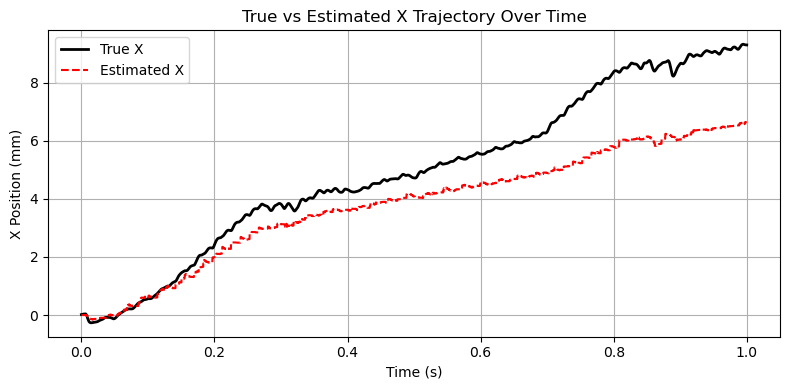

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Build time vector from controller trace length
times = np.arange(len(controller.position_trace)) * controller.timestep

# Extract estimated X positions
estimated = np.array(controller.position_trace)  # shape (N,2)
est_x = estimated[:, 0]

# Extract true X positions from obs_hist
true_x = []
for obs in obs_hist:
    # obs['fly'][0] is [x,y,z]
    pos = obs.get('fly', [[None, None, None]])[0]
    true_x.append(pos[0])
true_x = np.array(true_x)

# Ensure matching lengths
min_len = min(len(times), len(true_x))
times = times[:min_len]
est_x = est_x[:min_len]
true_x = true_x[:min_len]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(times, true_x, label='True X', color='black', linewidth=2)
plt.plot(times, est_x, label='Estimated X', color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('X Position (mm)')
plt.title('True vs Estimated X Trajectory Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


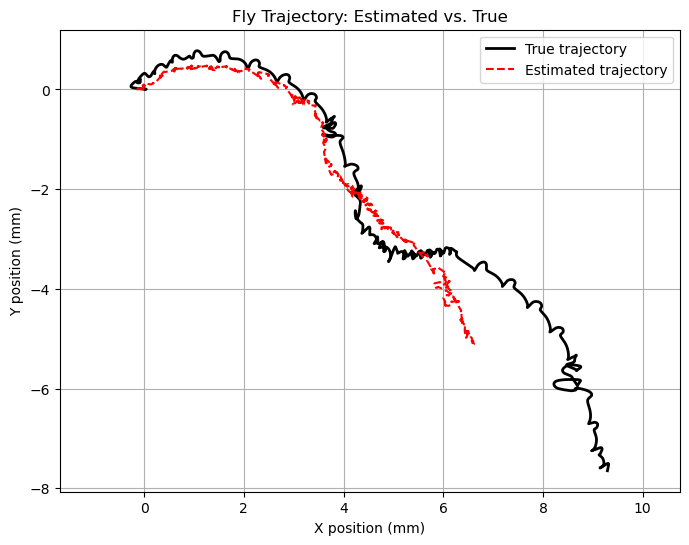

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Estimated trajectory
estimated = np.array(controller.position_trace)

# True trajectory: extract first row from obs["fly"] (x, y, z), keep only x and y
true_points = []
for obs in obs_hist:
    try:
        if "fly" in obs:
            pos = obs["fly"][0]  # First row: position
            if isinstance(pos, (list, tuple, np.ndarray)) and len(pos) >= 2:
                true_points.append([pos[0], pos[1]])
    except Exception:
        continue

true = np.array(true_points)

# Plot
plt.figure(figsize=(8, 6))
if len(true) > 0:
    plt.plot(true[:, 0], true[:, 1], label="True trajectory", color="black", linewidth=2)
if len(estimated) > 0:
    plt.plot(estimated[:, 0], estimated[:, 1], label="Estimated trajectory", color="red", linestyle="--", linewidth=1.5)






plt.xlabel("X position (mm)")
plt.ylabel("Y position (mm)")
plt.title("Fly Trajectory: Estimated vs. True")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


Plot x et y enb fct du temps 

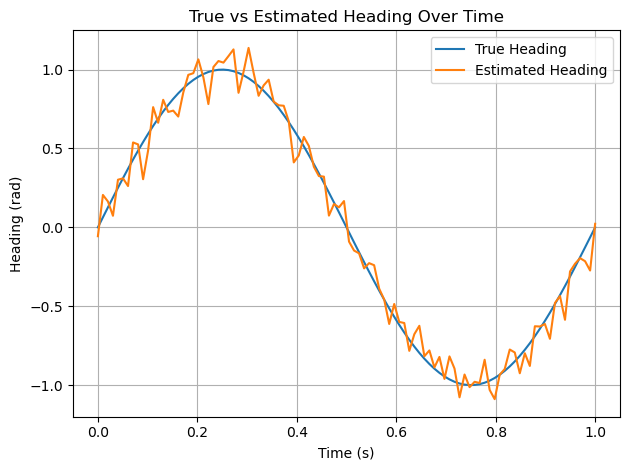

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Example usage:
# Assuming you have recording lists:
#   times = [...]               # list of time stamps (s)
#   true_headings = [...]       # list of true heading angles (rad)
#   estimated_headings = [...]  # list of estimated heading angles (rad)
# You can call plot_heading(times, true_headings, estimated_headings) to visualize.

def plot_heading(times, true_headings, estimated_headings):
    """
    Plot True vs Estimated Heading over time.

    Parameters:
        times (array-like): Time stamps in seconds.
        true_headings (array-like): True heading values (radians).
        estimated_headings (array-like): Estimated heading values (radians).
    """
    times = np.asarray(times)
    true_headings = np.asarray(true_headings)
    estimated_headings = np.asarray(estimated_headings)

    plt.figure()
    plt.plot(times, true_headings, label='True Heading')
    plt.plot(times, estimated_headings, label='Estimated Heading')
    plt.xlabel('Time (s)')
    plt.ylabel('Heading (rad)')
    plt.title('True vs Estimated Heading Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Load or generate your data here
    # For example, load from a .npz file:
    # data = np.load('heading_data.npz')
    # times = data['times']
    # true_headings = data['true_headings']
    # estimated_headings = data['estimated_headings']
    
    # Dummy example data
    times = np.linspace(0, 1, 100)
    true_headings = np.sin(2 * np.pi * times)
    estimated_headings = true_headings + 0.1 * np.random.randn(len(times))
    plot_heading(times, true_headings, estimated_headings)


[[0.0011065  0.00114972 0.00113013 0.00114265]
 [0.         0.         0.         0.        ]]


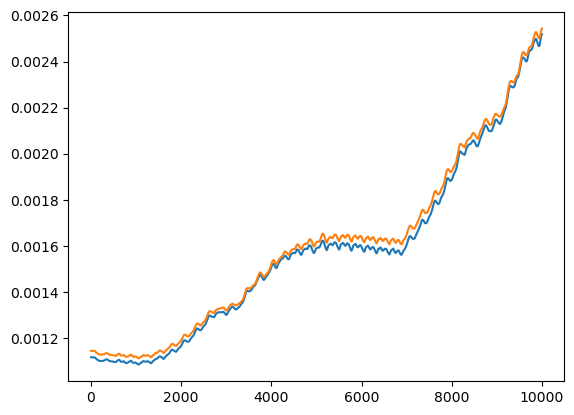

In [71]:
#plot of the odor intensity 
import matplotlib.pyplot as plt
import numpy as np

print(obs_hist[0]["odor_intensity"])    


     
odor_left = [((obs["odor_intensity"][0][0] + obs["odor_intensity"][0][2]))/2 for obs in obs_hist]
odor_right = [((obs["odor_intensity"][0][1] + obs["odor_intensity"][0][3]))/2 for obs in obs_hist]

plt.plot(odor_left, label="Left Odor Intensity")
plt.plot(odor_right, label="Right Odor Intensity")
